### **``Exploration Notebook``** 
``Equity Impact on Employee Attrition in the Workplace``

``Created by: Mijail Q. Mariano``

``13AUGUST2022``

----

In [197]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np
import random

# importing acquire module
import acquire

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "darkgrid")

# plotly/visual import
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# file cleaning modules
from skimpy import clean_columns

# stats/math modules
import scipy.stats as stats
from math import sqrt

# yellowbrick recursive feature elimination-cross validation method (used for plotting accuracy)
from yellowbrick.model_selection import rfecv

# sklearn data science library
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance

# modules used in modeling
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV, f_regression

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

# reporting
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# xgboost import
from xgboost import XGBClassifier

----
#### **``Initial Planning/Ideas``**

Individual Data Science Project:

Mijail Mariano

August 13th 2022

**<u>``1. Formulating the question``</u>**

``This question should be:``

* About social equity or of similar importance (i.e., inequality, racial discrimination, social-mobility, equal opportunity)
* The question is to be freamed in a way that can be quantitatively measured in terms of organizational value & also raises the question around -  “How equal/diverse or fair is an organization's current workplace?”

**target variable: "Attrition"**

**<u>``2. Exploration questions``</u>**

**``What are you attempting to predict/help to address:``**

``Employee/Company Attrition Rate``

* What is company attrition?
* Why is company attrition important?
* What are the employee attrition demographics?
* Are there pros to attrition? If so, what are these?

**``What specifically are you attempting to investigate/understand:``**

``Equity in the workplace and its impact on attrition``

*Ok, but what specifically?...*

``Do socioeconomic/location factors such as:``

* Where an employee is from/grows-up (County level) impact whether or not they remain with a company?
* The high-school graduation rate
* Incarceration/prison rate
* Fraction of population married by 35 years old
* Poverty rate
* Teenage birth rate

``Are there other questions that may be important to answer?``

How much does an employee's geographical background (where they are from) impact their decision to remain or leave the company?
Are there socioeconomic/employee demographic differences between those employees who leave the company and those who remain? (descriptive/summary statistics)

**<u>``3. Methodology``</u>**

**``Note:``** 

For this project I am assuming the company's geographical location to be New York City, NY and that employees are only from counties within the three (3) tri-state areas. This includes counties solely from the state's of Connecticut, New Jersey, and New York. To conduct the analysis I will also use a random generator to blindly assign birthplace/locations where employees grew-up and the socioeconomic variables from those locations to statistically explore these variables.

``Where’s the data from?``

To conduct this analysis and potentially generate a predictive company attrition model I combine real socioeconomic and economic data from Harvard’s Opportunity Atlast with an artificially created 2017 IBM Human Resources Kaggle dataset of a small-medium sized company (~1500 records). .

The Opportunity Atlas is a collaborative social equality project through Harvard University, the US Census Bureau, and the US Internal Revenue Service. The initiative’s aim is to track and plot socioeconomic data by exact US states, counties, cities, and neighborhoods in order to understand the childrens’ outcomes and prospect of social mobility. 

*The Atlas is composed of ~21mil Americans born between 1978-1983 who are in their mid-late thirties today. The platform and estimates are based on:

* The 2000 and 2010 Decennial Census short form
* Federal income tax returns for 1989, 1994, 1995, and 1998-2015
* Data from the American Community Survey

<u>Reference Links:</u>
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* https://www.opportunityatlas.org/

``Why couldn’t you use a real dataset?``

Given the sensitive nature of real employee information, it is relatively difficult to attain similar publicly available data from businesses. Additionally, since it is not common for organizations to collect similar socioeconomic information/drivers that I attempt to investigate - the combination of synthetic and real data seemed like an adequate method for scientific testing.

``So how should I think about this data?``

You can think about this data and the subsequent estimates as a way to understand how geographical/environmental characteristics potentially play a role in employee tenure. Additionally, these estimates may also help organizations to understand potential employee equity differences in order to address them and successfully retain essential employees. 

``Why might these employees decide to leave their company?`` 

(said another way)....
How might these demographic differences contribute to an employee’s decision to stay or leave their company?

Ok, so what happens if employers don’t retain these employees?

**<u>``4. What can employers do to retain these employees?``</u>**

(placeholder for recommendations)


``Opportunity Atlas (Equity DF): features/variables``

1. High_School_Graduation_Rate_rP_gP_pall\
Fraction of children who grew up in this area with a high school degree or a GED. Estimates have a margin of error; for example, standard error at county level for children with parents at 25th percentile is 1% pooling race and gender groups and 3% for black men. This outcome is available only at the county (not tract) level due to small sample sizes. (Source: American Community Survey)

2. Household_Income_at_Age_35_rP_gP_pall\
Average annual household income in 2014-15 for children (now in their mid-30s) who grew up in this area. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is $1,917 pooling race and gender groups and $2,721 for black men. (Source: Federal income tax records)

3. Incarceration_Rate_rP_gP_pall\
Fraction of children who grew up in this area who were in prison or jail on April 1, 2010. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 1% pooling race and gender groups and 4% for black men. (Source: 2010 Decennial Census)

4. Fraction_Married_at_Age_35_rP_gP_pall\
Fraction of children who grew up in this area who are married in 2015 (in their mid-30s). Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 3% pooling race and gender groups and 4% for black men. (Source: Income Tax Records)

5. Poverty_Rate_in_2012-16\
Fraction of all residents of this area with household incomes below the federal poverty line in 2012-16. (Source: American Community Survey.)

6. Teenage_Birth_Rate_women_only_rP_gF_pall\
Fraction of women who grew up in this area who claimed ever a child who was born when the women were between the ages of 13 and 19 as a dependent when filing taxes. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 4% pooling race groups and 6% for black women. (Source: Income Tax Records)


``IBM Dataset: features/variables``
1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


----

### **``Data Acquisition and Preparation``**

In [2]:
# let's import the IBM employee data first

ibm_df = pd.read_csv("/Users/mijailmariano/Desktop/IBM_HR-Employee-Attrition.csv")
print()
print(f'IBM dataset shape: {ibm_df.shape}')
ibm_df.head()


IBM dataset shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
# let's import the opportunity atlas data

equity_df = pd.read_csv("/Users/mijailmariano/Desktop/equity_table.csv")
print()
print(f'Equity dataset shape: {equity_df.shape}')
equity_df.head()


Equity dataset shape: (17, 12)


county_name state       cty  distance  household_income_at_35  \
0     Bergen County    NJ  cty34003  19 miles                   63424   
1      Bronx County    NY  cty36005  10 miles                   32542   
2      Essex County    NJ  cty34013  20 miles                   43298   
3  Fairfield County    CT  cty09001  30 miles                   55614   
4     Hudson County    NJ  cty34017   9 miles                   41374   

   high-school_graduation_rate  percentage_married_by_35  incarceration_rate  \
0                         0.94                      0.51                0.00   
1                         0.78                      0.22                0.02   
2                         0.89                      0.33                0.02   
3                         0.92                      0.46                0.01   
4                         0.87                      0.35                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
0                     0.04          0.07                       0.80   
1                     0.28          0.31                       0.74   
2                     0.20          0.17                       0.78   
3                     0.09          0.09                       0.79   
4                     0.19          0.18                       0.78   

   single_parent_frac  
0                0.20  
1                0.59  
2                0.43  
3                0.26  
4                0.37

In [4]:
# replacing/removing the word "miles" in distance

# equity_df["distance"] = equity_df["distance"].str.replace("miles", "").astype(int)
# equity_df.dtypes.sort_values()

In [5]:
# number of unique county distances

# equity_df["distance"].nunique()

In [6]:
# let's use pandas' qcut method to parse out distance groups

# intervals = pd.Series(pd.cut(
#         equity_df["distance"], 
#         bins = equity_df["distance"].nunique(), 
#         duplicates = "drop").sort_values().tolist())

# intervals.unique()

In [7]:
# viewing counties by distance sorted

# equity_df[["county_name", "distance"]].sort_values("distance")

In [8]:
# setting counties by distance
# [(0.971, 3.9], (3.9, 6.8], (6.8, 9.7], (9.7, 12.6], (18.4, 21.3], (24.2, 27.1], (27.1, 30.0]]

# area_one = equity_df[equity_df["distance"] <= 5].county_name.tolist()
# area_two = equity_df[(equity_df["distance"] > 5) & (equity_df["distance"] <= 10)].county_name.tolist()
# area_three = equity_df[(equity_df["distance"] > 10) & (equity_df["distance"] <= 21)].county_name.tolist()
# area_four = equity_df[(equity_df["distance"] > 21) & (equity_df["distance"] <= 27)].county_name.tolist()
# area_five = equity_df[(equity_df["distance"] > 27) & (equity_df["distance"] <= 30)].county_name.tolist()

# print(area_one)
# print('----------------------------------------------------')
# print(area_two)
# print('----------------------------------------------------')
# print(area_three)
# print('----------------------------------------------------')
# print(area_four)
# print('----------------------------------------------------')
# print(area_five)

In [9]:
# creating a function to randomly apply county based on the employee's distance from home

def get_county(x, lst_a, lst_b, lst_c, lst_d, lst_e):
        '''where x = employees' work distance from home in miles. 
        function will iterate through all records and randomly assign a county based on distance from work.'''
        lst = []

        if x <= 5:
                county = random.choice(lst_a)
                lst.append(county)

        elif x > 5 and x <= 10:
                county = random.choice(lst_b)
                lst.append(county)

        elif x > 10 and x <= 21:
                county = random.choice(lst_c)
                lst.append(county)
        
        elif x > 27 and x <= 30:
                county = random.choice(lst_e)
                lst.append(county)

        else:
                county = lst_d[0]
                lst.append(county)

        # returning the list of counties
        return lst

In [10]:
# creating a random generated county list 

# random.seed(548)
# county_lst = ibm_df["DistanceFromHome"].apply(get_county, args = (area_one, area_two, area_three, area_four, area_five))
# # let's flatten the county list
# county_lst = [val for sublist in county_lst for val in sublist]
# county_lst[:5]

In [11]:
# let's create a pandas series and assign the county list to the ibm dataframe

# county_lst = pd.Series(county_lst)
# county_lst.shape

In [12]:
# assigning the county series to the ibm dataframe

# ibm_df["county_name"] = county_lst
# ibm_df.head() # checks out!

In [13]:
# merging the two tables/dfs on county name
# bringing over socioeconomic data from equity_df 

# emp_df = ibm_df.merge(
#     equity_df,
#     how = "left",
#     left_on = "county_name",
#     right_on = "county_name"
# ).drop(columns = "distance")

# emp_df.head() # checks out!

In [14]:
# catching the dataframe

# emp_df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/emp_df.csv", index = False)

In [15]:
# importing the dataframe 

df = acquire.get_employee_df()
df.head()

df shape: (1470, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager      county_name state  \
0                        0                     5     Kings County    NY   
1                        1                     7     Bronx County    NY   
2                        0                     0     Kings County    NY   
3                        3                     0     Kings County    NY   
4                        2                     2  New York County    NY   

        cty  household_income_at_35  high-school_graduation_rate  \
0  cty36047                   37229                         0.84   
1  cty36005       

In [16]:
# can consider removing/dropping the following features/columns
# "over_18": all employees meet this criteria
# "employee_count": redundant information

df = acquire.clean_employee_df(df)
df.head()

df shape: (1470, 34)


attrition  age  monthly_income  percent_salary_hike  total_working_years  \
1       True   41            5993                   11                    8   
2      False   49            5130                   23                   10   
4       True   37            2090                   15                    7   
5      False   33            2909                   11                    8   
7      False   27            3468                   12                    6   

   training_times_last_year  years_at_company  household_income_at_35  \
1                         0                 6                   37229   
2                         3                10                   32542   
4                         3                 0                   37229   
5                         3                 8                   37229   
7                         3                 2                   37826   

   high_school_graduation_rate  percentage_married_by_35  incarceration_rate  \
1                         0.84                      0.32                0.01   
2                         0.78                      0.22                0.02   
4                         0.84                      0.32                0.01   
5                         0.84                      0.32                0.01   
7                         0.81                      0.29                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
1                     0.20          0.23                       0.73   
2                     0.28          0.31                       0.74   
4                     0.20          0.23                       0.73   
5                     0.20          0.23                       0.73   
7                     0.19          0.17                       0.73   

   single_parent_frac  years_since_last_promotion      county_name  \
1                0.38                           0     Kings County   
2                0.59                           1     Bronx County   
4                0.38                           0     Kings County   
5                0.38                           3     Kings County   
7                0.34                           2  New York County   

               department education education_field environment_satisfaction  \
1                   Sales         2   Life Sciences                        2   
2  Research & Development         1   Life Sciences                        3   
4  Research & Development         2           Other                        4   
5  Research & Development         4   Life Sciences                        4   
7  Research & Development         1         Medical                        1   

   gender job_involvement job_level               job_role job_satisfaction  \
1  Female               3         2        Sales Executive                4   
2    Male               2         2     Research Scientist                2   
4    Male               2         1  Laboratory Technician                3   
5  Female               3         1     Research Scientist                3   
7    Male               3         1  Laboratory Technician                2   

  marital_status performance_rating relationship_satisfaction state  \
1         Single                  3                         1    NY   
2        Married                  4                         4    NY   
4         Single                  3                         2    NY   
5        Married                  3                         3    NY   
7        Married                  3                         4    NY   

  stock_option_level work_life_balance  years_in_current_role  \
1                  0                 1                      4   
2                  1                 3                      7   
4                  0                 3                      0   
5                  0                 3                      7   
7                  1                 3              

In [17]:
# let's check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attrition                    1470 non-null   bool   
 1   age                          1470 non-null   int64  
 2   monthly_income               1470 non-null   int64  
 3   percent_salary_hike          1470 non-null   int64  
 4   total_working_years          1470 non-null   int64  
 5   training_times_last_year     1470 non-null   int64  
 6   years_at_company             1470 non-null   int64  
 7   household_income_at_35       1470 non-null   int64  
 8   high_school_graduation_rate  1470 non-null   float64
 9   percentage_married_by_35     1470 non-null   float64
 10  incarceration_rate           1470 non-null   float64
 11  women_teenage_birthrate      1470 non-null   float64
 12  poverty_rate                 1470 non-null   float64
 13  employment_rates_a

In [18]:
# initial summary statistics

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

count     mean     std      min      25%  \
age                         1470.00    36.92    9.14    18.00    30.00   
employment_rates_at_35yrs   1470.00     0.76    0.03     0.73     0.73   
high_school_graduation_rate 1470.00     0.86    0.05     0.78     0.81   
household_income_at_35      1470.00 43599.31 8981.27 32542.00 37229.00   
incarceration_rate          1470.00     0.01    0.00     0.00     0.01   
monthly_income              1470.00  6502.93 4707.96  1009.00  2911.00   
percent_salary_hike         1470.00    15.21    3.66    11.00    12.00   
percentage_married_by_35    1470.00     0.35    0.08     0.22     0.29   
poverty_rate                1470.00     0.17    0.06     0.05     0.13   
single_parent_frac          1470.00     0.35    0.09     0.16     0.30   
total_working_years         1470.00    11.28    7.78     0.00     6.00   
training_times_last_year    1470.00     2.80    1.29     0.00     2.00   
women_teenage_birthrate     1470.00     0.17    0.06     0.04     0.12   
years_at_company            1470.00     7.01    6.13     0.00     3.00   
years_in_current_role       1470.00     4.23    3.62     0.00     2.00   
years_since_last_promotion  1470.00     2.19    3.22     0.00     0.00   
years_with_curr_manager     1470.00     4.12    3.57     0.00     2.00   

                                 50%      75%      max    range  
age                            36.00    43.00    60.00    42.00  
employment_rates_at_35yrs       0.74     0.78     0.82     0.09  
high_school_graduation_rate     0.84     0.91     0.94     0.17  
household_income_at_35      37826.00 51773.00 65975.00 33433.00  
incarceration_rate              0.01     0.01     0.02     0.02  
monthly_income               4919.00  8379.00 19999.00 18990.00  
percent_salary_hike            14.00    18.00    25.00    14.00  
percentage_married_by_35        0.32     0.42     0.54     0.32  
poverty_rate                    0.17     0.23     0.31     0.26  
single_parent_frac              0.34     0.38     0.59     0.43  
total_working_years            10.00    15.00    40.00    40.00  
training_times_last_year        3.00     3.00     6.00     6.00  
women_teenage_birthrate         0.19     0.20     0.28     0.24  
years_at_company                5.00     9.00    40.00    40.00  
years_in_current_role           3.00     7.00    18.00    18.00  
years_since_last_promotion      1.00     3.00    15.00    15.00  
years_with_curr_manager         3.00     7.00    17.00    17.00

In [19]:
# let's loop through and inspect columns and unique values

for col in df.columns:
    print(f'Column: {col.upper()}')
    print(f'Date type: {df[col].dtype}')
    print(f'Missing values: {df[col].isnull().any()}')
    print(f'Number of unique values: {df[col].nunique()}')
    print(f'Data Sample: {list(df[col].head(10).sort_values())}')
    print('-------------------------------------------------------------------')

Column: ATTRITION
Date type: bool
Missing values: False
Number of unique values: 2
Data Sample: [False, False, False, False, False, False, False, False, True, True]
-------------------------------------------------------------------
Column: AGE
Date type: int64
Missing values: False
Number of unique values: 43
Data Sample: [27, 30, 32, 33, 36, 37, 38, 41, 49, 59]
-------------------------------------------------------------------
Column: MONTHLY_INCOME
Date type: int64
Missing values: False
Number of unique values: 1349
Data Sample: [2090, 2670, 2693, 2909, 3068, 3468, 5130, 5237, 5993, 9526]
-------------------------------------------------------------------
Column: PERCENT_SALARY_HIKE
Date type: int64
Missing values: False
Number of unique values: 15
Data Sample: [11, 11, 12, 13, 13, 15, 20, 21, 22, 23]
-------------------------------------------------------------------
Column: TOTAL_WORKING_YEARS
Date type: int64
Missing values: False
Number of unique values: 40
Data Sample: [1, 6, 

<function matplotlib.pyplot.show(close=None, block=None)>

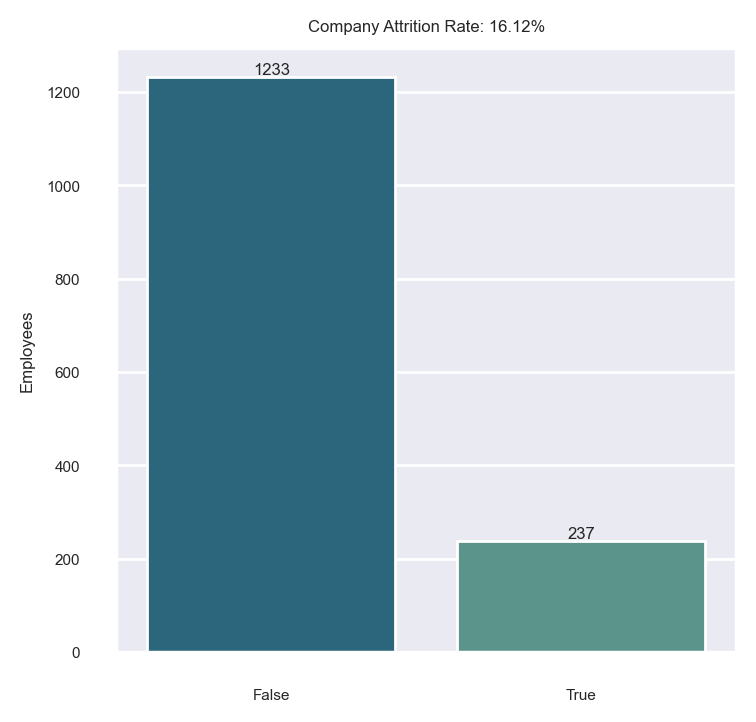

In [20]:
# let's examine the target variable

att_mean = df["attrition"].mean()

plt.figure(figsize = (4, 4))
sns.set(font_scale = 0.5)

ax = sns.countplot(
    x = "attrition",
    data = df,
    order = df["attrition"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])

plt.title(f'Company Attrition Rate: {att_mean:.2%}')
plt.xlabel(None)
plt.ylabel("Employees")
plt.show

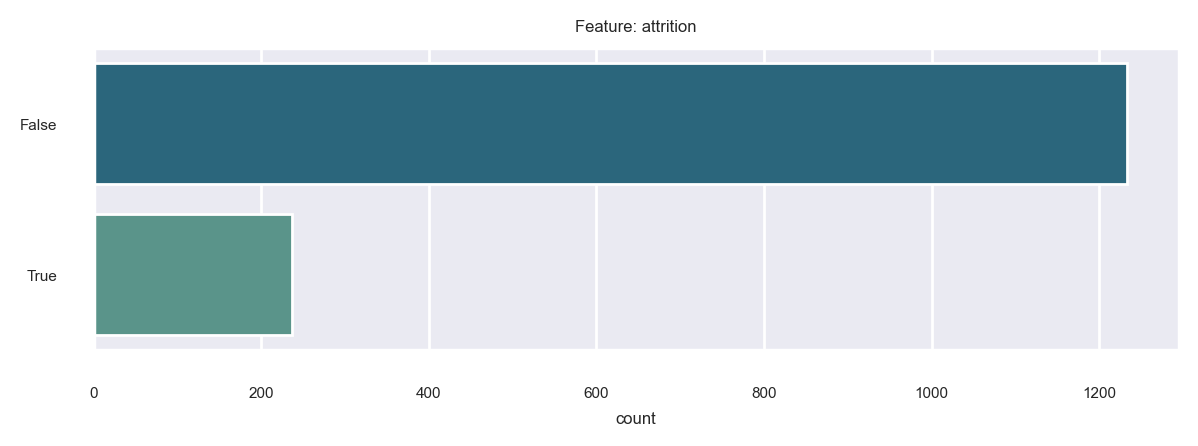

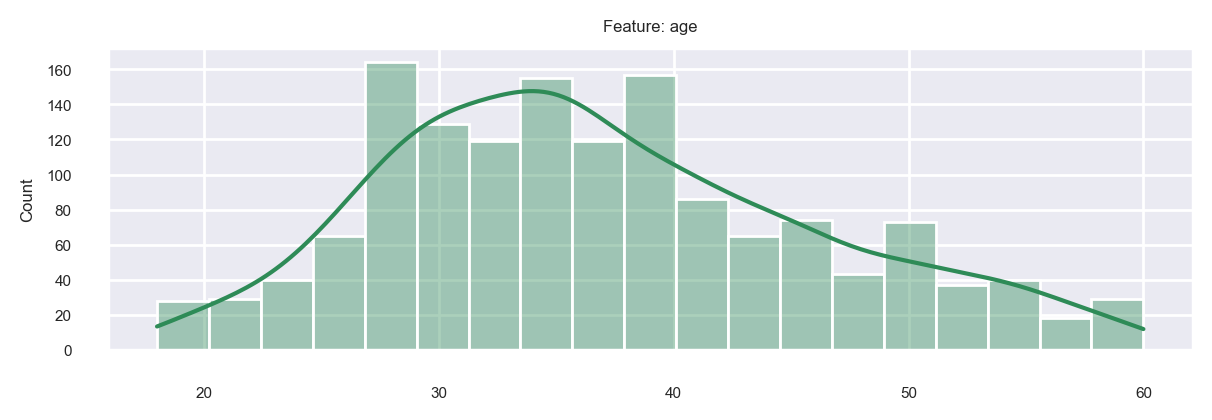

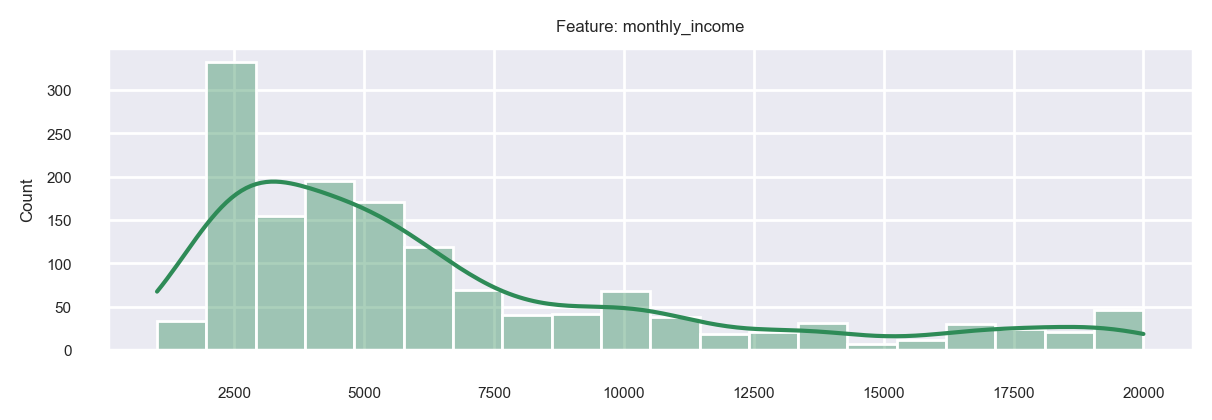

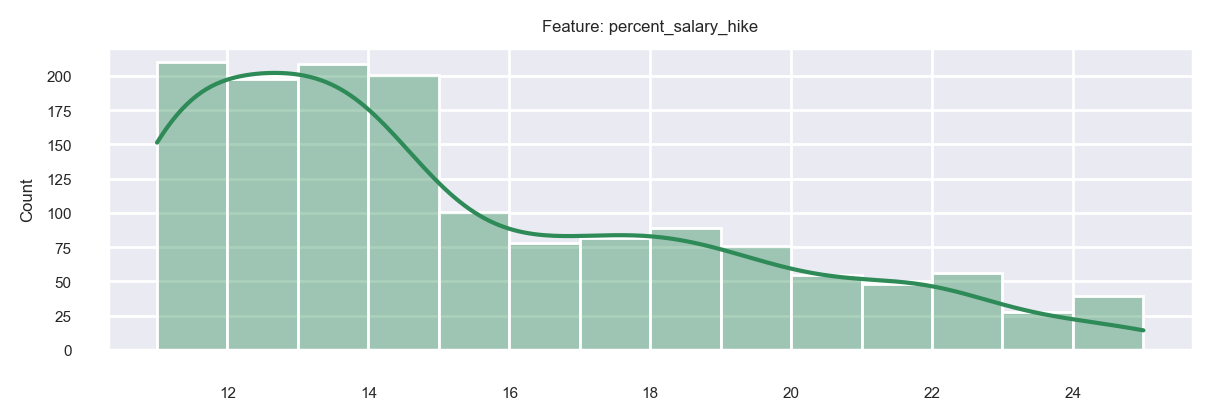

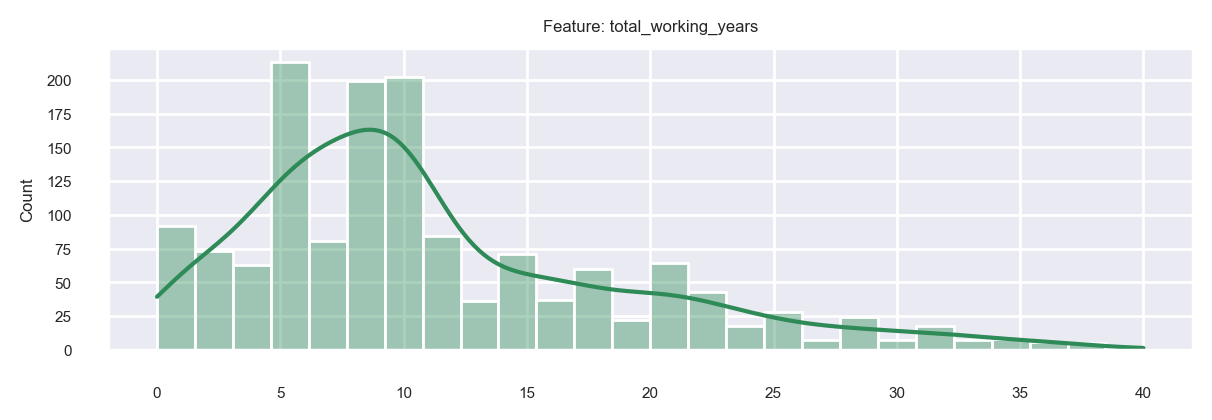

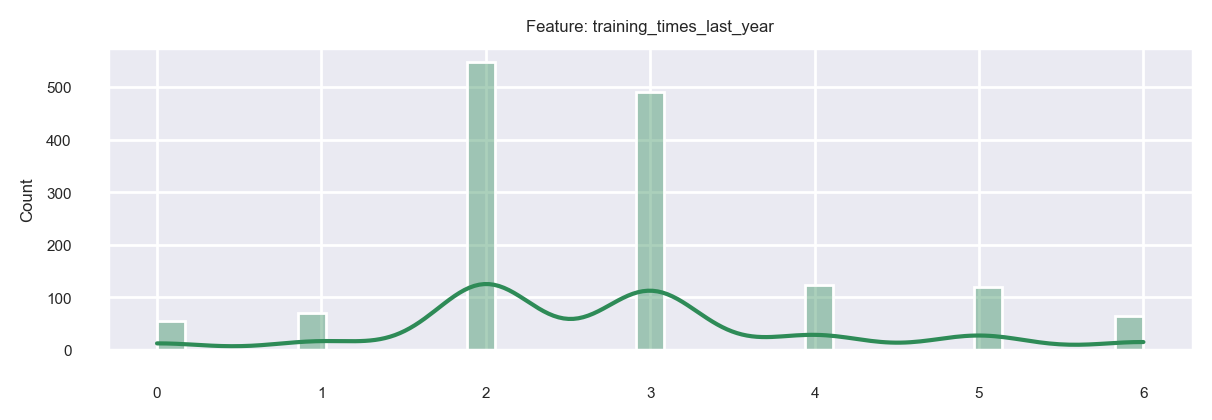

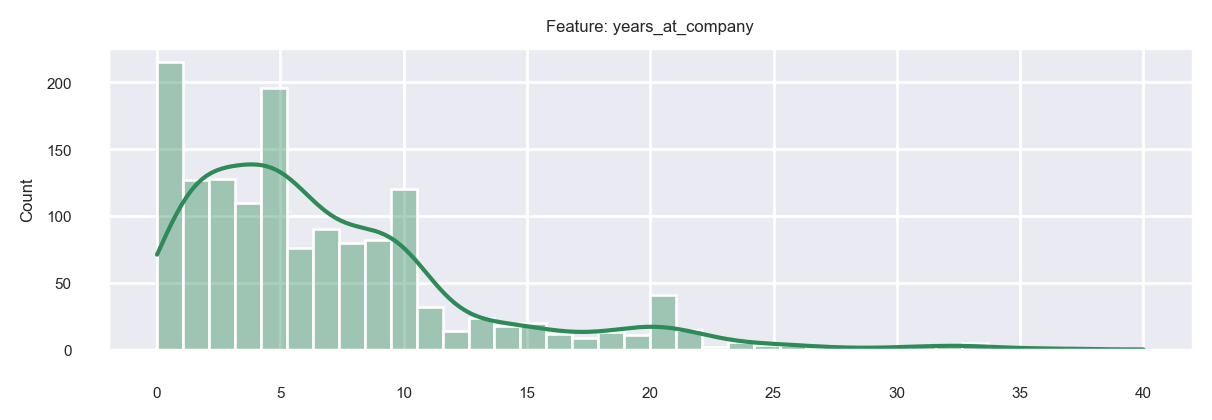

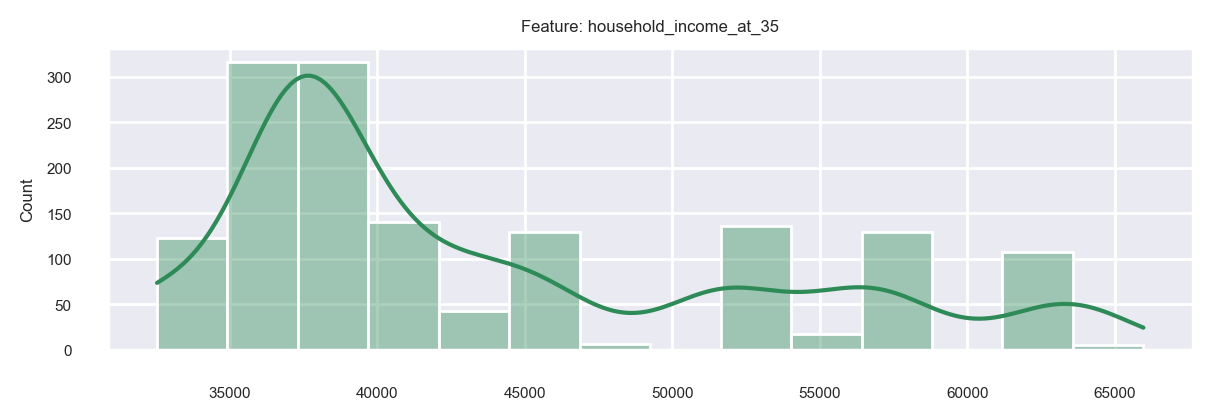

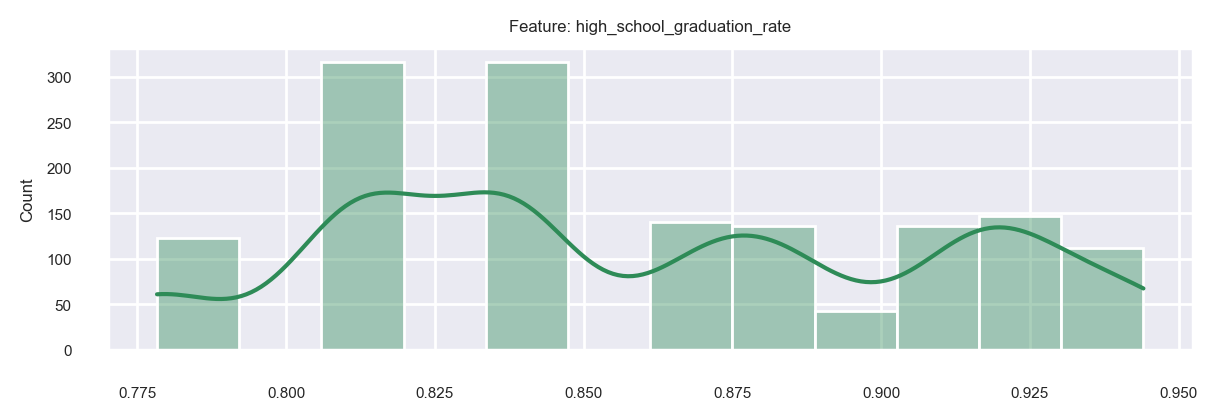

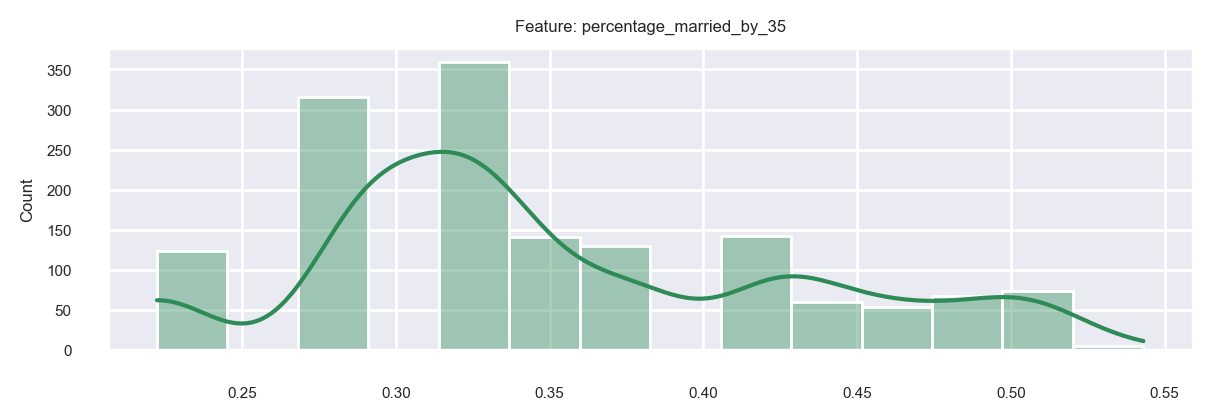

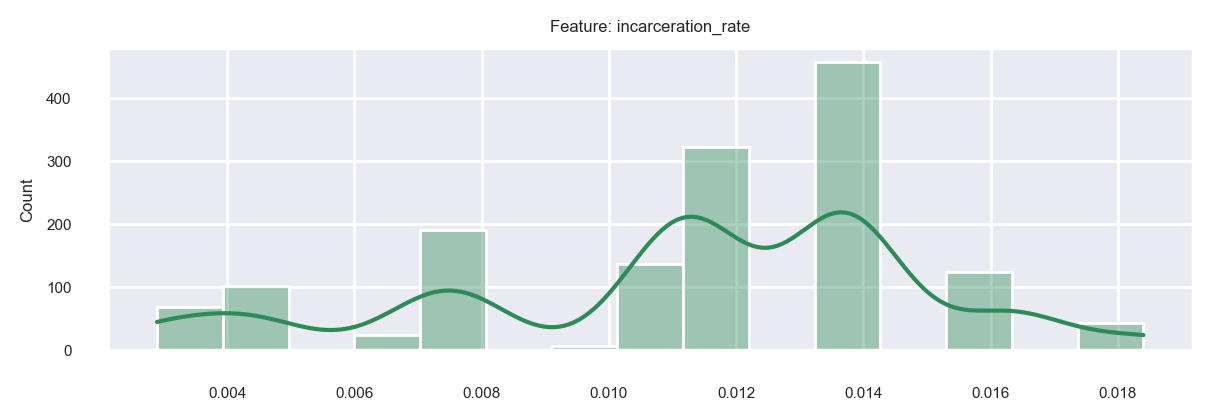

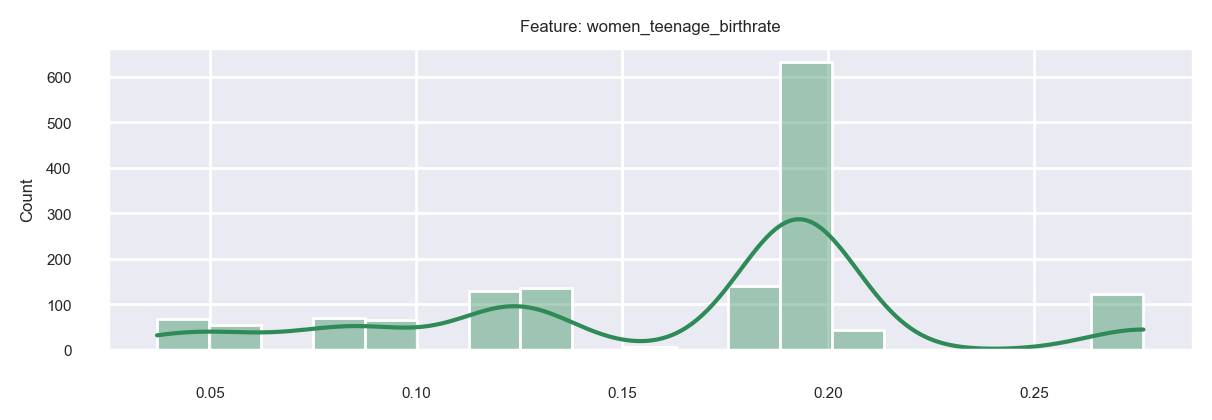

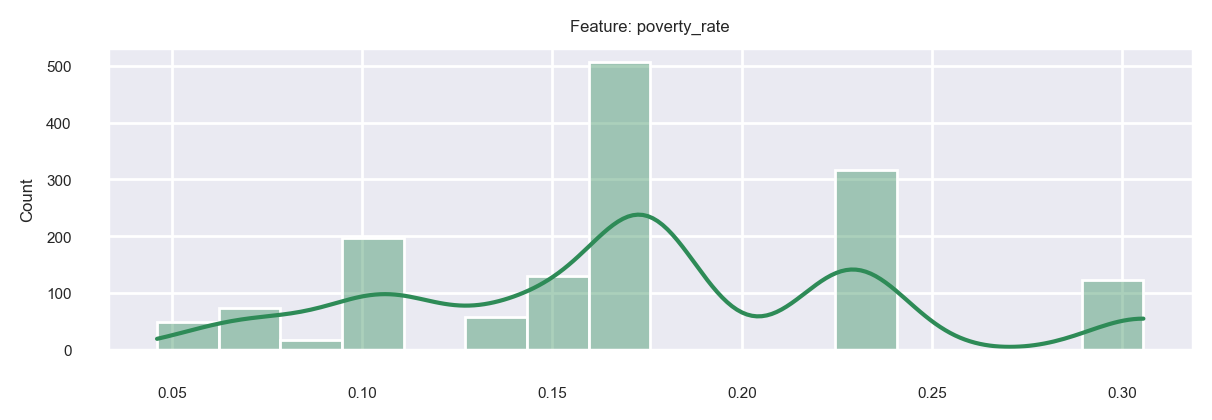

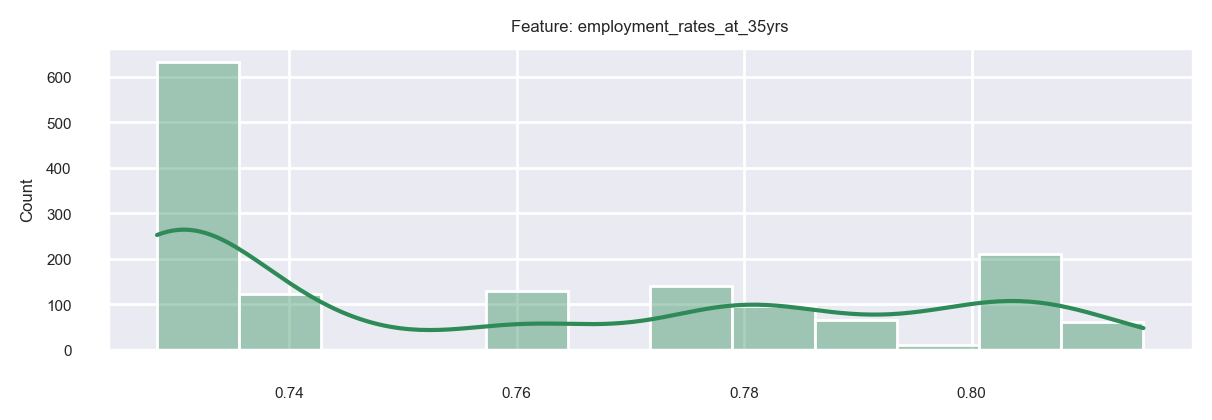

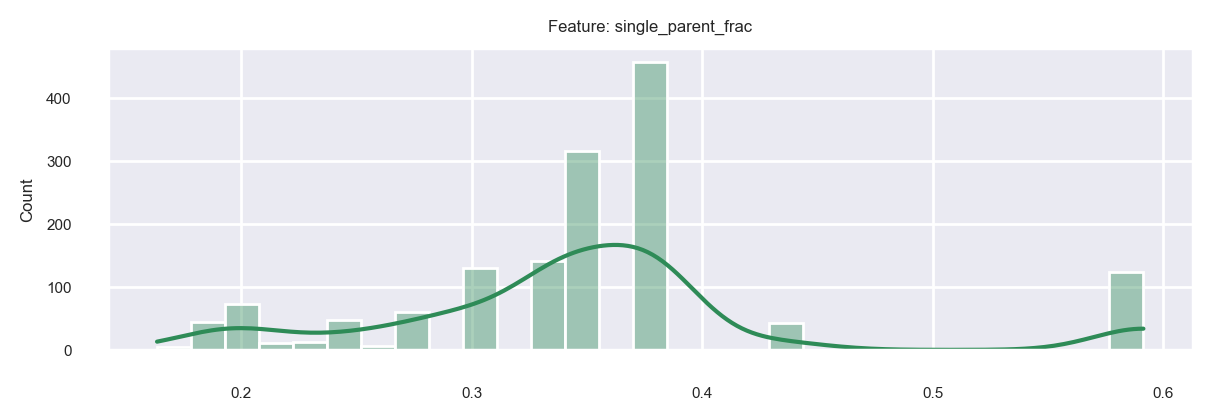

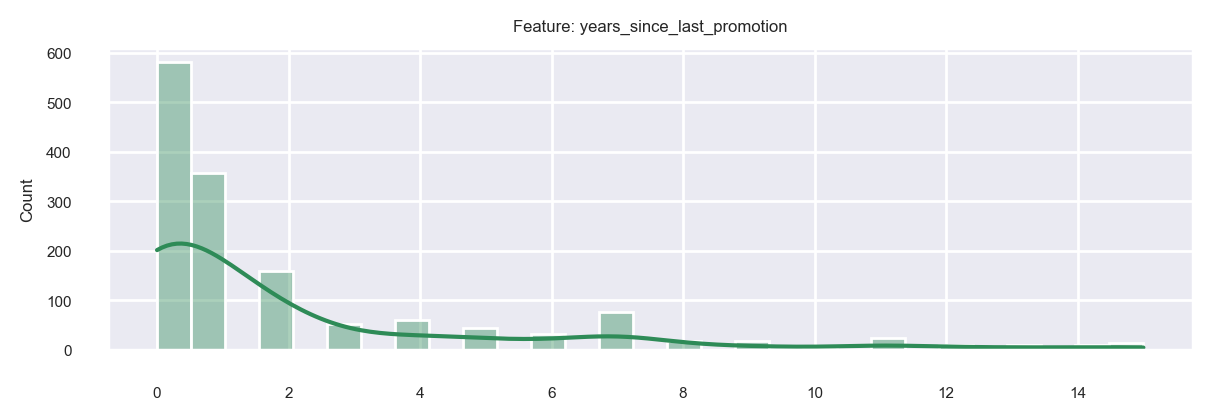

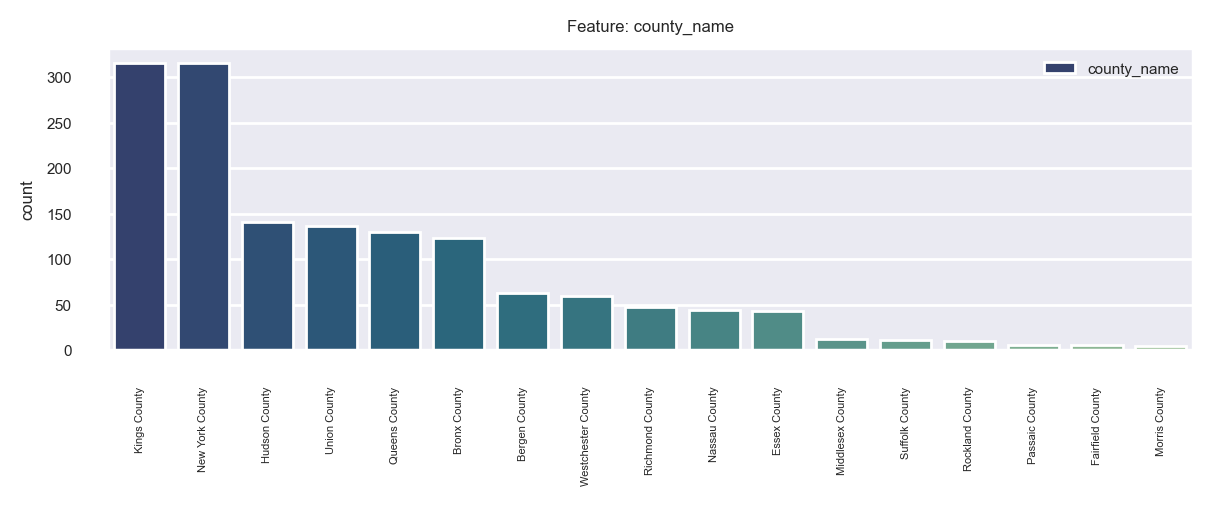

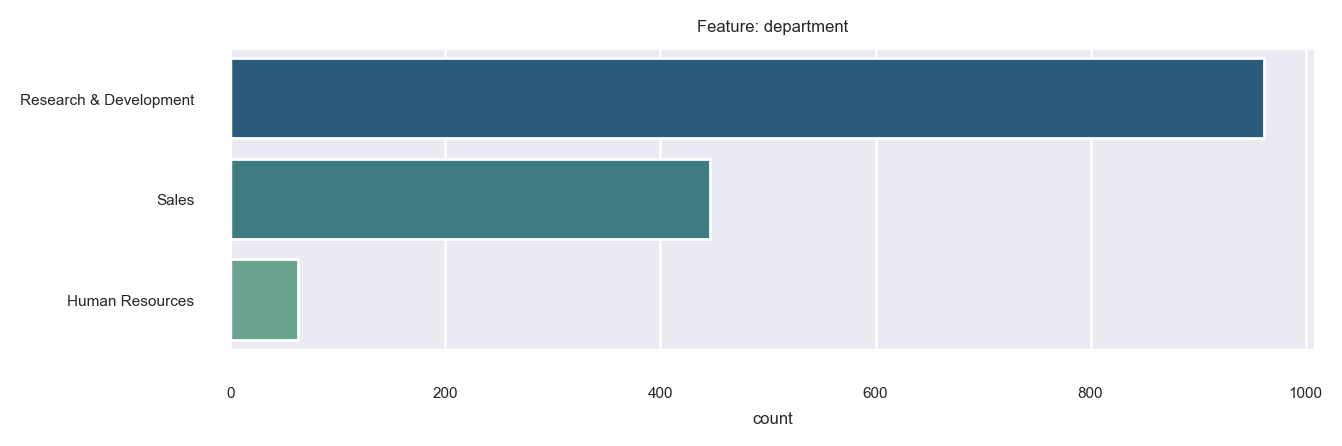

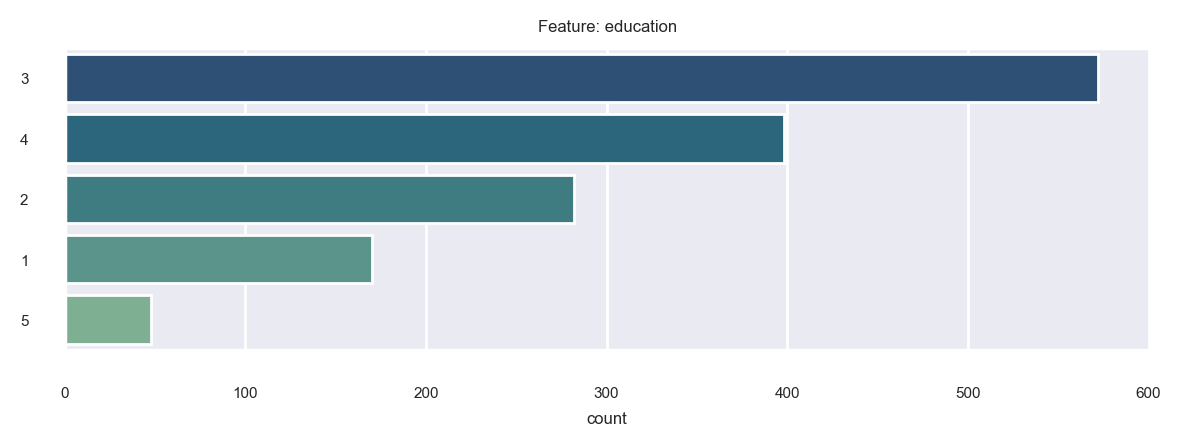

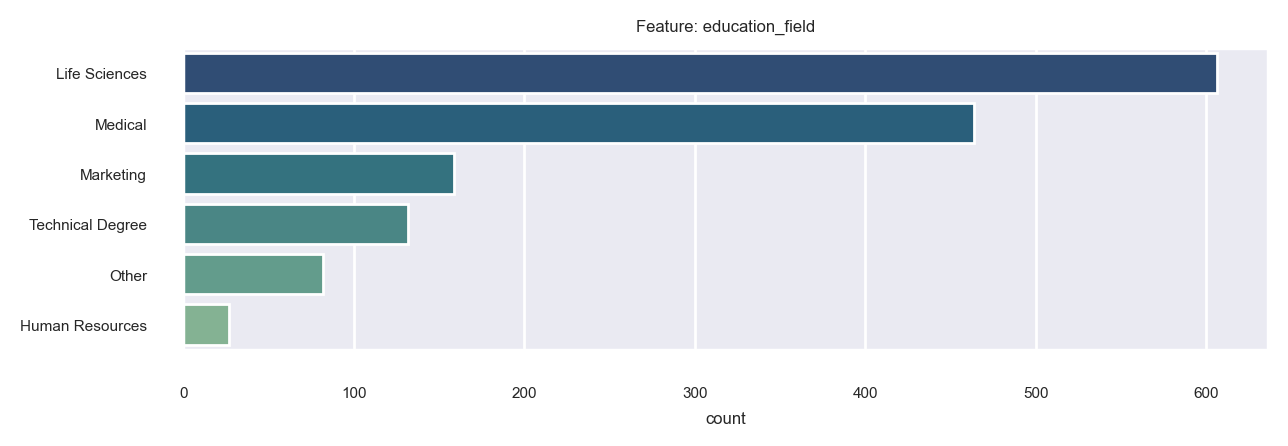

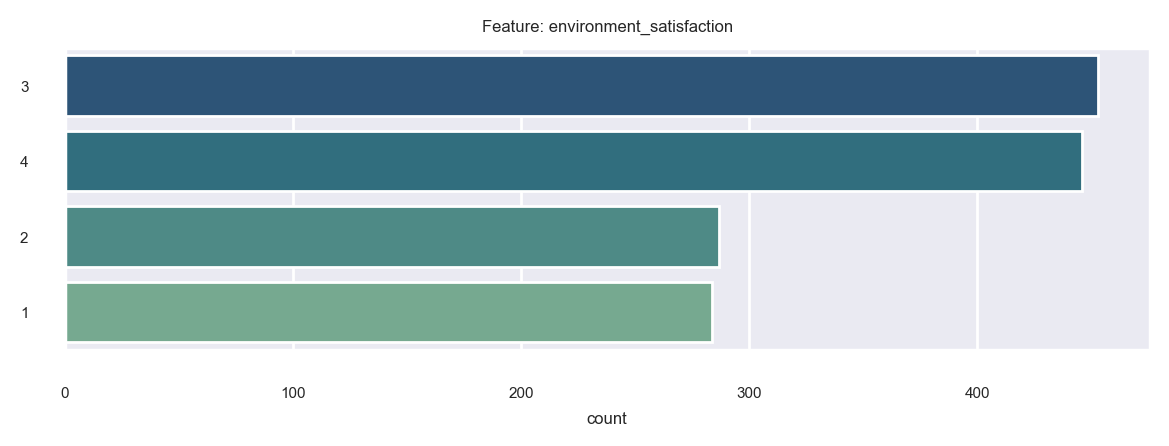

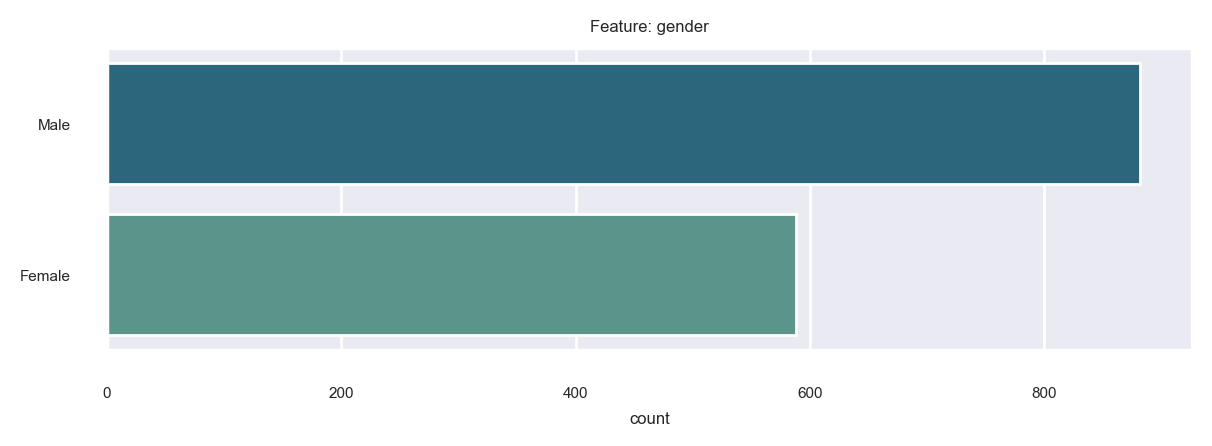

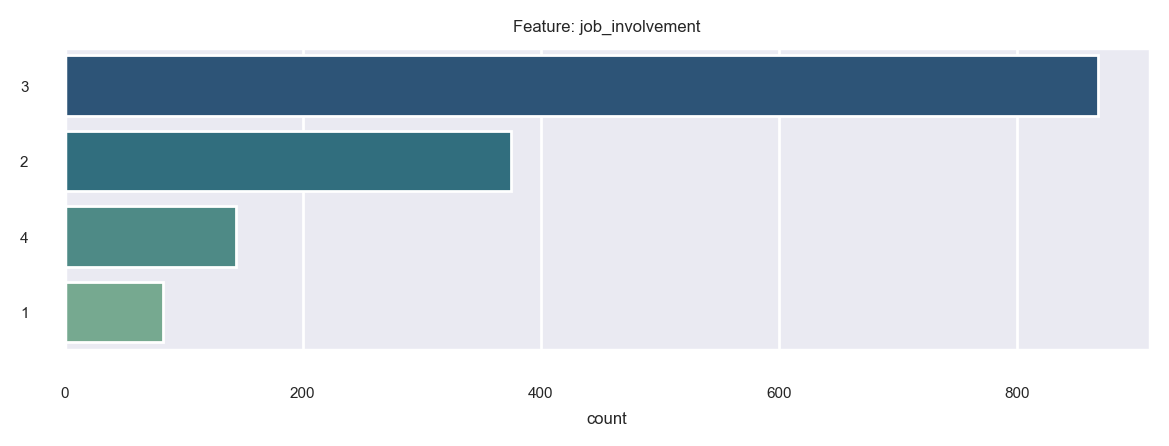

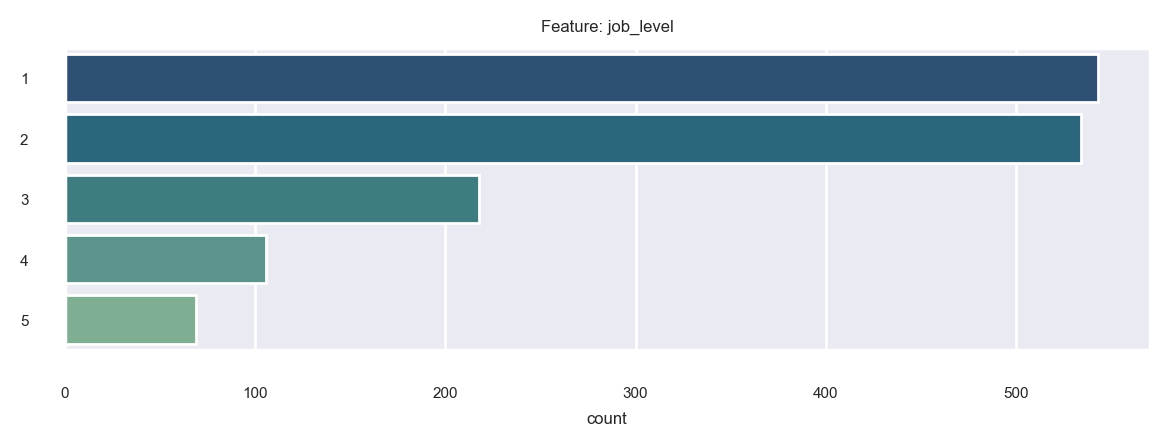

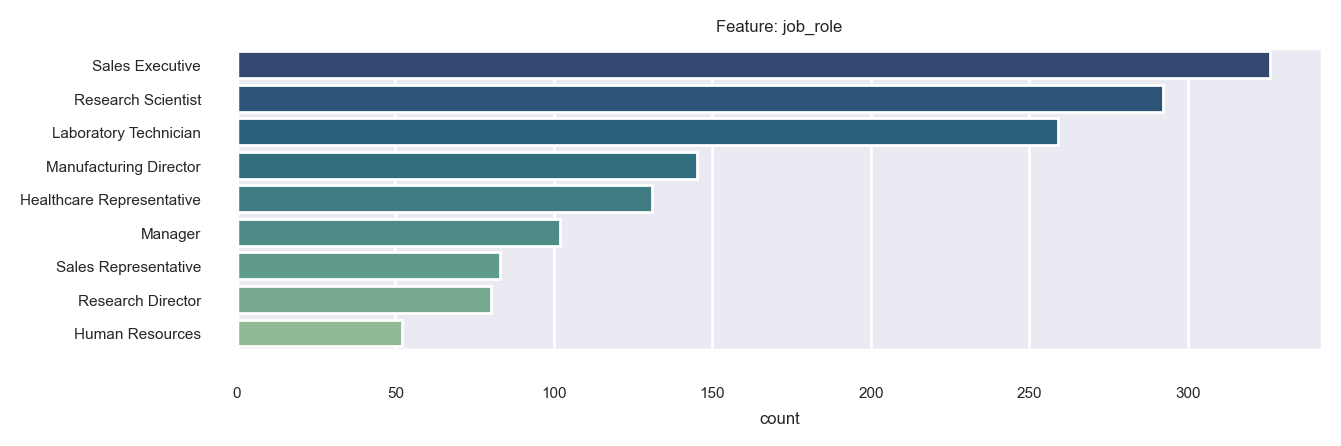

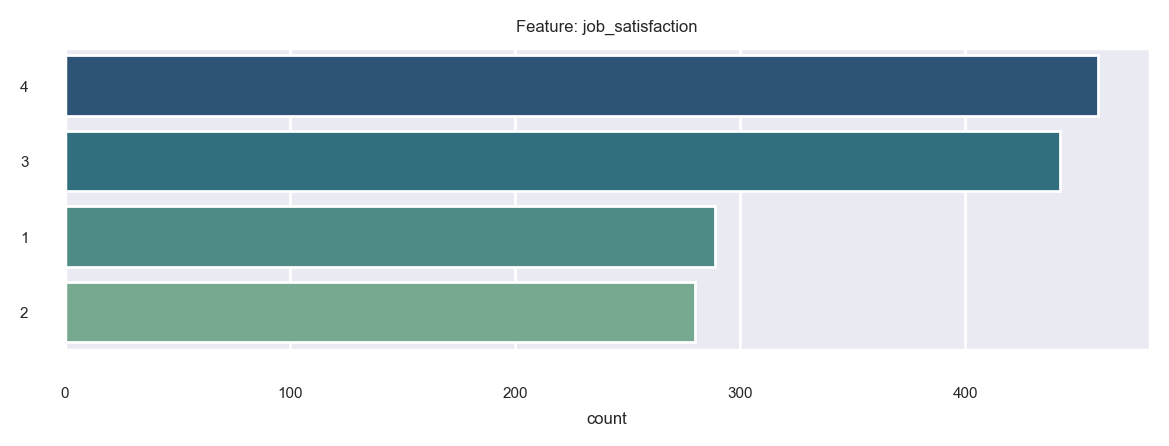

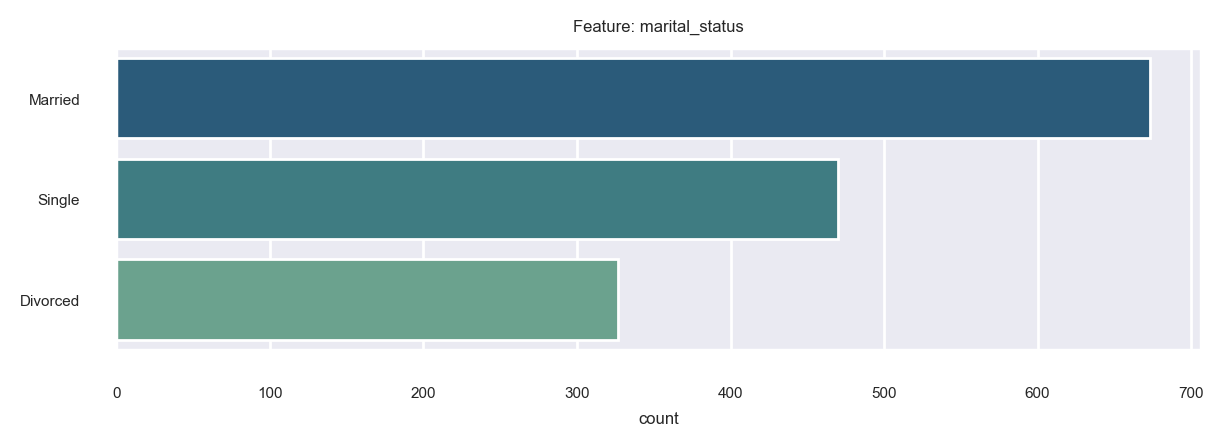

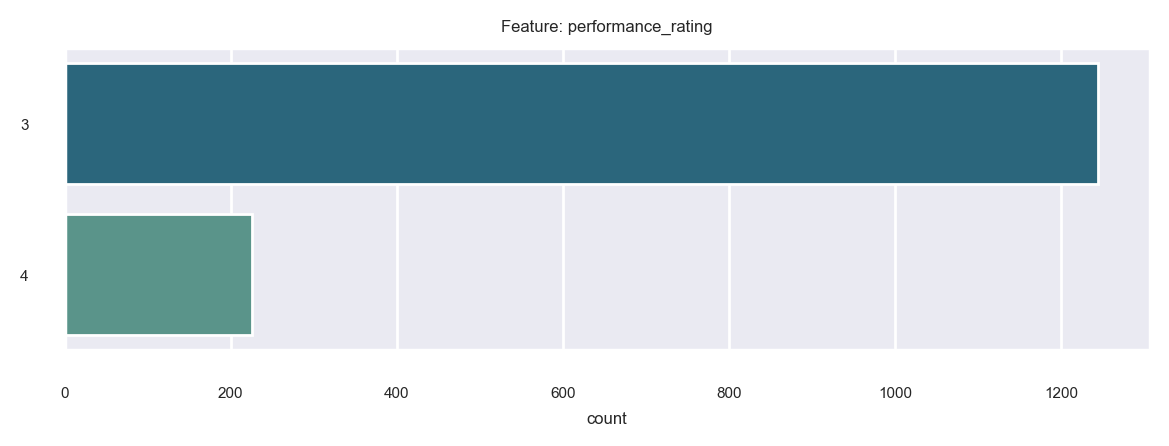

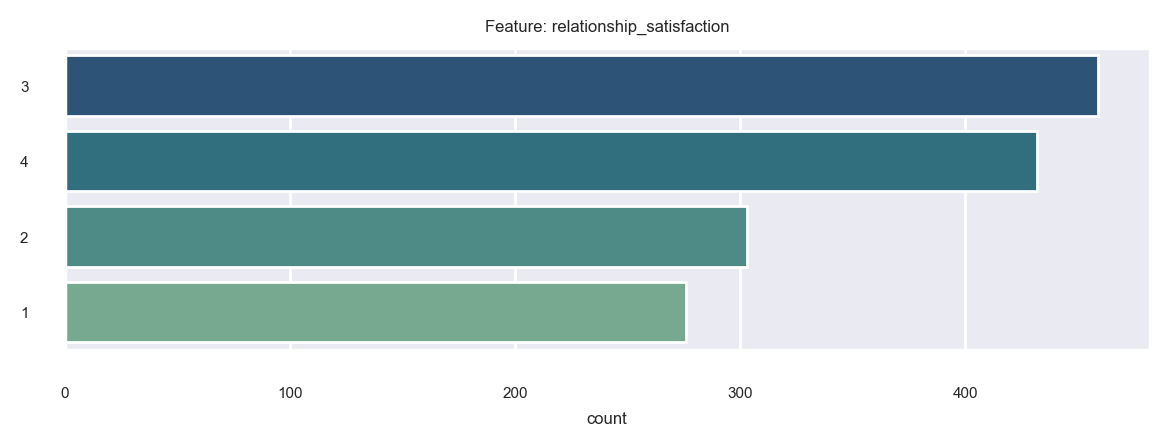

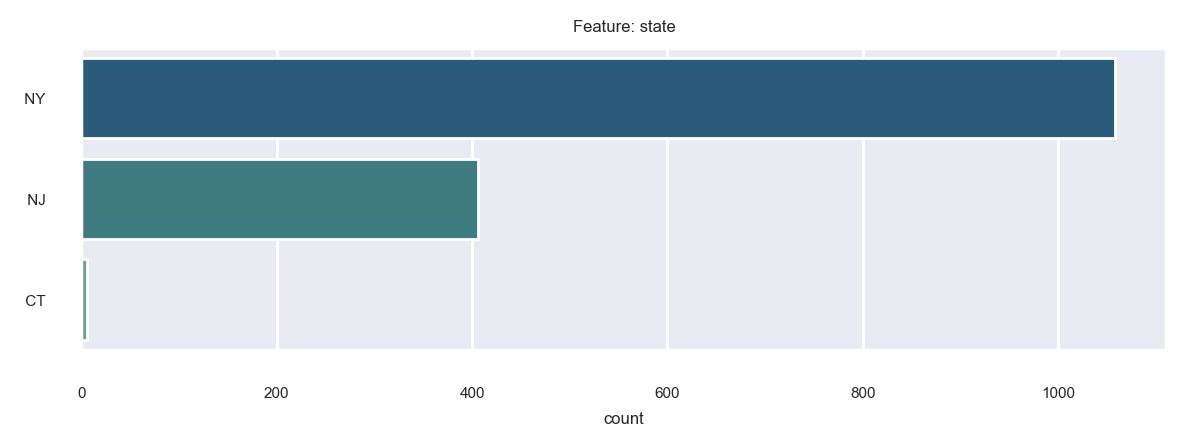

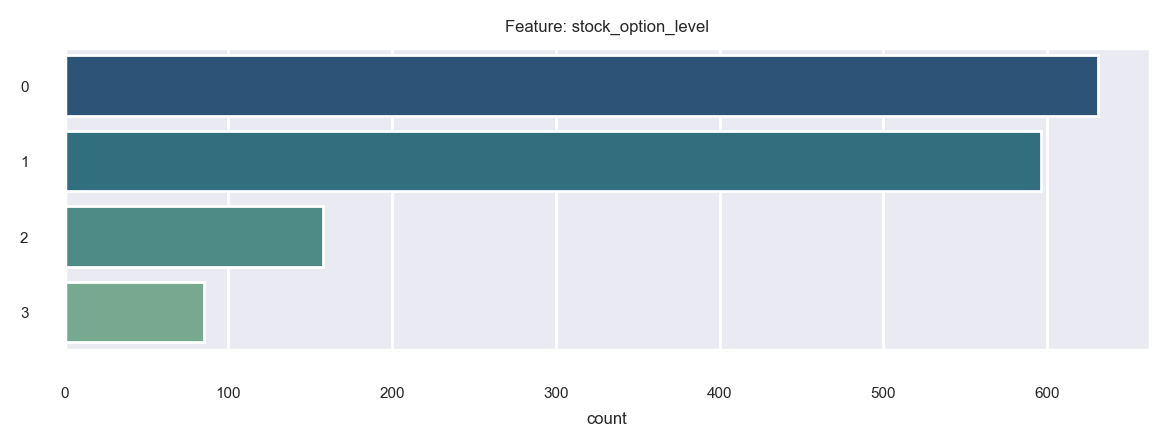

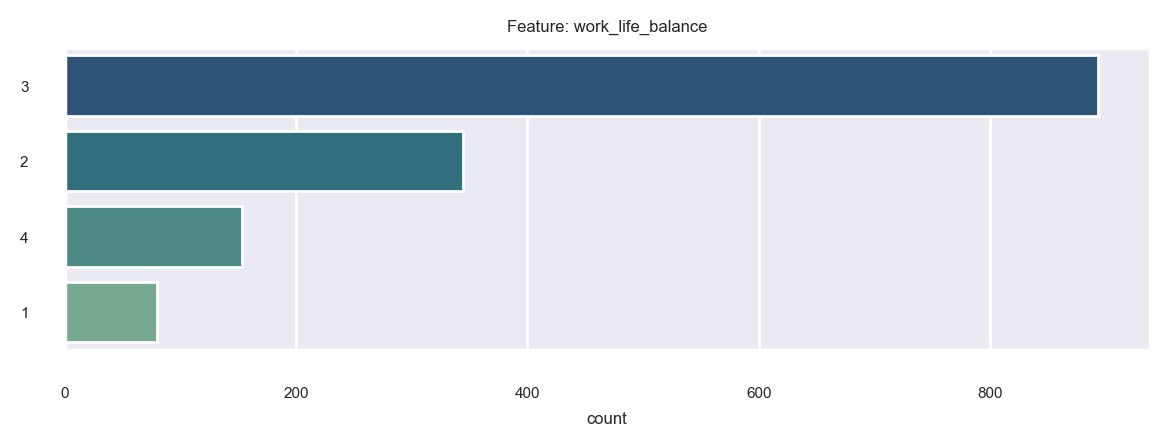

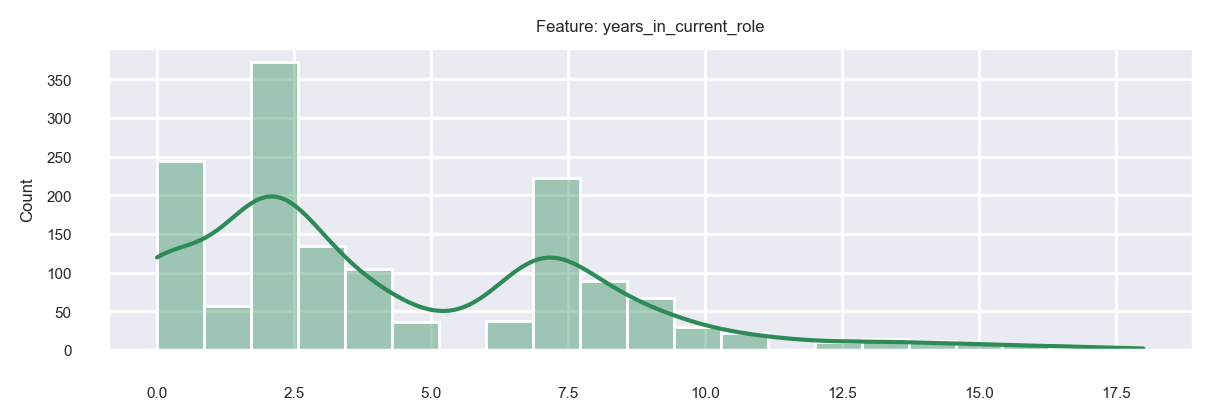

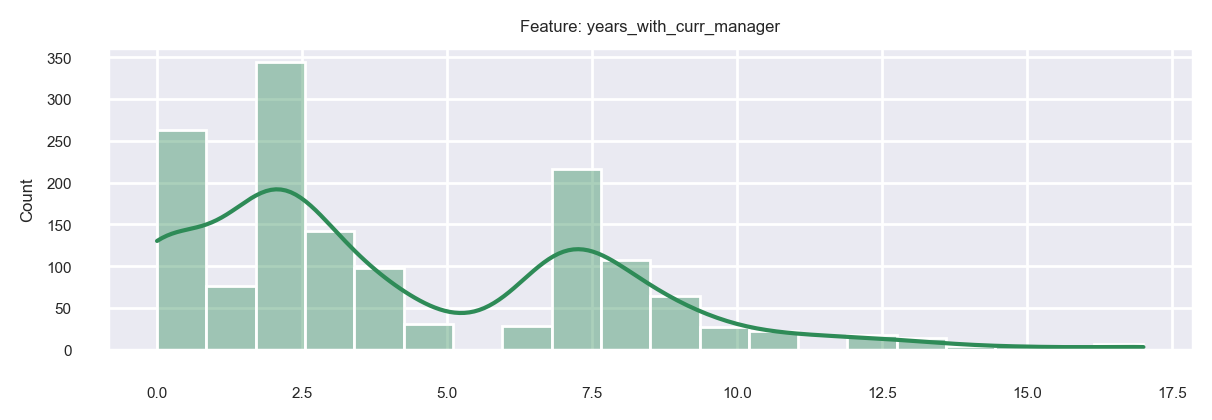

In [21]:
# plotting individual columns/features by data type

for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        plt.figure(figsize = (7, 2))
        sns.histplot(
            df[col],
            color = "seagreen",
            alpha = 0.4,
            kde = True)

        plt.title(f'Feature: {col}')
        plt.xlabel(None)
        plt.show()
    
    elif col == "cty" or col == "county_name": 
        # treating large discrete count plots seperate
        plt.figure(figsize = (7, 2))
        sns.countplot(
            df[col],
            order = df[col].value_counts().index,
            label = col, 
            palette="crest_r")

        plt.legend()
        # plt.xticks(rotation = 90)
        plt.tick_params(
                        axis='x', # changes apply to the x-axis
                        rotation = 90,
                        labelsize = 4)
        plt.xlabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

    else:
        plt.figure(figsize = (7, 2))
        sns.countplot(
            y = df[col],
            order = df[col].value_counts().index, 
            orient = "h", 
            palette="crest_r")

        plt.ylabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

In [22]:
# classifiying features by data type = discrete/categorical or continuous 

disc_lst = df.select_dtypes(exclude = "number").columns.sort_values().tolist()
cont_lst = df.select_dtypes(include = "number").columns.sort_values().tolist()

print(f'discrete variables:\n{disc_lst}')
print()
print(f'continuous variables:\n{cont_lst}')

discrete variables:
['attrition', 'county_name', 'department', 'education', 'education_field', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'performance_rating', 'relationship_satisfaction', 'state', 'stock_option_level', 'work_life_balance']

continuous variables:
['age', 'employment_rates_at_35yrs', 'high_school_graduation_rate', 'household_income_at_35', 'incarceration_rate', 'monthly_income', 'percent_salary_hike', 'percentage_married_by_35', 'poverty_rate', 'single_parent_frac', 'total_working_years', 'training_times_last_year', 'women_teenage_birthrate', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


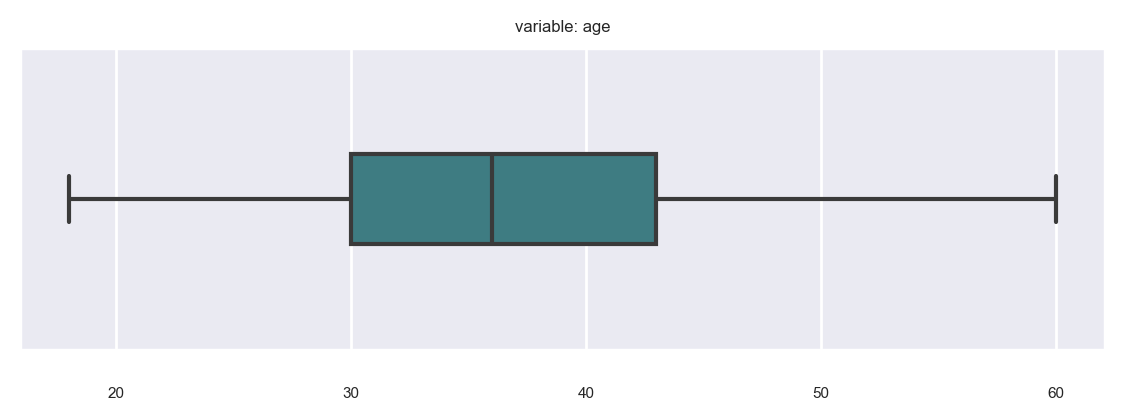

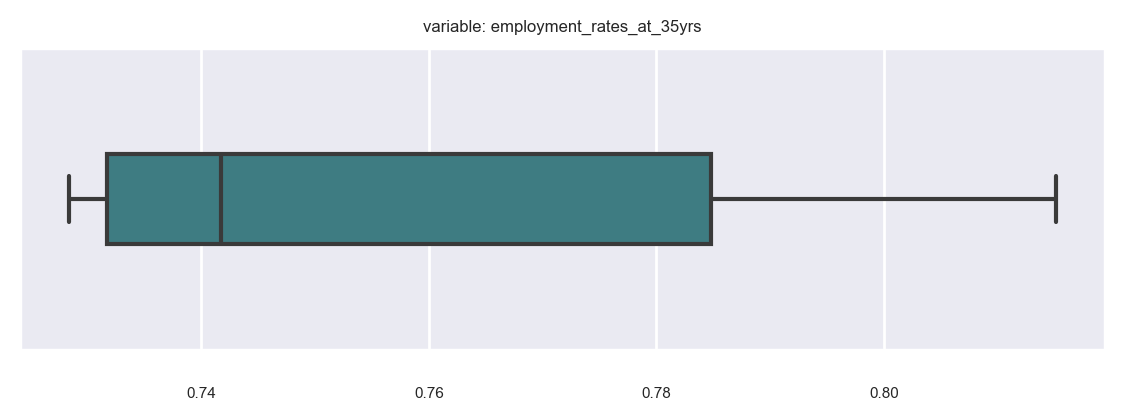

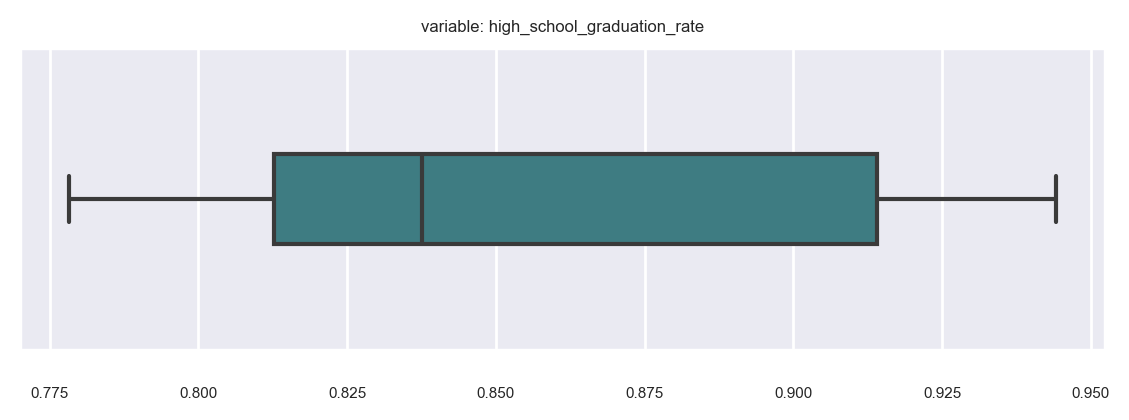

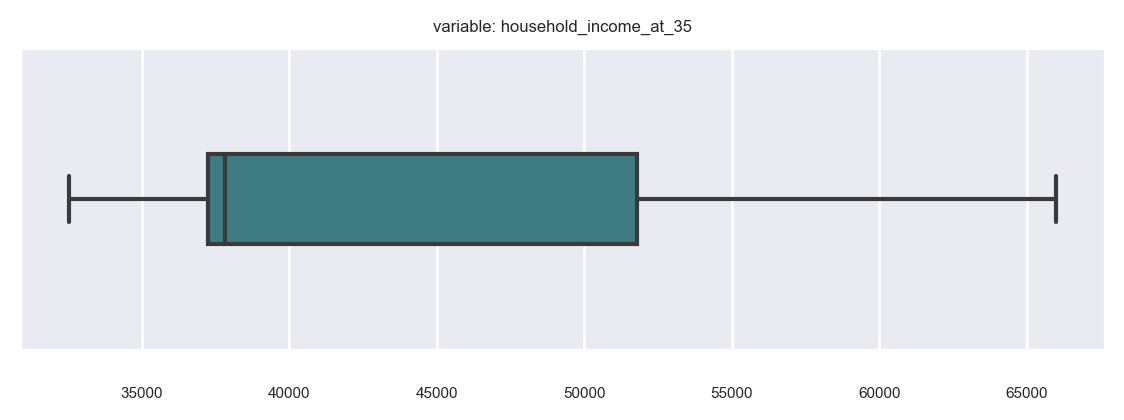

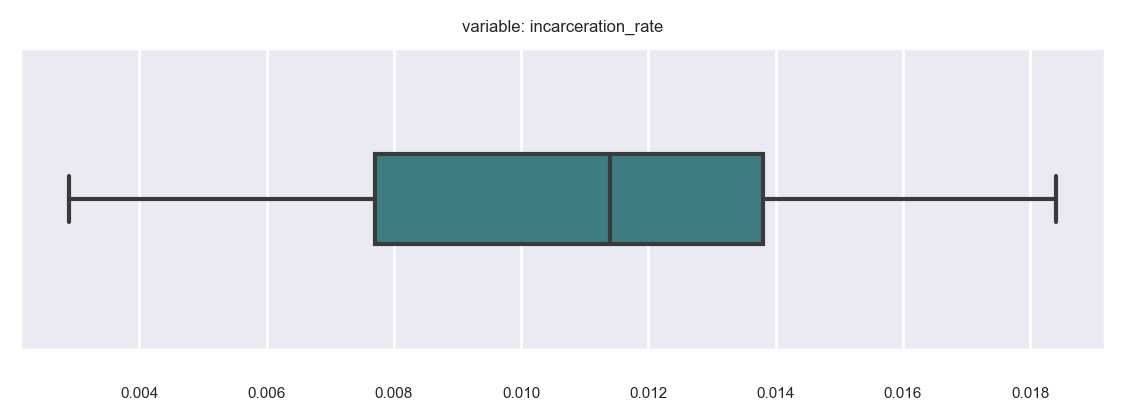

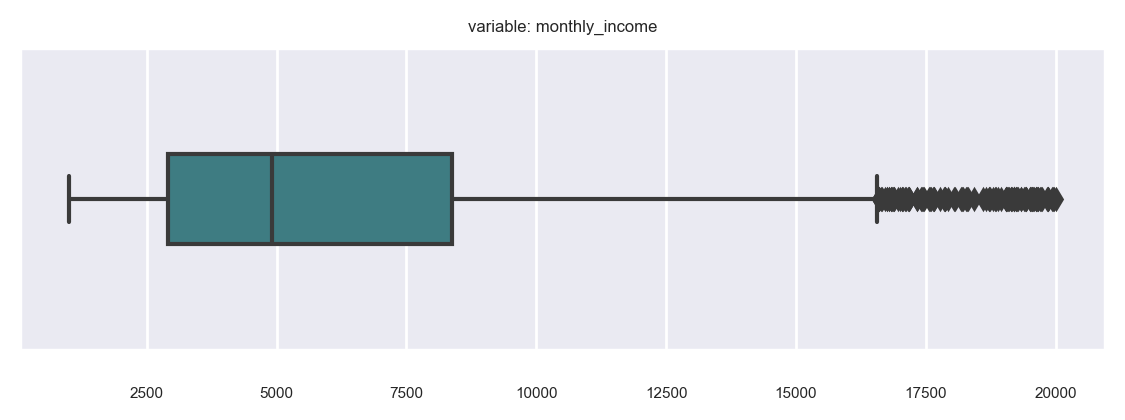

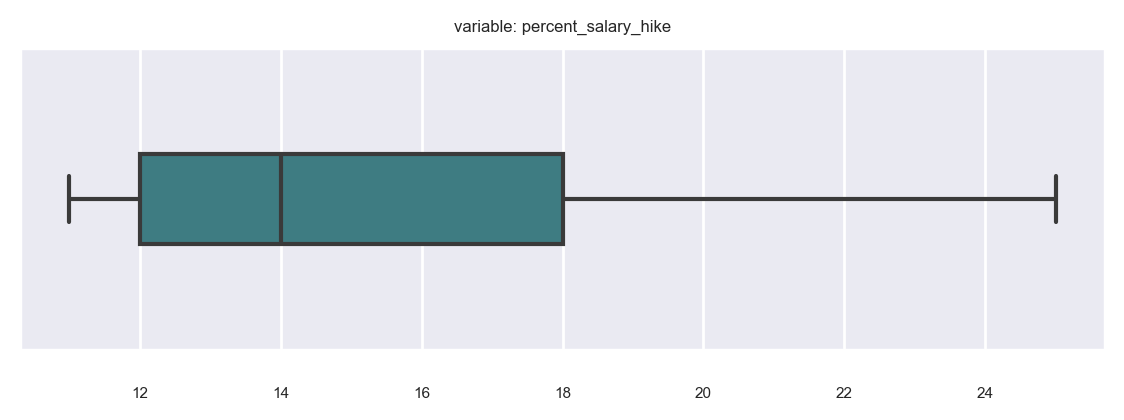

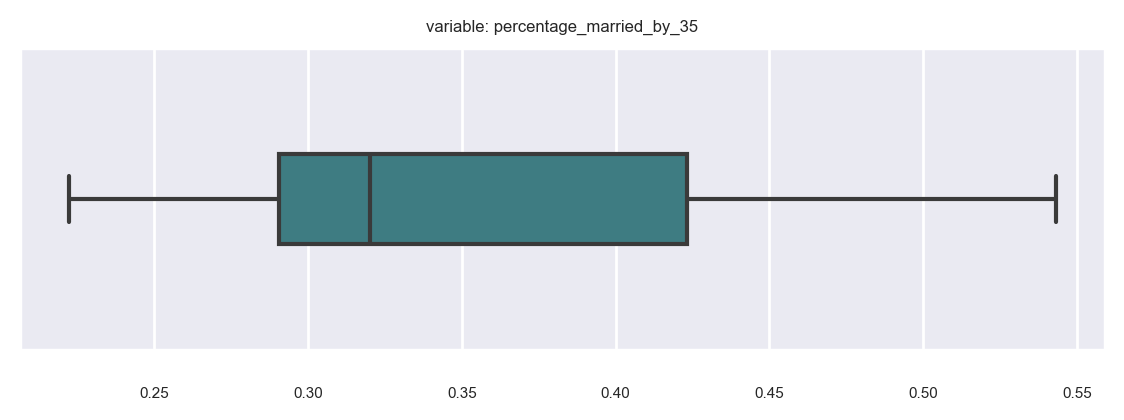

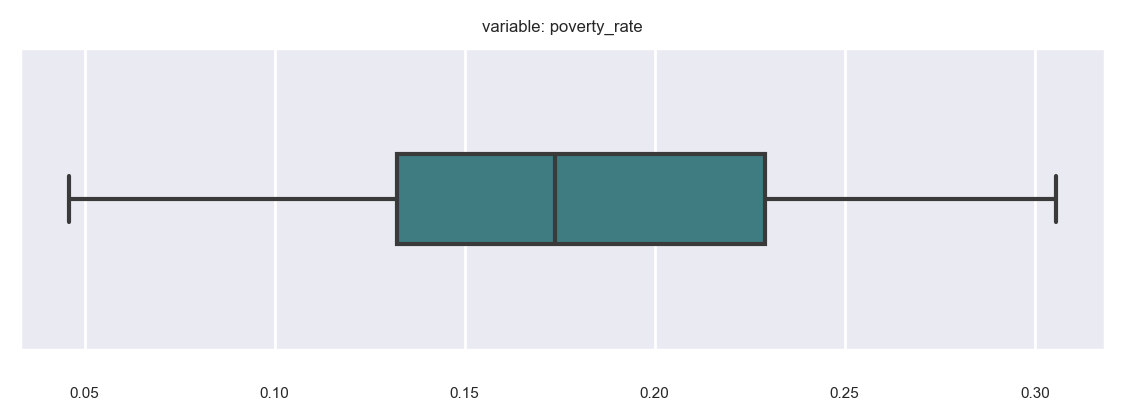

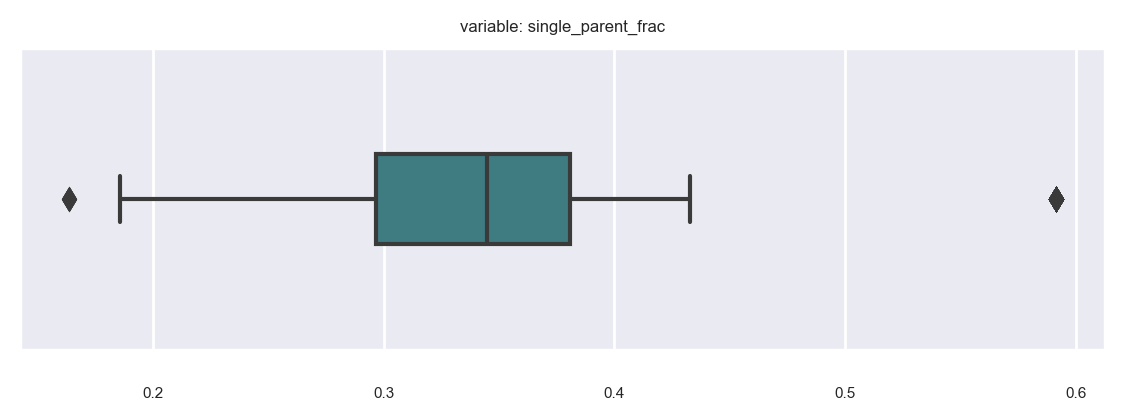

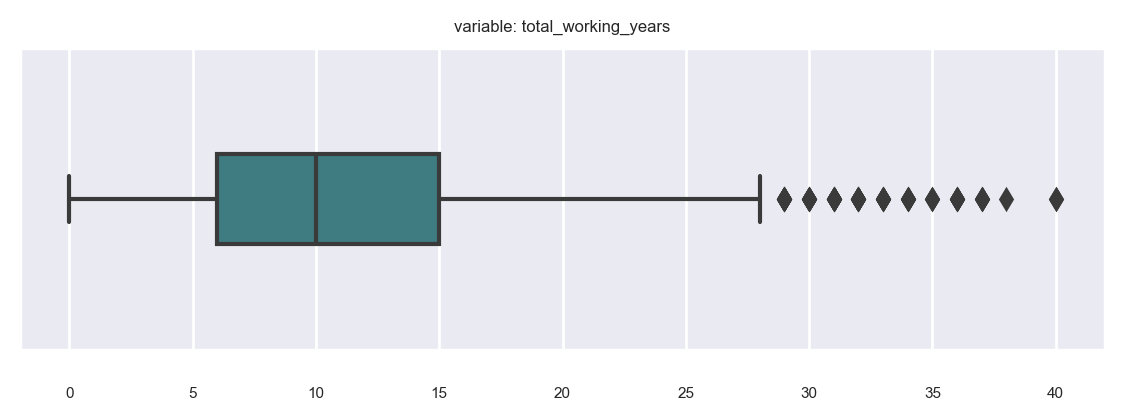

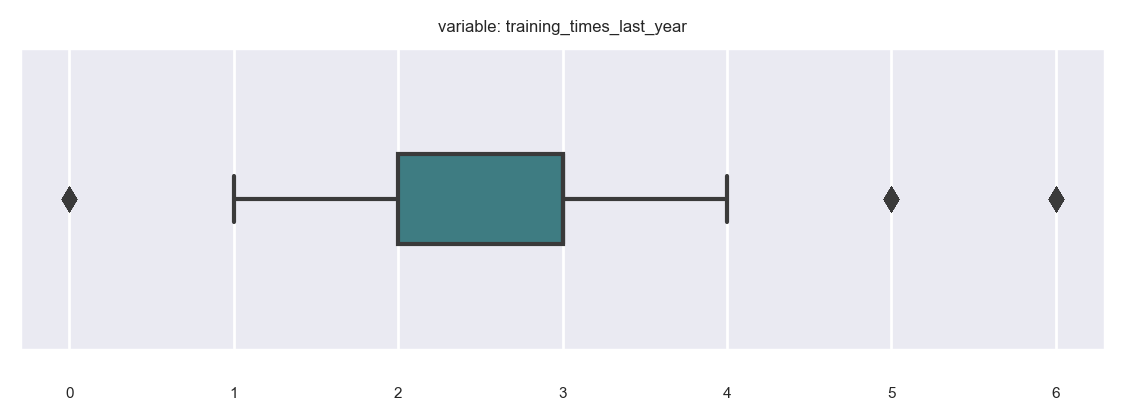

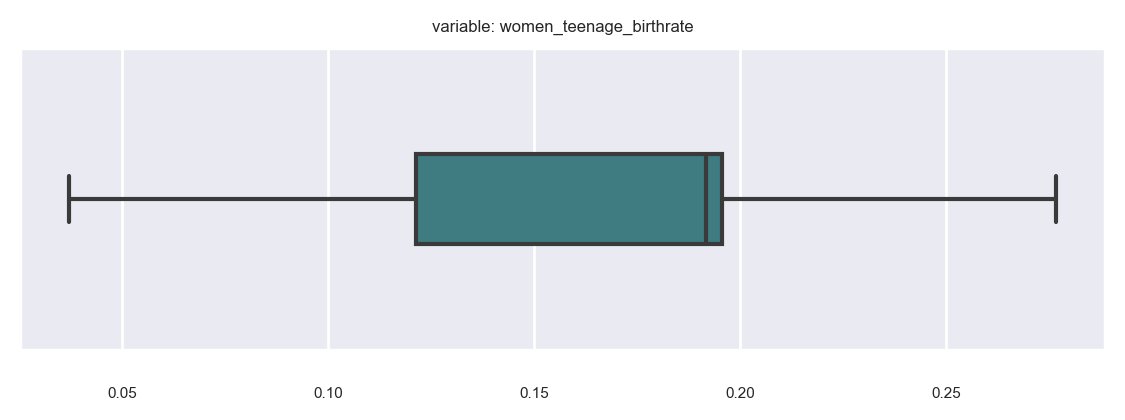

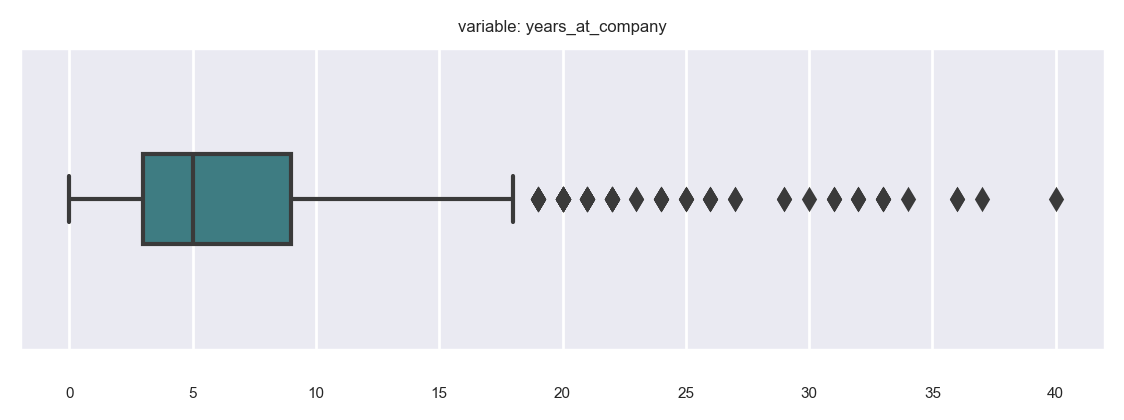

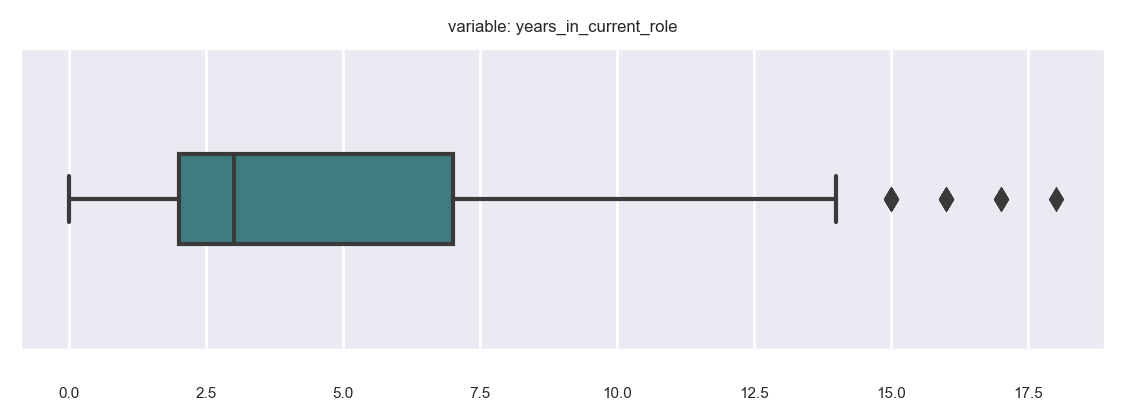

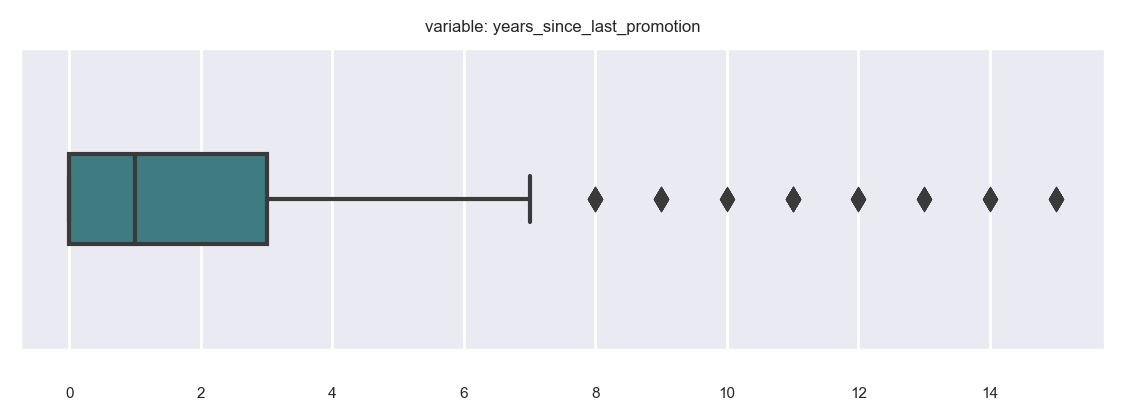

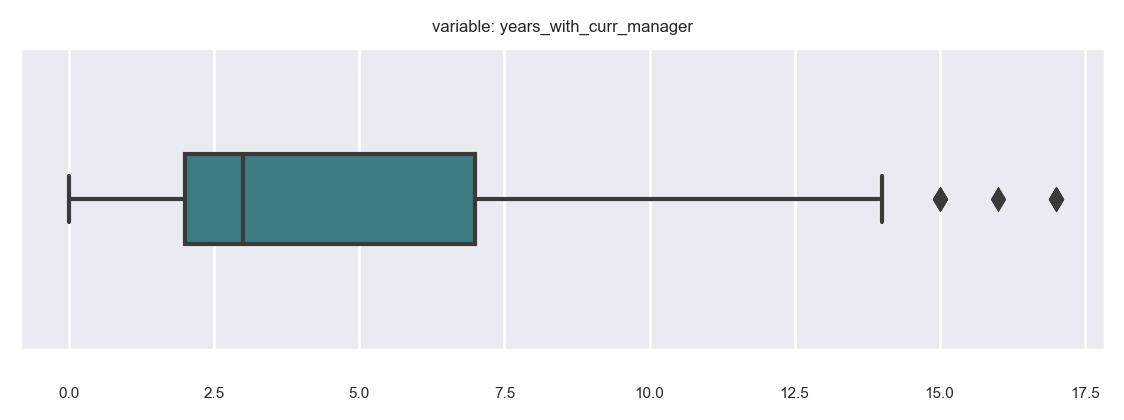

In [23]:
# box plots for continuous variables: are there outliers in the features?

for col in cont_lst:
    plt.figure(figsize = (7, 2))

    sns.boxplot(
        df[col],
        orient = "h", 
        palette = "crest", 
        width= 0.3)

    plt.title(f'variable: {col}')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.show()

In [24]:
# continuous variables: lower and upper bounds using interquartile (IQR) range
'''Function created to determine continuous variable/feature lower/upper bounds using an interquartile range method'''
def get_lower_and_upper_bounds(df):
    holder = []
    num_lst = df.select_dtypes("number").columns.tolist()
    # num_lst = [ele for ele in num_lst if ele not in ("parcel_id", 'longitude', 'latitude', 'blockgroup_assignment')]
    k = 1.5

    # determining continuous features/columns
    for col in df[num_lst]:
        
        # determing 1st and 3rd quartile
        q1, q3 = df[col].quantile([.25, 0.75])
        
        # calculate interquartile range
        iqr = q3 - q1
        
        # set feature/data lower bound limit
        lower_bound = q1 - k * iqr

        # set feature/data upperbound limit
        upper_bound = q3 + k * iqr
        
        metrics = { 
            "column": col,
            "column type": df[col].dtype,
            "iqr": round(iqr, 5),
            "lower_bound": round(lower_bound, 5),
            "lower_outliers": len(df[df[col] < lower_bound]),
            "upper_bound": round(upper_bound, 5),
            "upper_outliers": len(df[df[col] > upper_bound])
        }

        holder.append(metrics)

    new_df = pd.DataFrame(holder)

    # returning the cleaned dataset
    print(f'dataframe shape: {new_df.shape}')

    return new_df

In [25]:
# applying the function to return a lower/upperbounds dataframe

get_lower_and_upper_bounds(df).sort_values(by="upper_outliers", ascending=False).reset_index(drop = True)

dataframe shape: (17, 7)


column column type      iqr  lower_bound  \
0      training_times_last_year       int64     1.00         0.50   
1            single_parent_frac     float64     0.08         0.17   
2                monthly_income       int64  5468.00     -5291.00   
3    years_since_last_promotion       int64     3.00        -4.50   
4              years_at_company       int64     6.00        -6.00   
5           total_working_years       int64     9.00        -7.50   
6         years_in_current_role       int64     5.00        -5.50   
7       years_with_curr_manager       int64     5.00        -5.50   
8                  poverty_rate     float64     0.10        -0.01   
9     employment_rates_at_35yrs     float64     0.05         0.65   
10                          age       int64    13.00        10.50   
11      women_teenage_birthrate     float64     0.07         0.01   
12           incarceration_rate     float64     0.01        -0.00   
13  high_school_graduation_rate     float64     0.10         0.66   
14       household_income_at_35       int64 14544.00     15413.00   
15          percent_salary_hike       int64     6.00         3.00   
16     percentage_married_by_35     float64     0.13         0.09   

    lower_outliers  upper_bound  upper_outliers  
0               54         4.50             184  
1                5         0.51             123  
2                0     16581.00             114  
3                0         7.50             107  
4                0        18.00             104  
5                0        28.50              63  
6                0        14.50              21  
7                0        14.50              14  
8                0         0.37               0  
9                0         0.86               0  
10               0        62.50               0  
11               0         0.31               0  
12               0         0.02               0  
13               0         1.07               0  
14               0     73589.00               0  
15               0        27.00               0  
16               0         0.62               0

#### ``Outlier Observations``

**Intentionally choosing to leave the socioeconomic/opportunity atlas data for testing. Additionally, since these are actual community figures and may subsequently impact an employees attrition decision.**

<u>Ater applying an interquartile range with a k value of 1.5, I will apply/ommit the following outlier cleaning:</u>

**monthly_income:** upperbound $16581.00

- this signals to me that these employees are either contractors or senior leaders at the company. If they are senior leaders, my assumption is that they are more reluctant to make an employment change due to their potential leadership responsibilities, role, and stated salary. 

**year_since_last_promotion:** upperbound 7.50 years

- this signals to me that these employees may already be seeking other opportunities elsewhere - potentially with an employer that is willing to offer them a better position with greater responsibilities, and salary. I will ommit employees over the dataset upperbound.

**years_at_company:** upperbound 18.00 years

- this signals to me that these employees may be reluctant to leave their current employer given the length of their tenure. Additionally, the current median employee tenure in the US is ~5 years, I will ommit employees over this upperbound.

**total_working_years:** upperbound 28.50 year

- similar to above, these employees may also be enroute to retirement or are simply less willing to make a career/employment shift given this late into their careers. Additionally, they might have also learned ways in which they can successfully navigate the socioeconomic challenges apparent in their communities. I will ommit employees over this upperbound.

**years_in_current_role:** upperbound 14.50 years

- given the median US employee/employer tenure, I assume that these employees 1. may already be seeking other opportunities or 2. are comfortable in their current roles and thefore are less willing to take socioeconomic factors as reason to leave their company. 

**years_with_curr_manager:** upperbound 14.50 years

- same as above, yet there could also be a relationship factor thats prevelant in the employees' tenure. Employees may have a good working relationship with their managers where they potentially feel "heard" and are having their socioeconomic concerns addressed. I will ommit employees over this upperbound.

----

``references:``

- https://www.bls.gov/news.release/tenure.nr0.htm


In [26]:
# creating a function to clean outliers at upperbounds

def df_outliers(df):

    # monthly income / leadership or seniority
    df = df[df["monthly_income"] <= 16581.00]
    
    # length of working tenure
    df = df[df["total_working_years"] <= 28.00]

    # length of tenure at current company
    df = df[df["years_at_company"] <= 18.00]

    # number of years since last promotion
    df = df[df["years_since_last_promotion"] <= 7.50]

    # number of years in current role 
    df = df[df["years_in_current_role"] <= 14.50]

    # number of year with current manager
    df = df[df["years_with_curr_manager"] <= 14.50]

    # returning the cleaned dataset
    print(f'dataframe shape: {df.shape}')

    return df

In [27]:
# applying the outlier function

df = df_outliers(df)
df.head()

dataframe shape: (1230, 34)


attrition  age  monthly_income  percent_salary_hike  total_working_years  \
1       True   41            5993                   11                    8   
2      False   49            5130                   23                   10   
4       True   37            2090                   15                    7   
5      False   33            2909                   11                    8   
7      False   27            3468                   12                    6   

   training_times_last_year  years_at_company  household_income_at_35  \
1                         0                 6                   37229   
2                         3                10                   32542   
4                         3                 0                   37229   
5                         3                 8                   37229   
7                         3                 2                   37826   

   high_school_graduation_rate  percentage_married_by_35  incarceration_rate  \
1                         0.84                      0.32                0.01   
2                         0.78                      0.22                0.02   
4                         0.84                      0.32                0.01   
5                         0.84                      0.32                0.01   
7                         0.81                      0.29                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
1                     0.20          0.23                       0.73   
2                     0.28          0.31                       0.74   
4                     0.20          0.23                       0.73   
5                     0.20          0.23                       0.73   
7                     0.19          0.17                       0.73   

   single_parent_frac  years_since_last_promotion      county_name  \
1                0.38                           0     Kings County   
2                0.59                           1     Bronx County   
4                0.38                           0     Kings County   
5                0.38                           3     Kings County   
7                0.34                           2  New York County   

               department education education_field environment_satisfaction  \
1                   Sales         2   Life Sciences                        2   
2  Research & Development         1   Life Sciences                        3   
4  Research & Development         2           Other                        4   
5  Research & Development         4   Life Sciences                        4   
7  Research & Development         1         Medical                        1   

   gender job_involvement job_level               job_role job_satisfaction  \
1  Female               3         2        Sales Executive                4   
2    Male               2         2     Research Scientist                2   
4    Male               2         1  Laboratory Technician                3   
5  Female               3         1     Research Scientist                3   
7    Male               3         1  Laboratory Technician                2   

  marital_status performance_rating relationship_satisfaction state  \
1         Single                  3                         1    NY   
2        Married                  4                         4    NY   
4         Single                  3                         2    NY   
5        Married                  3                         3    NY   
7        Married                  3                         4    NY   

  stock_option_level work_life_balance  years_in_current_role  \
1                  0                 1                      4   
2                  1                 3                      7   
4                  0                 3                      0   
5                  0                 3                      7   
7                  1                 3              

In [28]:
# percentage lost after outlier cleaning
# ~19.5% loss of original df

round((df.shape[0] - ibm_df.shape[0])/df.shape[0], 3)

-0.195

In [29]:
# seeing the dataset

df.head()

attrition  age  monthly_income  percent_salary_hike  total_working_years  \
1       True   41            5993                   11                    8   
2      False   49            5130                   23                   10   
4       True   37            2090                   15                    7   
5      False   33            2909                   11                    8   
7      False   27            3468                   12                    6   

   training_times_last_year  years_at_company  household_income_at_35  \
1                         0                 6                   37229   
2                         3                10                   32542   
4                         3                 0                   37229   
5                         3                 8                   37229   
7                         3                 2                   37826   

   high_school_graduation_rate  percentage_married_by_35  incarceration_rate  \
1                         0.84                      0.32                0.01   
2                         0.78                      0.22                0.02   
4                         0.84                      0.32                0.01   
5                         0.84                      0.32                0.01   
7                         0.81                      0.29                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
1                     0.20          0.23                       0.73   
2                     0.28          0.31                       0.74   
4                     0.20          0.23                       0.73   
5                     0.20          0.23                       0.73   
7                     0.19          0.17                       0.73   

   single_parent_frac  years_since_last_promotion      county_name  \
1                0.38                           0     Kings County   
2                0.59                           1     Bronx County   
4                0.38                           0     Kings County   
5                0.38                           3     Kings County   
7                0.34                           2  New York County   

               department education education_field environment_satisfaction  \
1                   Sales         2   Life Sciences                        2   
2  Research & Development         1   Life Sciences                        3   
4  Research & Development         2           Other                        4   
5  Research & Development         4   Life Sciences                        4   
7  Research & Development         1         Medical                        1   

   gender job_involvement job_level               job_role job_satisfaction  \
1  Female               3         2        Sales Executive                4   
2    Male               2         2     Research Scientist                2   
4    Male               2         1  Laboratory Technician                3   
5  Female               3         1     Research Scientist                3   
7    Male               3         1  Laboratory Technician                2   

  marital_status performance_rating relationship_satisfaction state  \
1         Single                  3                         1    NY   
2        Married                  4                         4    NY   
4         Single                  3                         2    NY   
5        Married                  3                         3    NY   
7        Married                  3                         4    NY   

  stock_option_level work_life_balance  years_in_current_role  \
1                  0                 1                      4   
2                  1                 3                      7   
4                  0                 3                      0   
5                  0                 3                      7   
7                  1                 3              

In [30]:
# renaming/classifying attrition as boolean T/F values

df["attrition"] = df["attrition"].replace({"Yes": True, "No": False})
df.attrition.head()

1     True
2    False
4     True
5    False
7    False
Name: attrition, dtype: bool

----
### **``Splitting the Original Dataset``**


In [31]:
'''Function created to split the initial dataset into train, validate, and test datsets'''
def train_validate_test_split(df):
    train_and_validate, test = train_test_split(
                                                df, 
                                                test_size = 0.2, 
                                                random_state = 548,
                                                stratify = df["attrition"])
    
    train, validate = train_test_split(
                                    train_and_validate,
                                    test_size = 0.3,
                                    random_state = 548,
                                    stratify = train_and_validate["attrition"])

    print(f'train shape: {train.shape}')
    print(f'validate shape: {validate.shape}')
    print(f'test shape: {test.shape}')

    return train, validate, test

In [32]:
# splitting dataset into training, validate, and test datasets

train, validate, test = train_validate_test_split(df)

train shape: (688, 34)
validate shape: (296, 34)
test shape: (246, 34)


In [33]:
# what is the percentage of the target variable in ea. dataset?
# this checks out!

print(f'target percentage in train: {round(len(train[train["attrition"] == True])/train.shape[0], 3)}')
print(f'target percentage in validate: {round(len(validate[validate["attrition"] == True])/validate.shape[0], 3)}')
print(f'target percentage in test: {round(len(test[test["attrition"] == True])/test.shape[0], 3)}')

target percentage in train: 0.177
target percentage in validate: 0.176
target percentage in test: 0.175


----
#### ``Setting a Baseline: Prediction Employee Attrition``

In [34]:
# let's set an attrition baseline using a mode method for ea. dataset
# For the baseline accuracy, I have taken the mode of the two (2) binary "attrition" options = False and have set this as my random prediction
# baseline accuracy score: the total number of times that the baseline prediction matched the actual employee attrition outcome
# baseline accuracy score: ~82.0% **(note that if the goal is to predict attrition = 1, then baseline accuracy is ~18%)

train_baseline = train
train_baseline["baseline_prediction"] = True
baseline_train = (train_baseline["baseline_prediction"] == train_baseline["attrition"]).mean().round(3)
print(f'Training Baseline Accuracy: % {(baseline_train * 100).round(5)}')

print('-------------------------------------------')

validate_baseline = validate
validate_baseline["baseline_prediction"] = True
baseline_val = (validate_baseline["baseline_prediction"] == validate_baseline["attrition"]).mean().round(3)
print(f'Validate Baseline Accuracy: % {(baseline_val * 100).round(5)}')

Training Baseline Accuracy: % 17.7
-------------------------------------------
Validate Baseline Accuracy: % 17.6


In [35]:
# current continuous variables in dataset

train.select_dtypes(include = "number").columns.tolist()

['age',
 'monthly_income',
 'percent_salary_hike',
 'total_working_years',
 'training_times_last_year',
 'years_at_company',
 'household_income_at_35',
 'high_school_graduation_rate',
 'percentage_married_by_35',
 'incarceration_rate',
 'women_teenage_birthrate',
 'poverty_rate',
 'employment_rates_at_35yrs',
 'single_parent_frac',
 'years_since_last_promotion',
 'years_in_current_role',
 'years_with_curr_manager']

In [36]:
# let's also look at discrete variables

train.select_dtypes(exclude = "number").columns.tolist()

['attrition',
 'county_name',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'performance_rating',
 'relationship_satisfaction',
 'state',
 'stock_option_level',
 'work_life_balance',
 'baseline_prediction']

In [37]:
# setting continuous variables list

cont_lst = sorted([
'age',
'monthly_income',
'percent_salary_hike',
'total_working_years',
'training_times_last_year',
'years_at_company',
'household_income_at_35',
'high_school_graduation_rate',
'percentage_married_by_35',
'incarceration_rate',
'women_teenage_birthrate',
'poverty_rate',
'employment_rates_at_35yrs',
'single_parent_frac',
'years_since_last_promotion',
'years_in_current_role',
'years_with_curr_manager',
])

cont_lst

['age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'incarceration_rate',
 'monthly_income',
 'percent_salary_hike',
 'percentage_married_by_35',
 'poverty_rate',
 'single_parent_frac',
 'total_working_years',
 'training_times_last_year',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager']

In [38]:
# setting disc variables list

disc_lst = sorted([
'stock_option_level',
'work_life_balance',
'education',
'job_involvement',
'job_level',
'job_satisfaction',
'performance_rating',
'relationship_satisfaction',
'county_name',
'state',
'department',
'education_field',
'gender',
'job_role',
'marital_status',
'environment_satisfaction'
])

disc_lst

['county_name',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'performance_rating',
 'relationship_satisfaction',
 'state',
 'stock_option_level',
 'work_life_balance']

-----
### ``Exploration: Hypothesis Testing``

    The focus will first be on determined equity/community variables

**"Attrition":** Discrete/Categorical Target Variable

**``Variables not taken into exploration:``**

1. 'business_travel'
2. 'cty'
3. 'daily_rate'
4. 'distance_from_home'
5. 'hourly_rate'
6. 'monthly_rate'
7. 'num_companies_worked'
8. 'over_time'


**``Continuous Variables:``**

1. 'age'
2. 'employment_rates_at_35yrs'
3. 'high_school_graduation_rate'
4. 'household_income_at_35'
5. 'incarceration_rate'
6. 'monthly_income'
7. 'percent_salary_hike'
8. 'percentage_married_by_35'
9. 'poverty_rate'
10. 'single_parent_frac'
11. 'total_working_years'
12. 'training_times_last_year'
13. 'women_teenage_birthrate'
14. 'years_at_company'
15. 'years_since_last_promotion'
16. 'years_in_current_role'
17. 'years_with_curr_manager'

**``Discrete Varibles:``**

1. 'attrition'
2. 'county_name'
3. 'department'
4. 'education'
5. 'education_field'
6. 'environment_satisfaction'
7. 'gender'
8. 'job_involvement'
9. 'job_level'
10. 'job_role'
11. 'job_satisfaction'
12. 'marital_status'
13. 'performance_rating'
14. 'relationship_satisfaction'
15. 'standard_hours'
16. 'state'
17. 'stock_option_level'
18. 'work_life_balance'


In [39]:
# updating datasets with confirmed variables

train = train[[
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

validate = validate[[ 
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

test = test[[ 
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

In [40]:
# cleaning dataframes for needed variables

# train[disc_lst] = train[disc_lst].astype(object)
# validate[disc_lst] = validate[disc_lst].astype(object)
# test[disc_lst] = test[disc_lst].astype(object)

# train.info()

In [41]:
# 2nd split: splitting larger datasets into x and y variables

X_train = train.drop(columns = "attrition")
y_train = train['attrition']

X_validate = validate.drop(columns = "attrition")
y_validate = validate['attrition']

X_test = test.drop(columns = "attrition")
y_test = test['attrition']

In [42]:
# checking the target variable
# note: the model will also read boolean type (F/T) as either (0/1)
# False (did not churn):    566 employees
# True (did churn):     122 employees

y_train.value_counts()

False    566
True     122
Name: attrition, dtype: int64

----
### ``Hypothesis Tests: Continuous Variables``

$H_0$: The variable mean of those who leave the company is not statistically different than the population mean.

$H_a$: The variable mean of those who leave the company is statistically different than the population variable mean.

$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

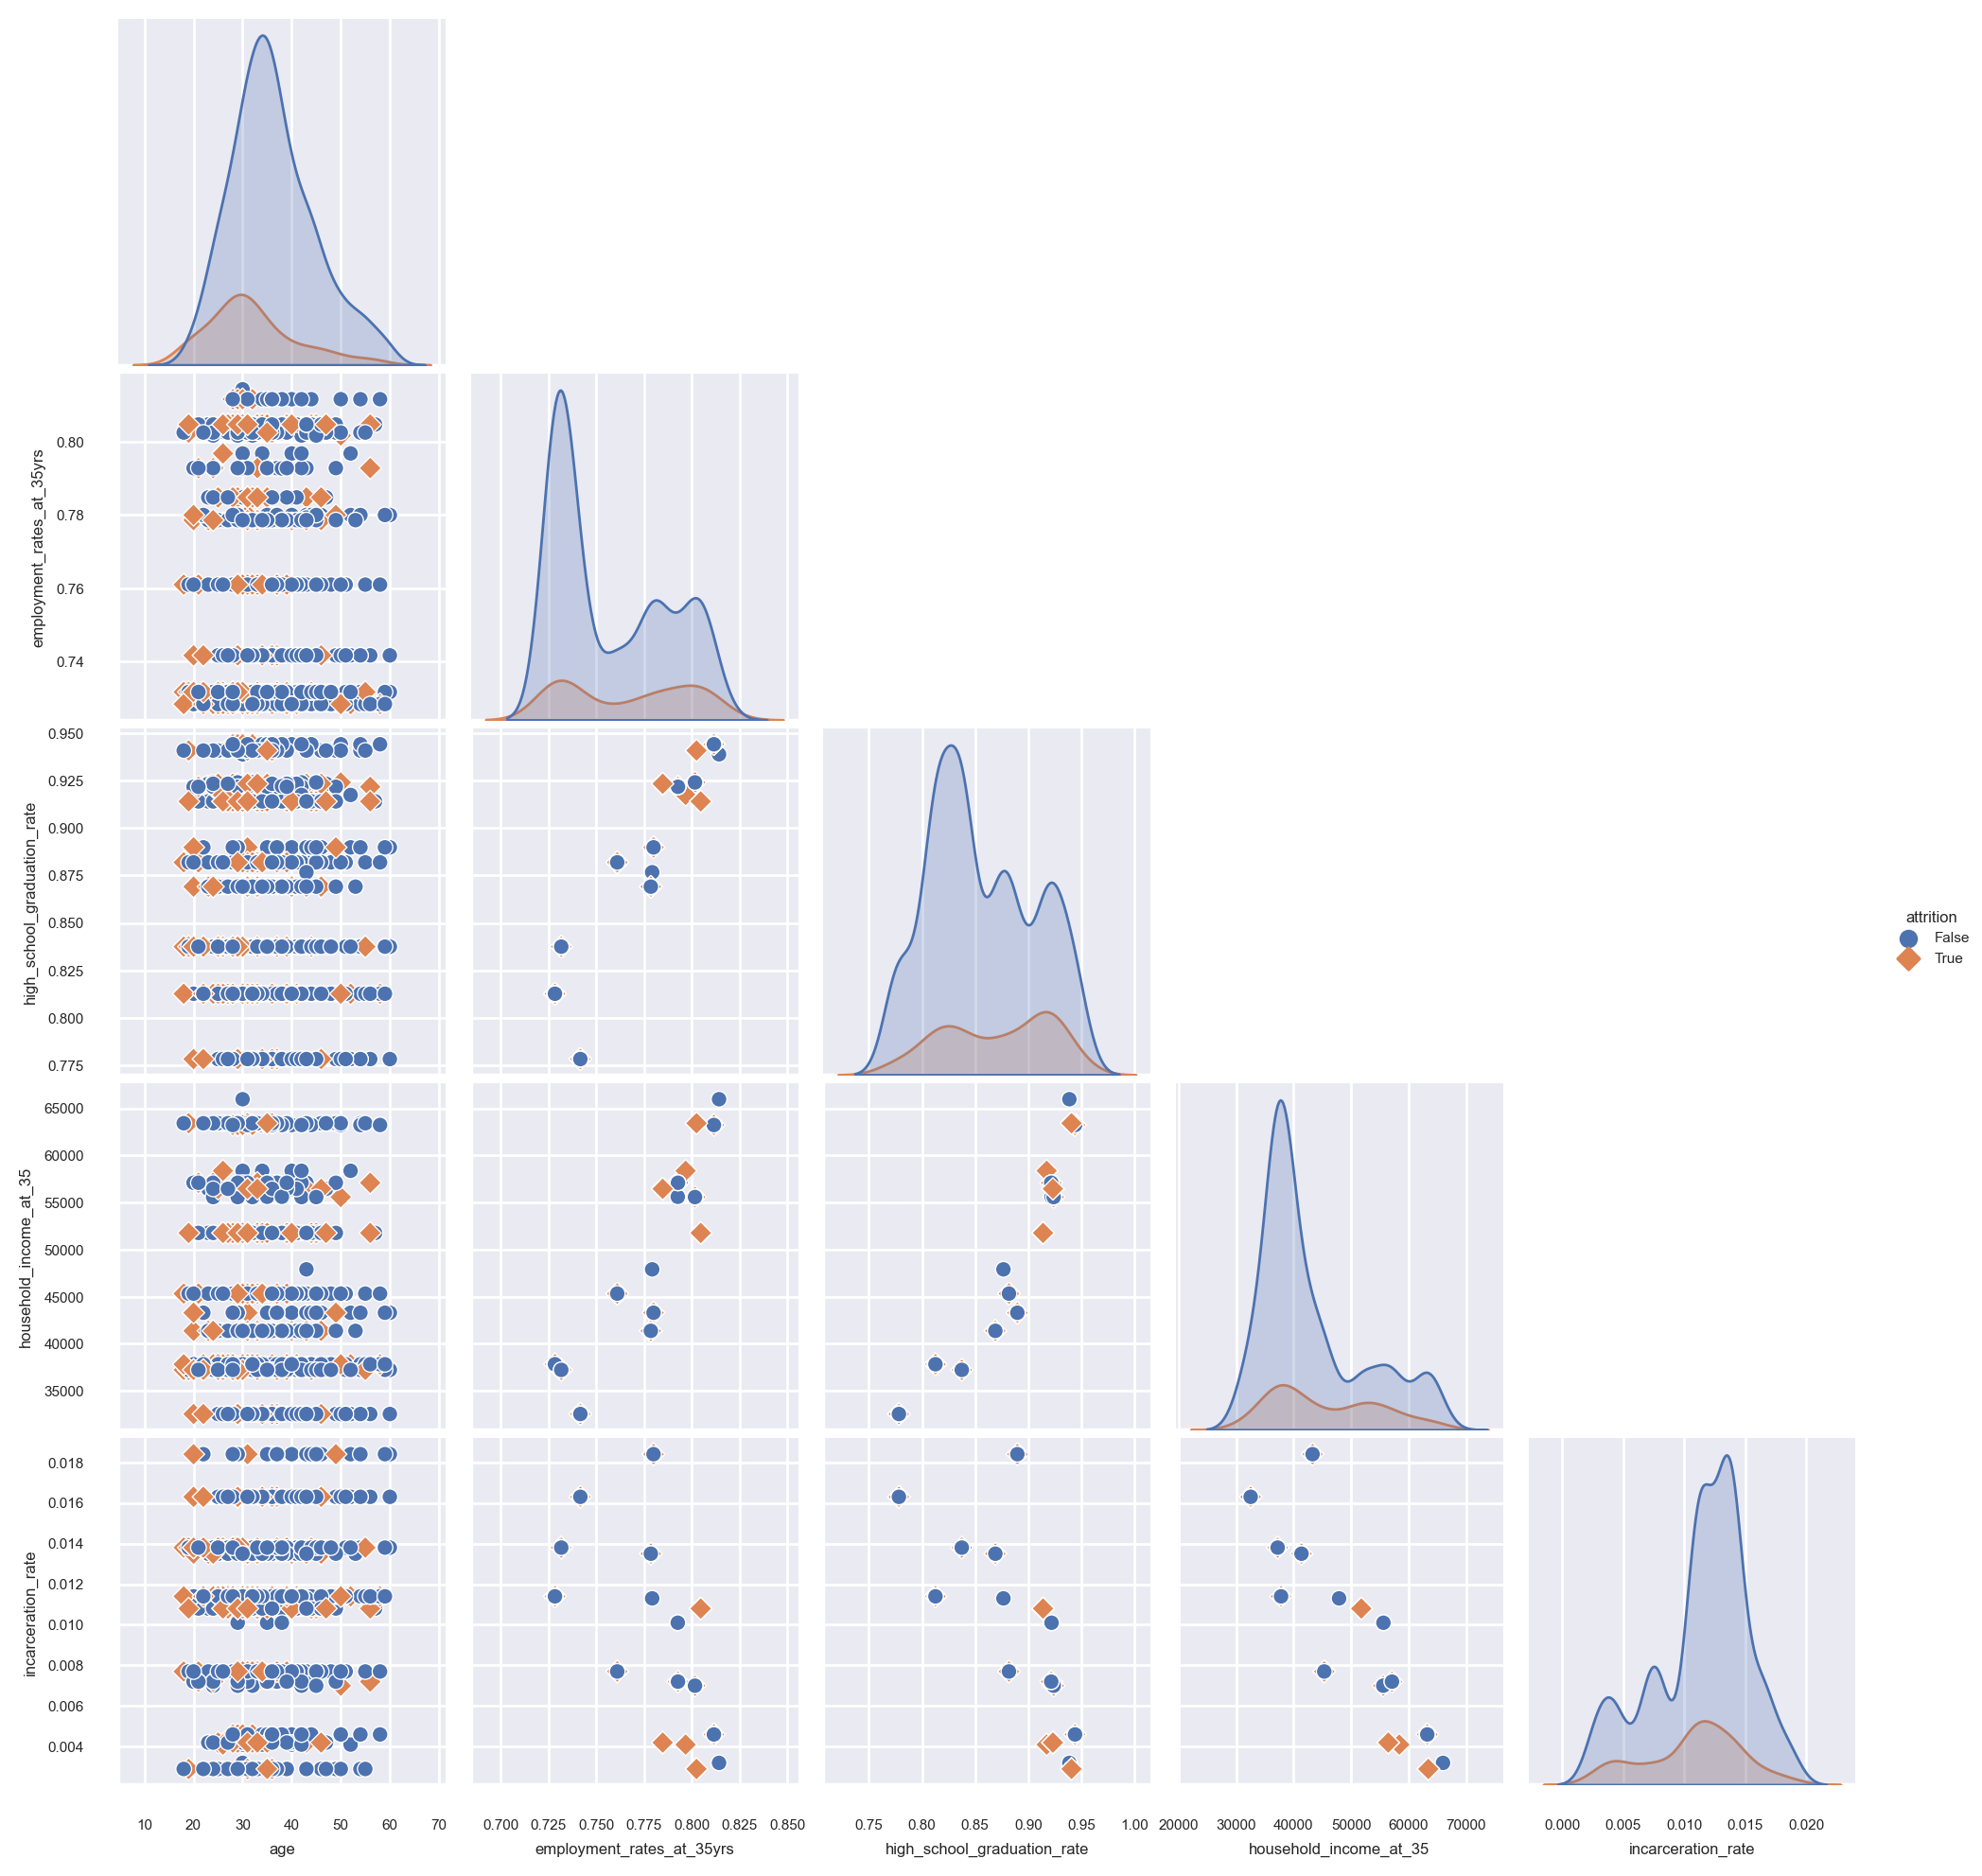

In [43]:
# sns.pairplot (first 6)

sns.pairplot(
    train, 
    vars =[
        'age',
        'employment_rates_at_35yrs',
        'high_school_graduation_rate',
        'household_income_at_35',
        'incarceration_rate'],
    corner = True,  
    hue = "attrition",
    height = 2,
    markers=["o", "D"])

plt.show()

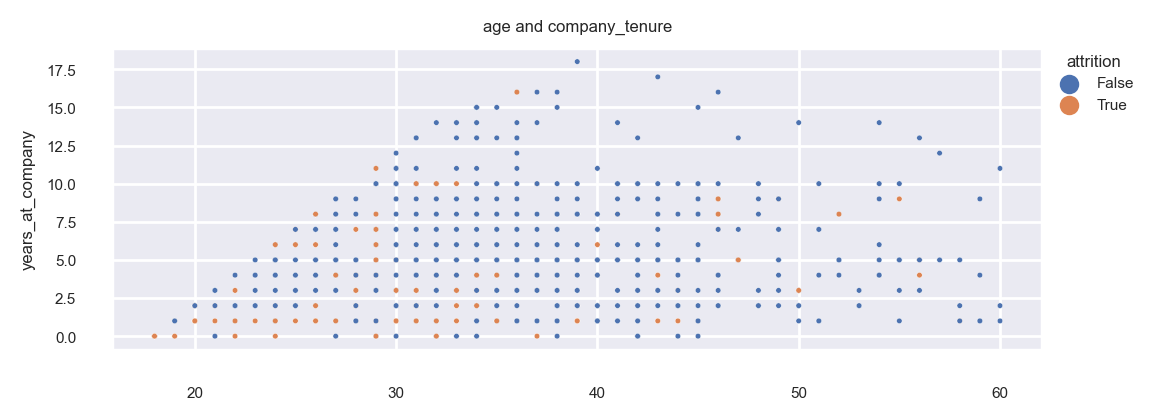

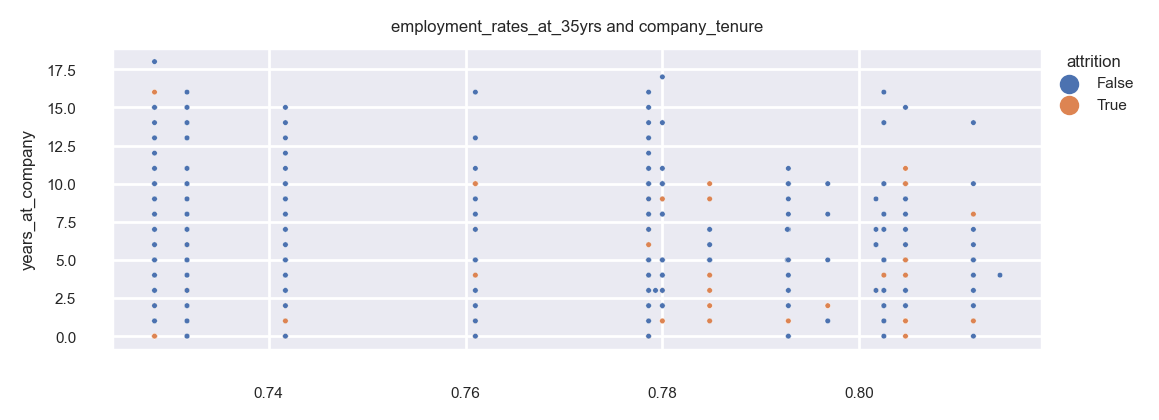

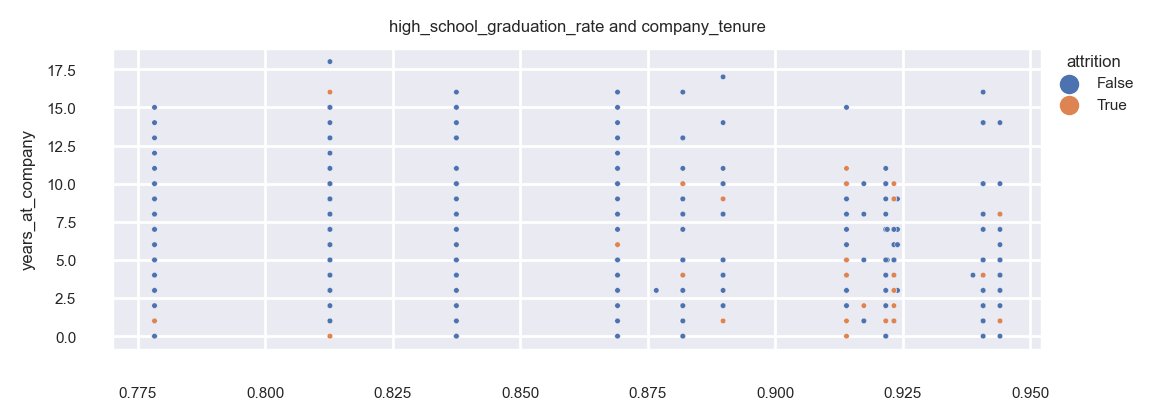

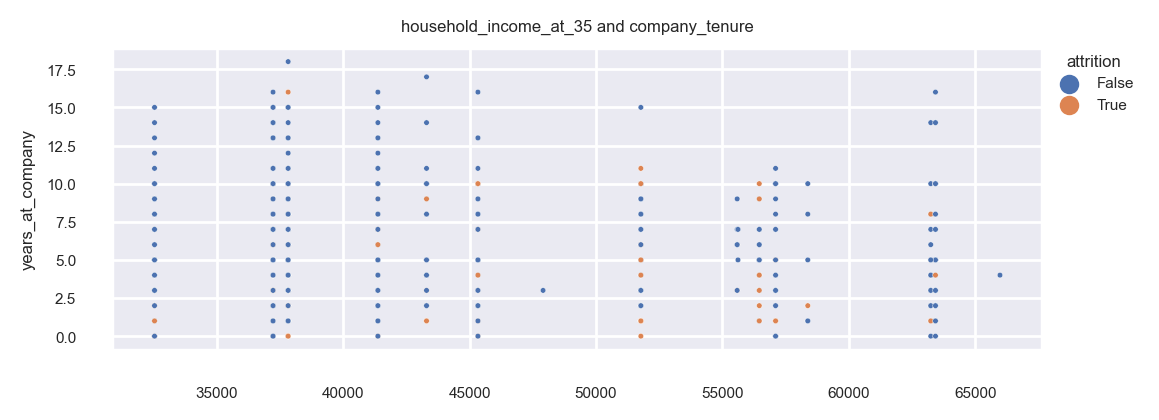

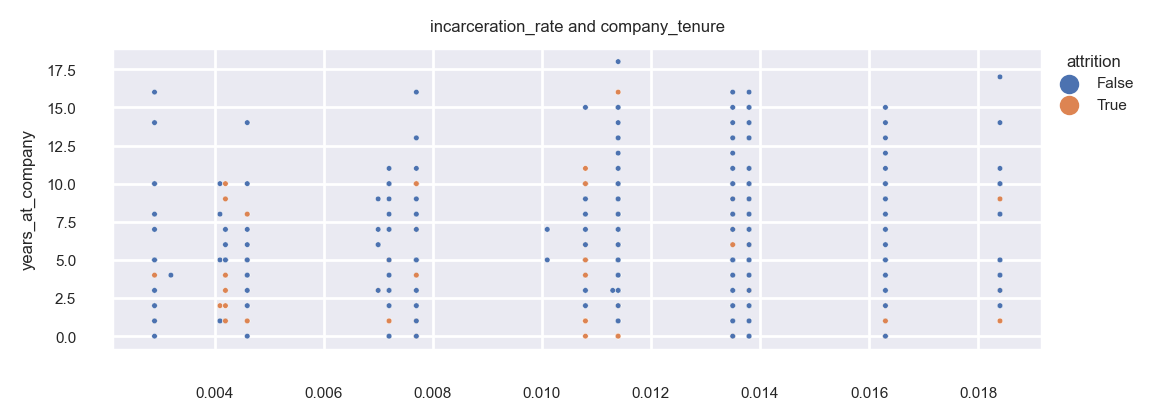

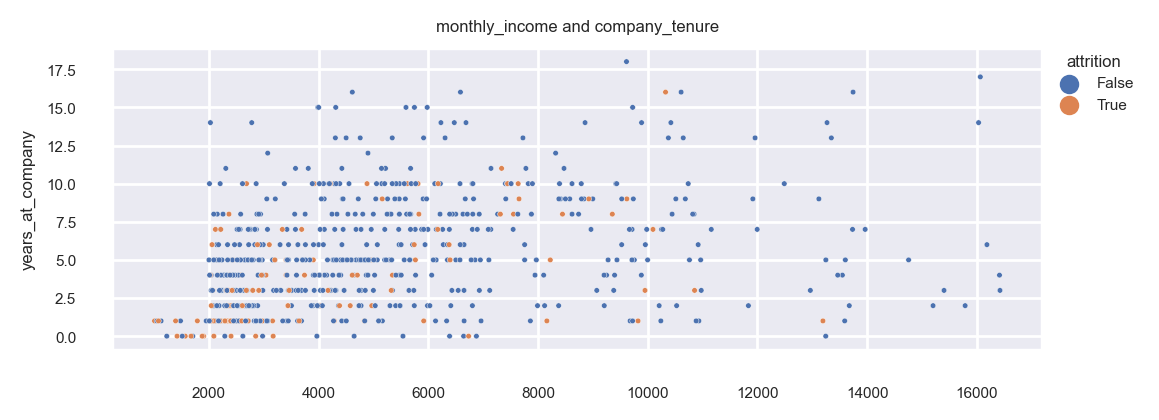

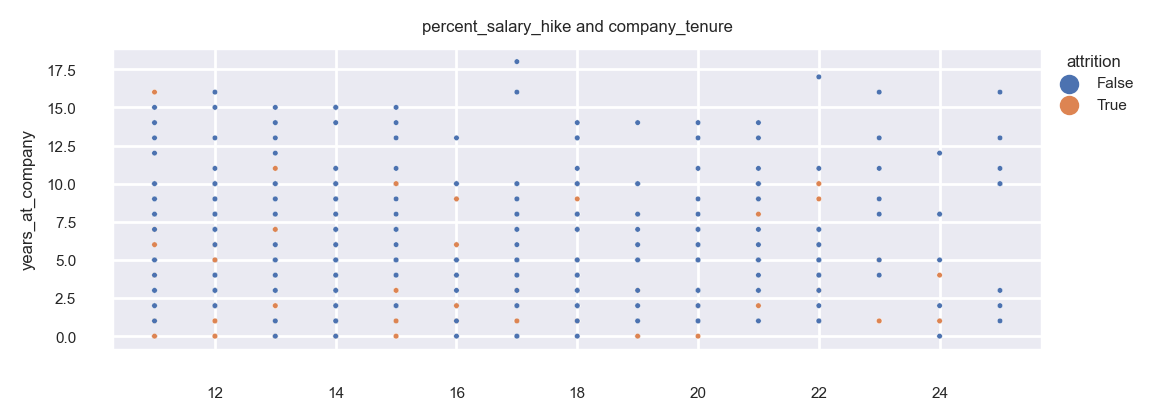

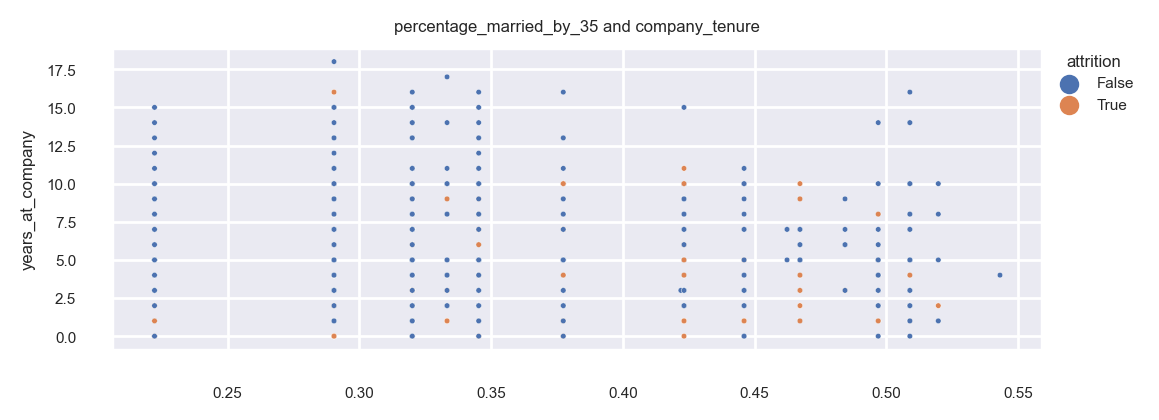

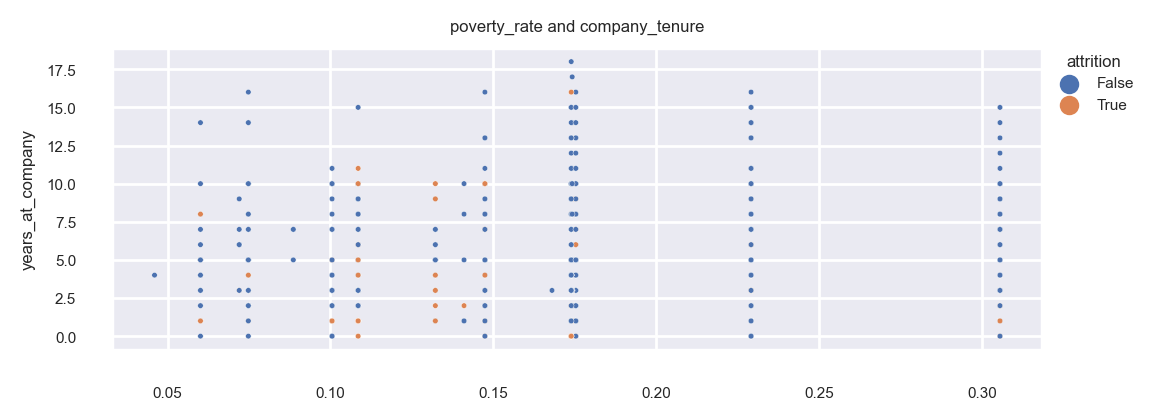

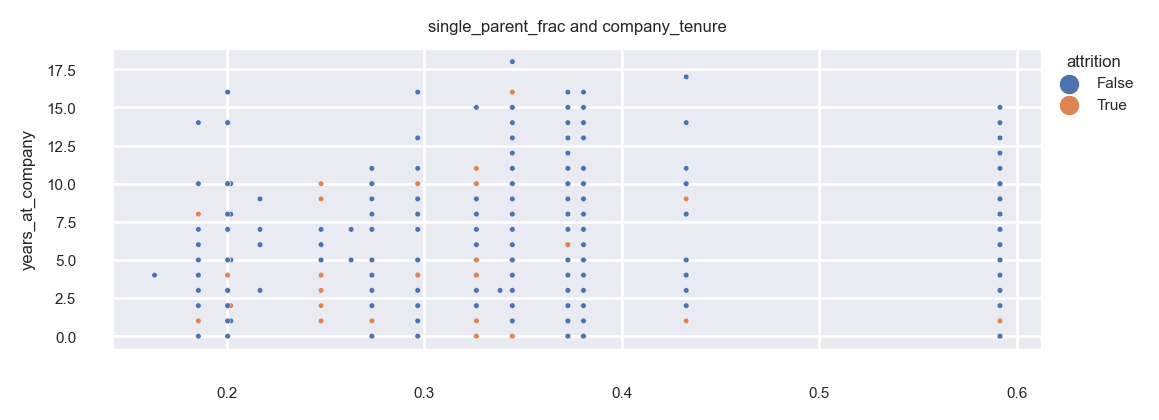

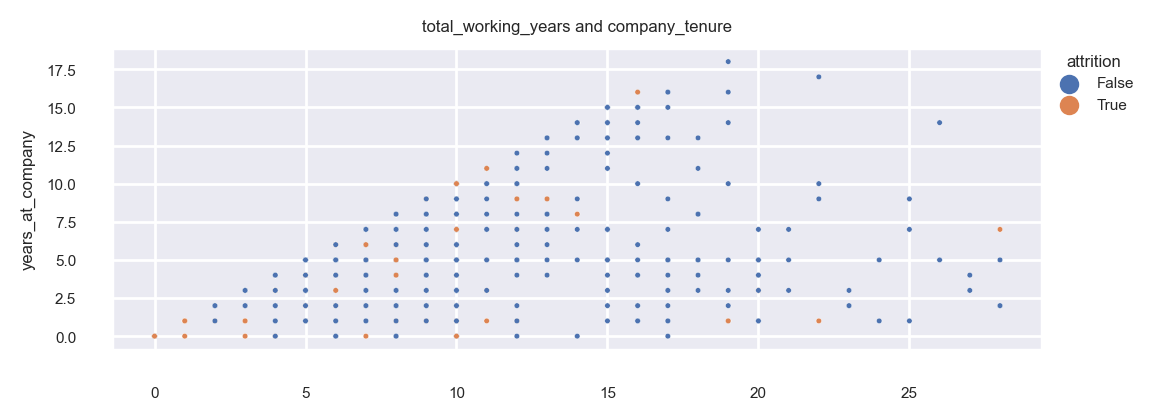

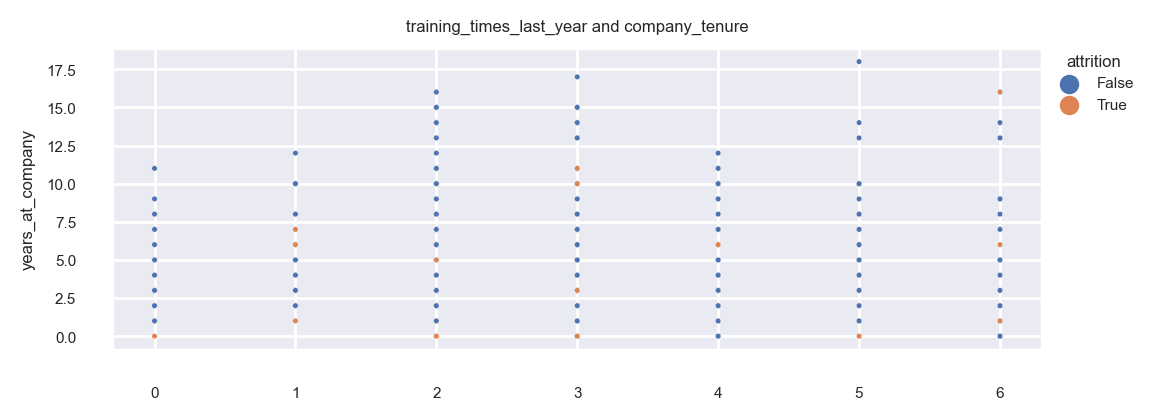

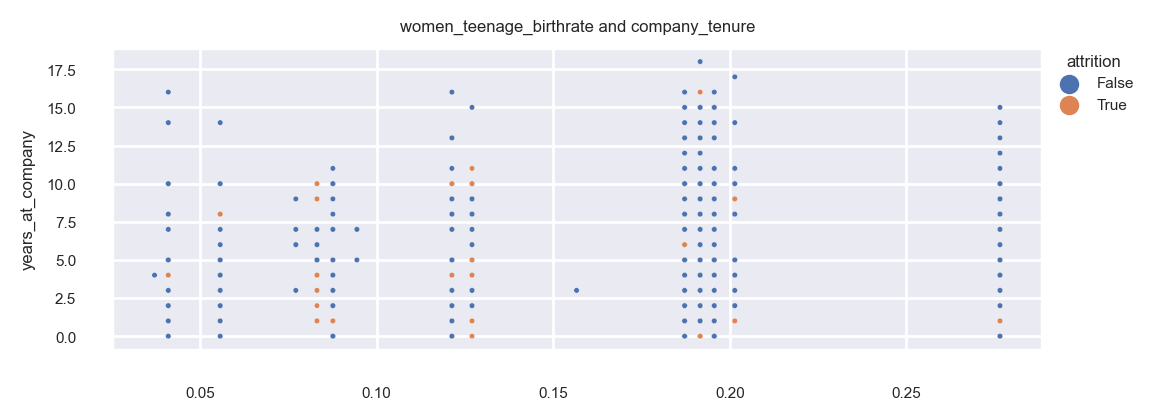

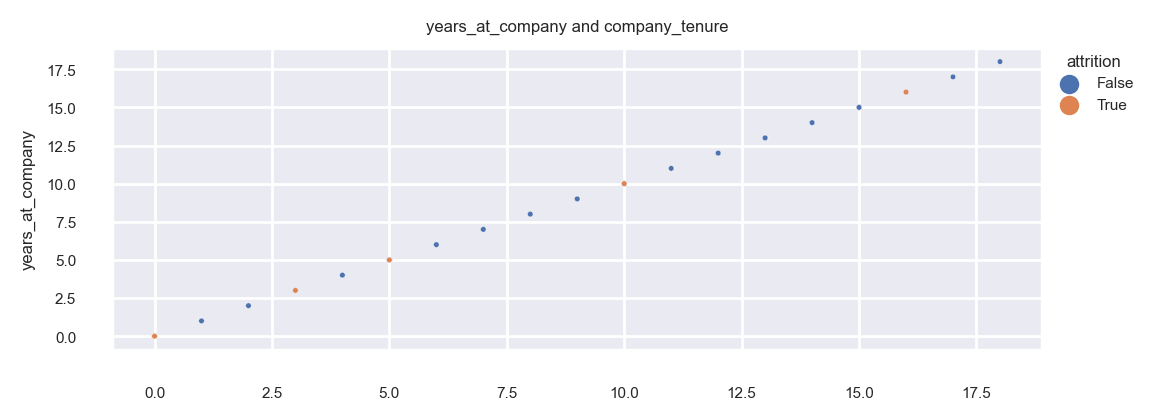

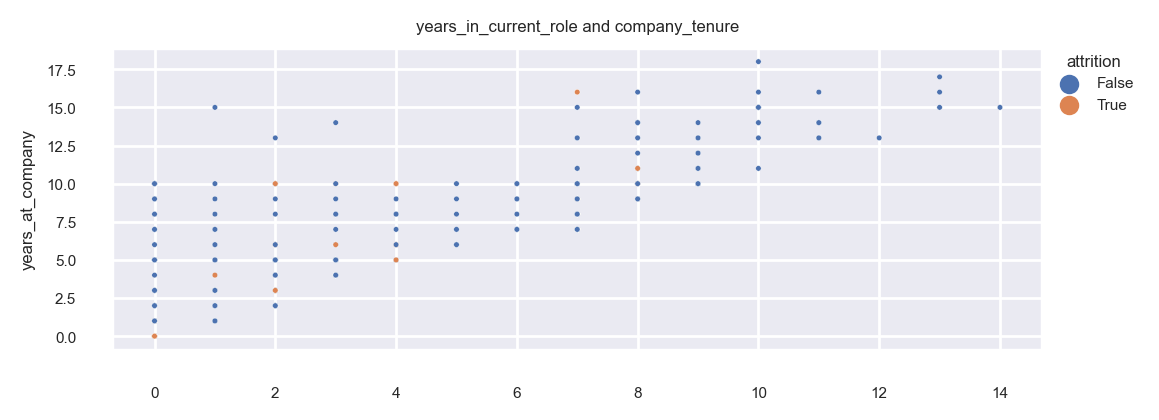

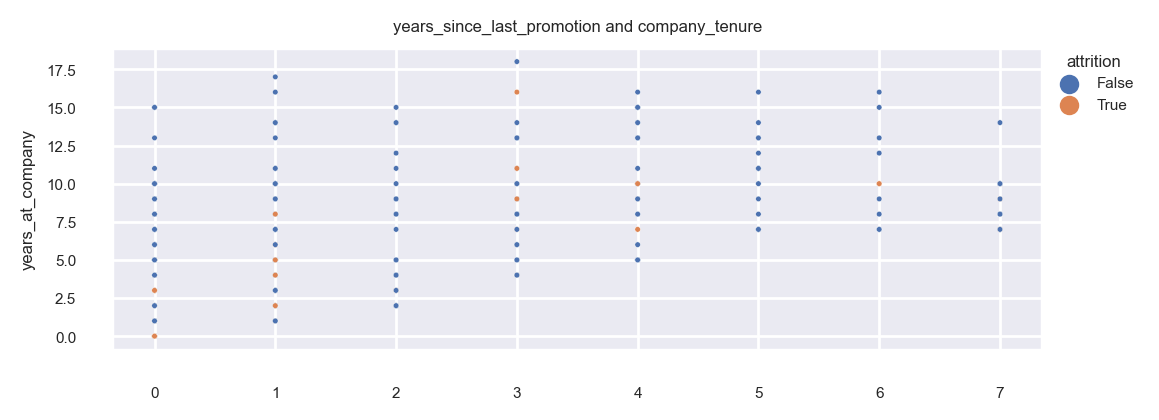

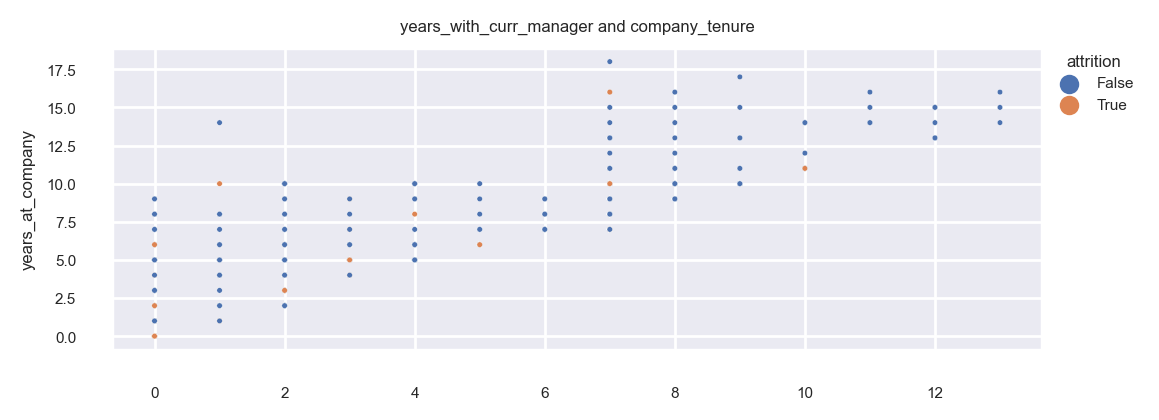

In [44]:
# plotting continuous variables against target

for col in cont_lst:
    plt.figure(figsize=(6, 2))

    sns.scatterplot(
        train[col],
        train["years_at_company"],
        hue = train["attrition"],
        s = 4)

    plt.legend(
        bbox_to_anchor=(1.105, 1), 
        title = "attrition", 
        loc = 'upper right', 
        borderaxespad = 0)

    plt.title(f'{col} and company_tenure')
    plt.xlabel(None)
    plt.show()

In [45]:
# continuous variables and evaluating statistical signifance in sample mean vs. population mean
import scipy.stats as stats 

alpha = 0.05

metrics = []
for col in cont_lst:
    pop_mean = train[col].mean()
    # sample_2_mean = train[train["attrition"] == False][col]
    sample_1_mean = train[train["attrition"] == True][col]

    t_score, p_value = stats.ttest_1samp(sample_1_mean, pop_mean)

    if p_value < alpha:
        output = {
            "continuous_feature": col,
            "t_score": t_score,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'Column: {col} not statistically significant.')
        print("--------------------------------------")

onesample_t_test_scores = pd.DataFrame(metrics)
onesample_t_test_scores.round(4)

Column: incarceration_rate not statistically significant.
--------------------------------------
Column: percent_salary_hike not statistically significant.
--------------------------------------
Column: single_parent_frac not statistically significant.
--------------------------------------
Column: training_times_last_year not statistically significant.
--------------------------------------
Column: years_since_last_promotion not statistically significant.
--------------------------------------


continuous_feature  t_score  p_value
0                           age    -4.31     0.00
1     employment_rates_at_35yrs     2.72     0.01
2   high_school_graduation_rate     2.59     0.01
3        household_income_at_35     2.38     0.02
4                monthly_income    -4.64     0.00
5      percentage_married_by_35     2.37     0.02
6                  poverty_rate    -2.41     0.02
7           total_working_years    -5.68     0.00
8       women_teenage_birthrate    -2.12     0.04
9              years_at_company    -5.01     0.00
10        years_in_current_role    -4.31     0.00
11      years_with_curr_manager    -4.41     0.00

In [46]:
onesample_t_test_scores.continuous_feature.tolist()

['age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'monthly_income',
 'percentage_married_by_35',
 'poverty_rate',
 'total_working_years',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager']

----

**``1-sample T-test results summary:``**

After initial continuous hypotheses testing against the population mean - we can conclude that the following features/variables hold a statistical relationship with the target:

1. age
2. employment rates at 35yrs
3. high school graduation rate
4. household income at 35
5. monthly income
6. percentage married by 35
7. poverty rate
8. total working years
9. women teenage birthrate
10. years at company
11. years in current role
12. years with curr manager

<u>questions/thoughts after analysis:</u>

there are several features/variables that I will want to further investigate against the population. For example, I wonder if certain features such as "the percentage of single parents" in communities, or the "total number of years since an employee's last promotion" may be less linear and tests such as non-parametric/linear relationship testing may be more suitable for evaluating them against a population.

----
### ``Hypothesis Tests: Categorical/Discrete Variables``

$H_0$: "There is NO association/relationship between observed variable outcomes and expected employee attrition."

$H_a$: "There IS an association/relationship between observed variable outcomes and expected employee attrition."

$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

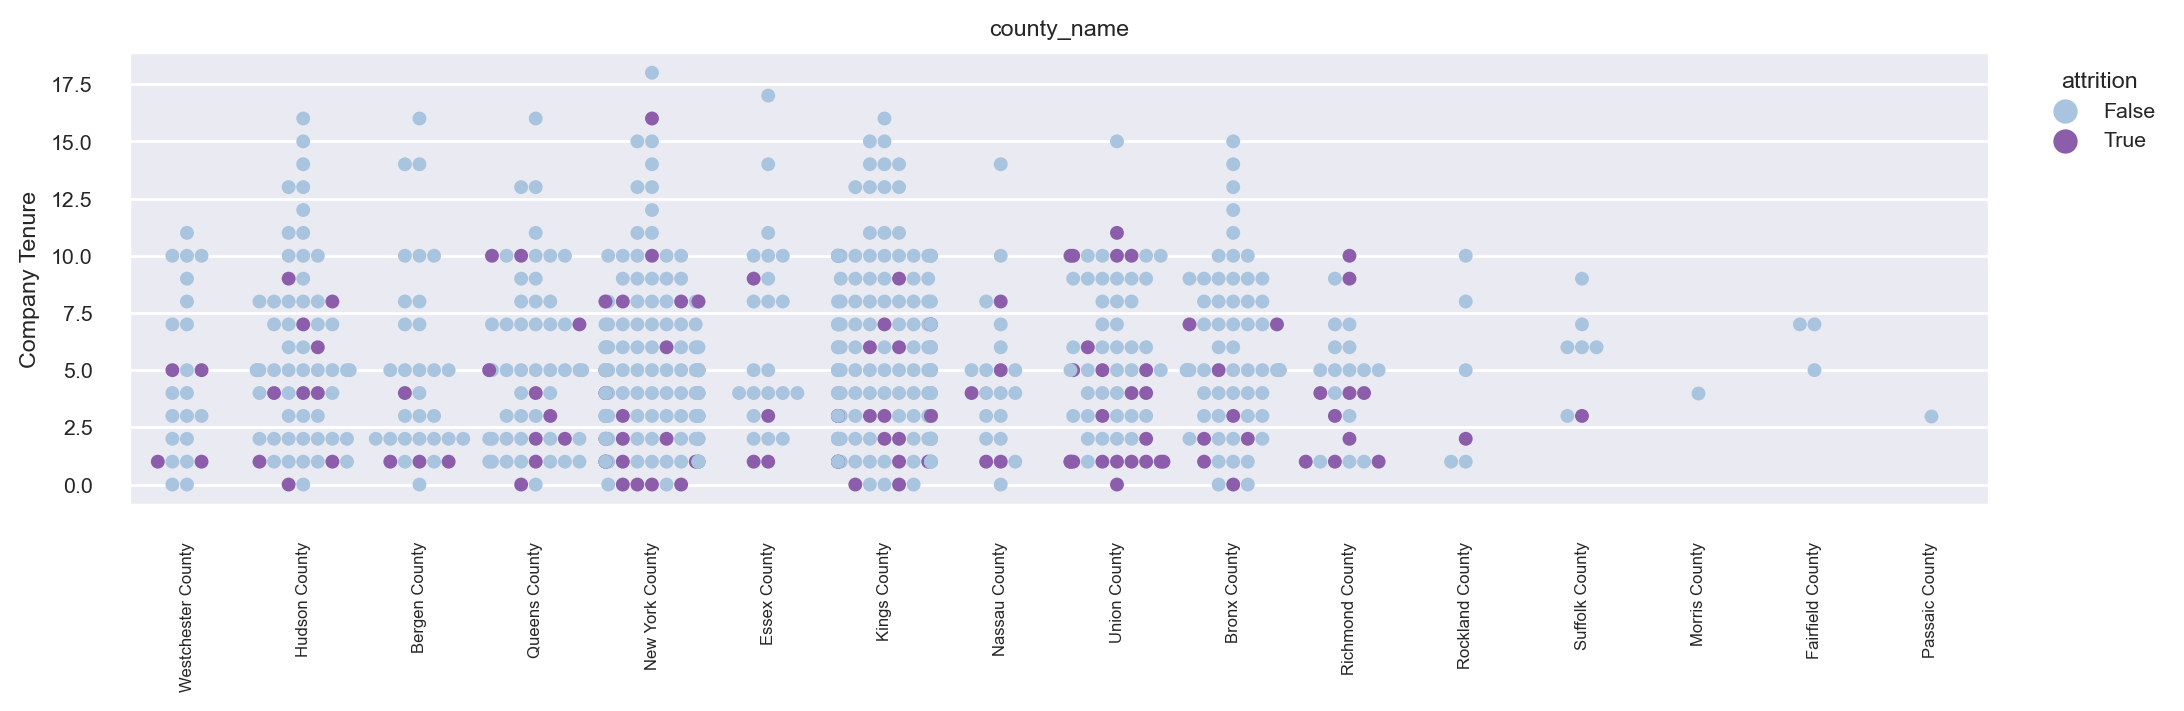

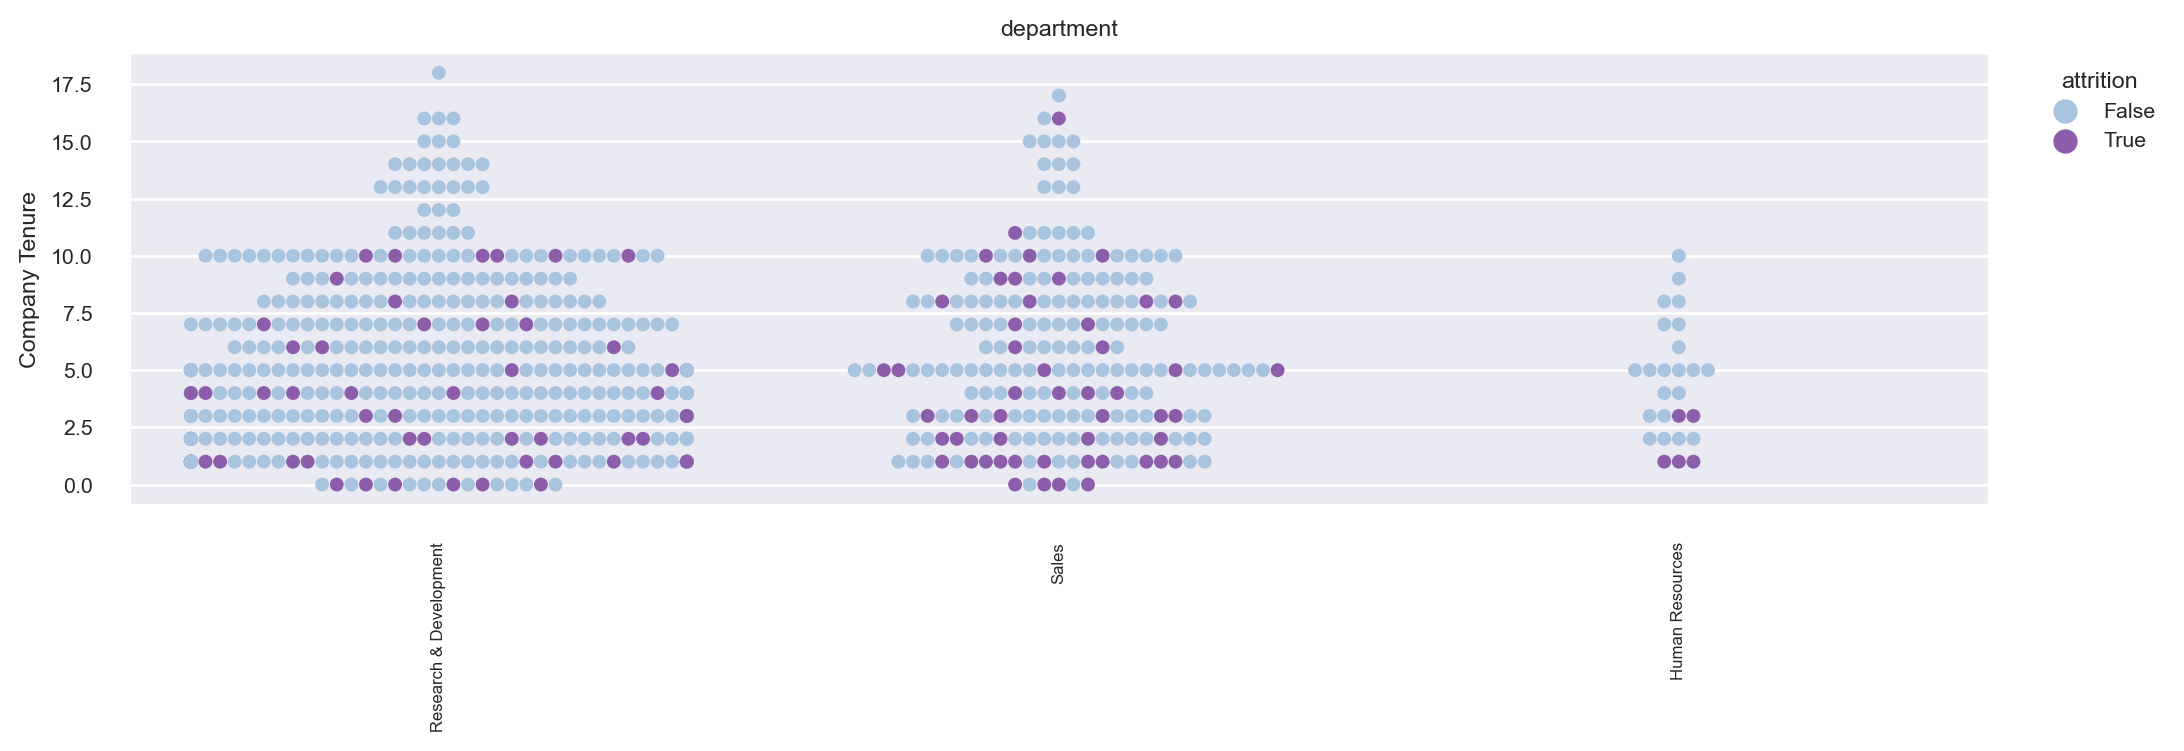

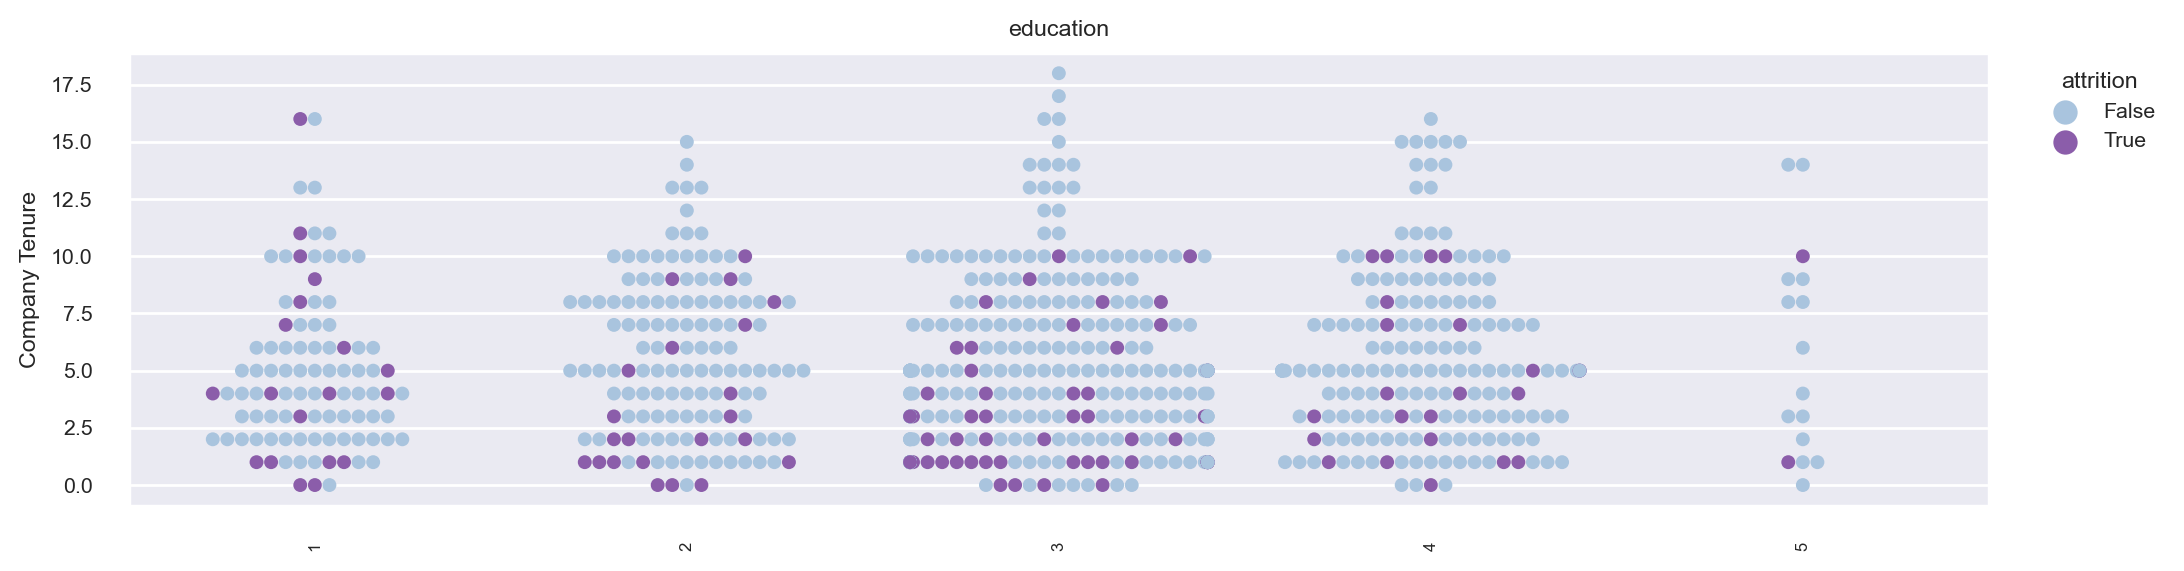

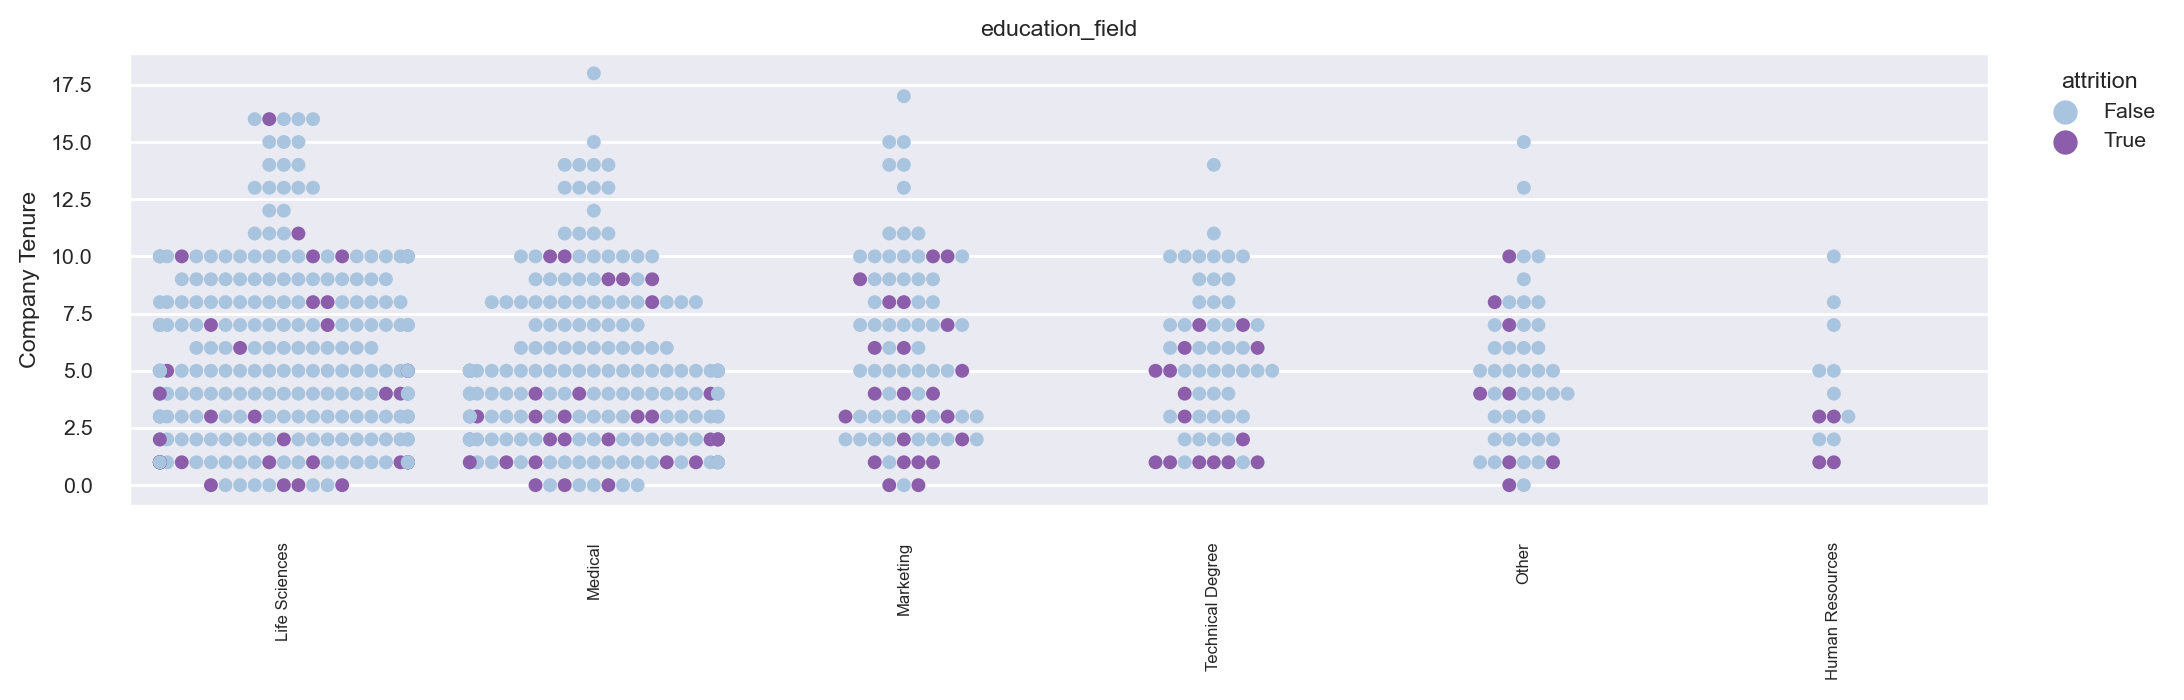

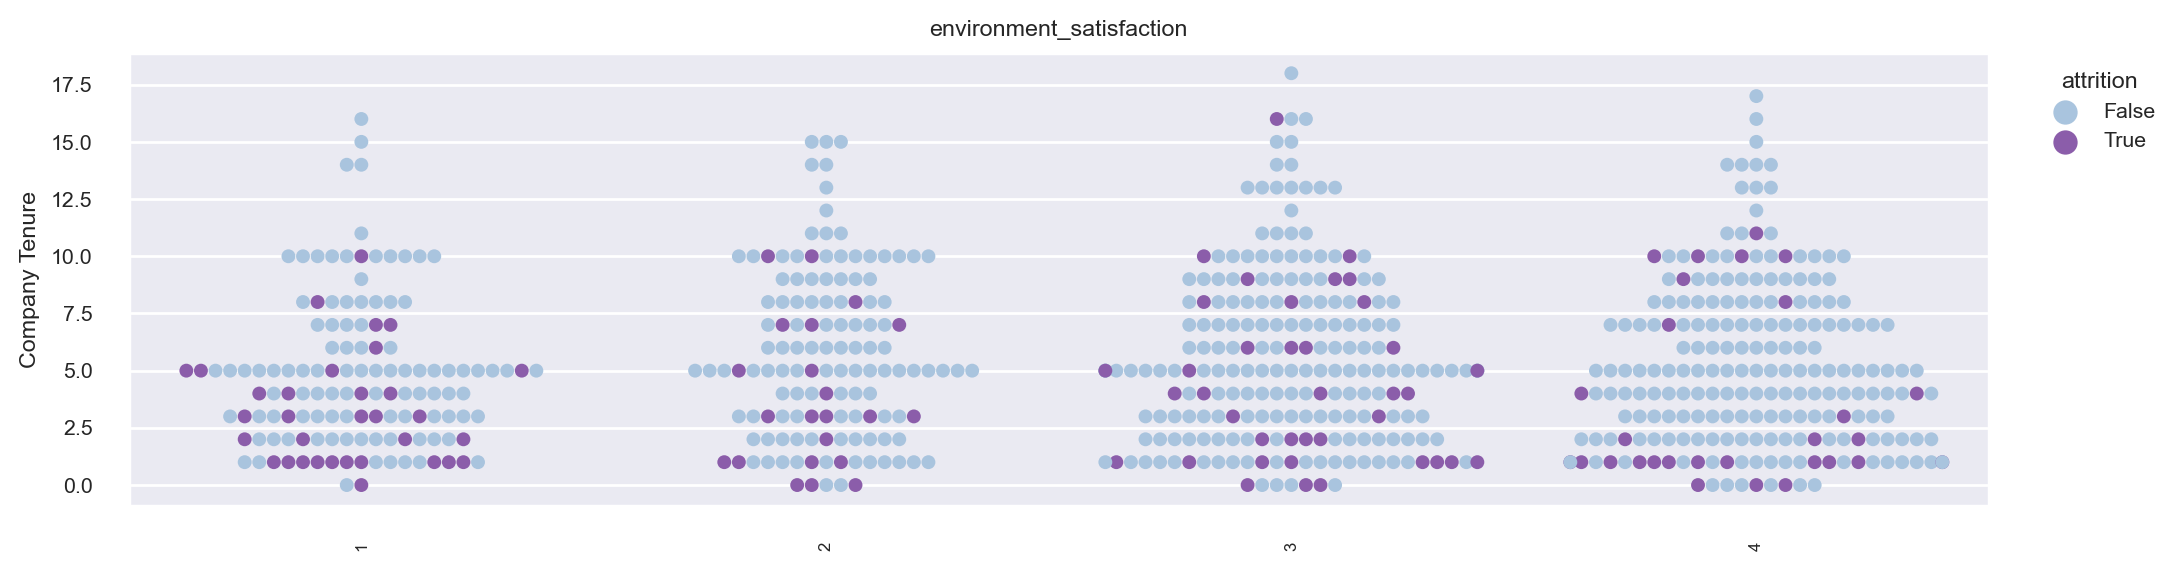

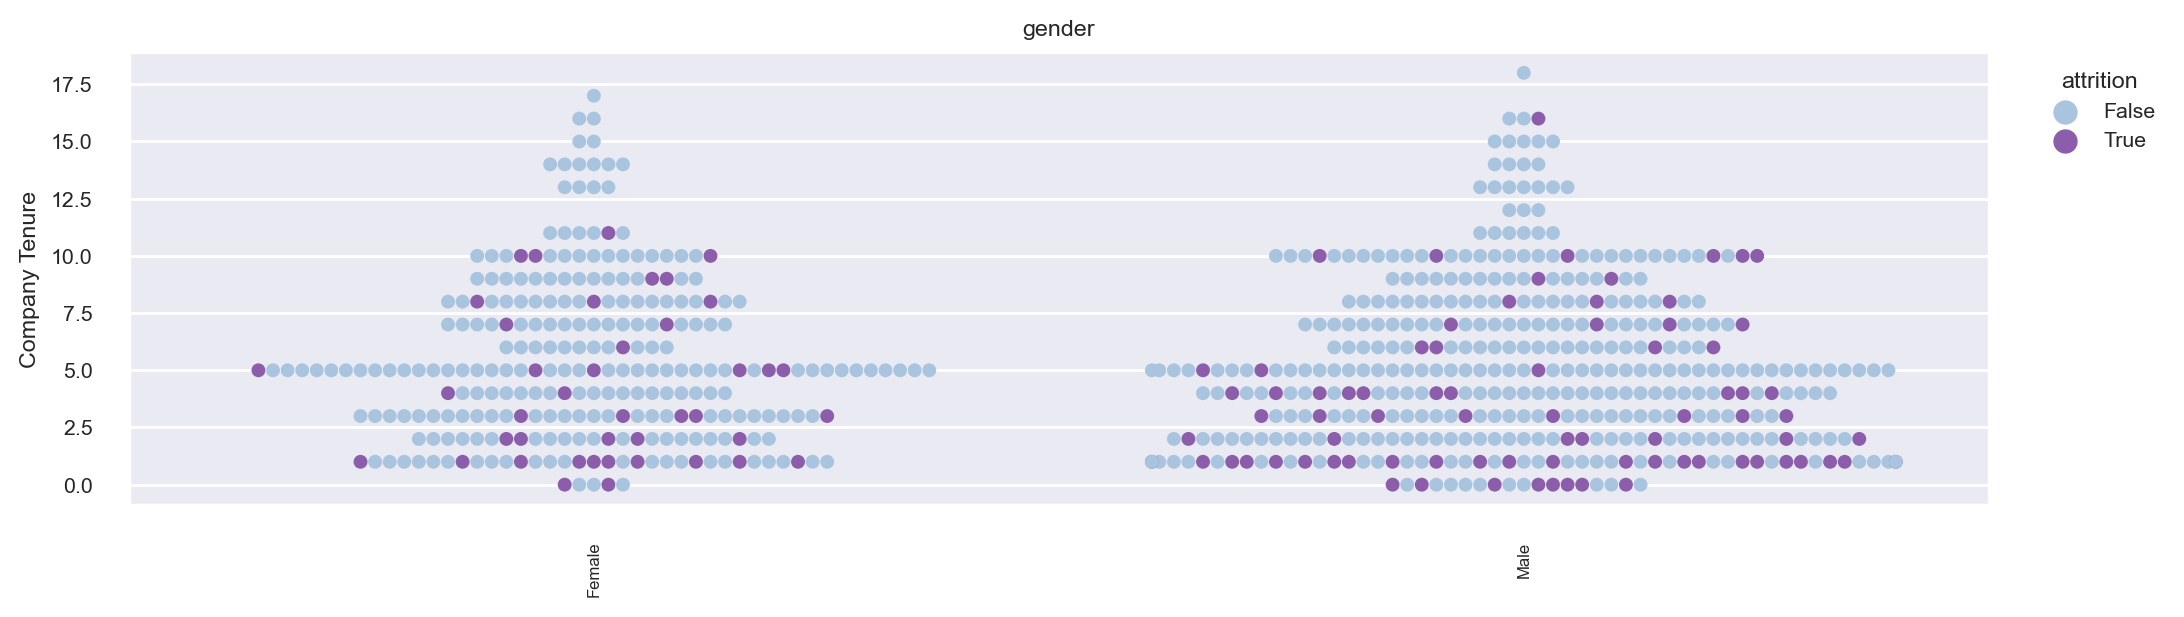

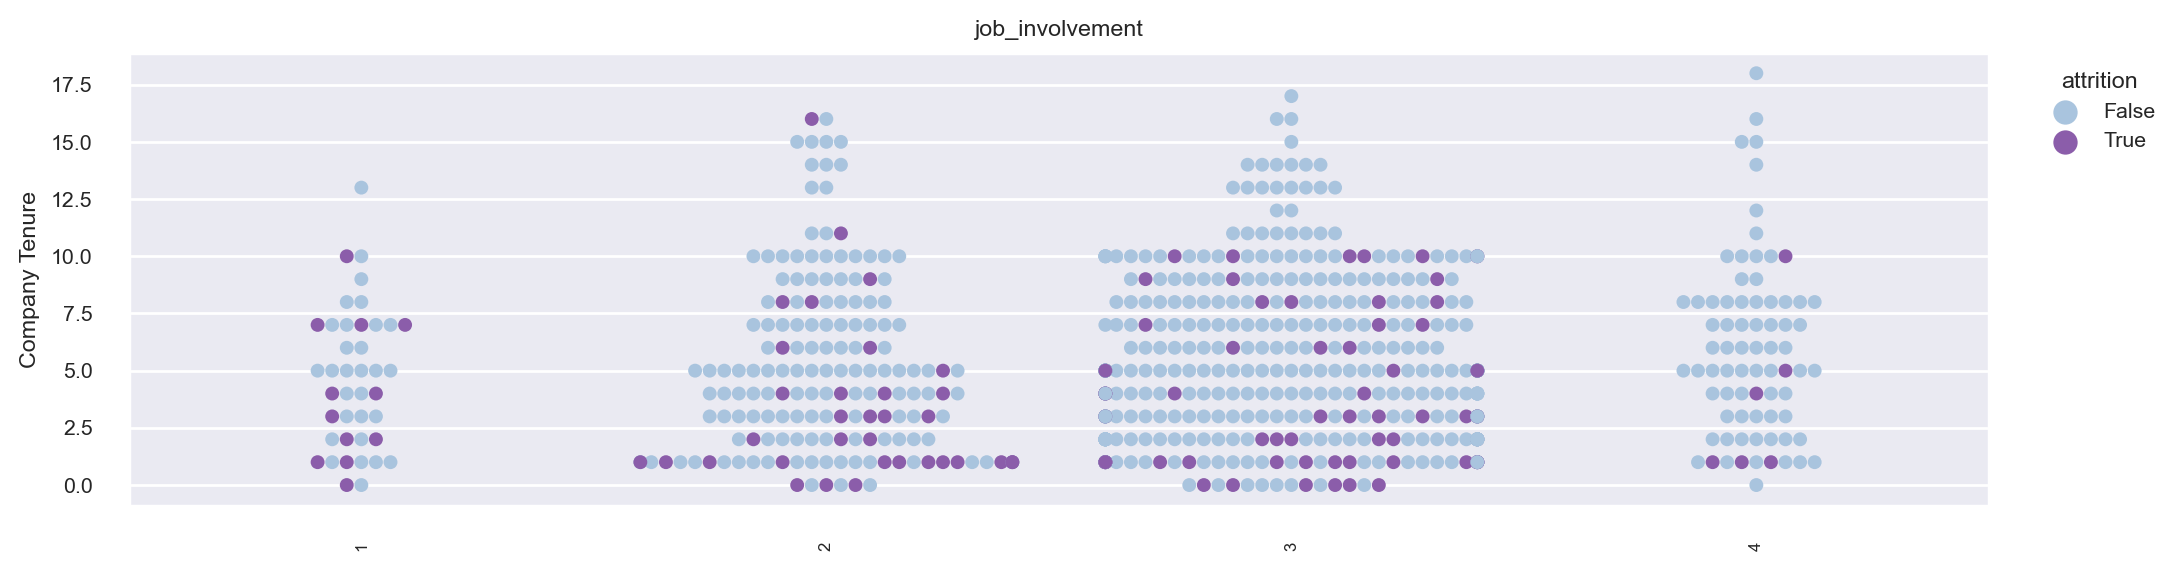

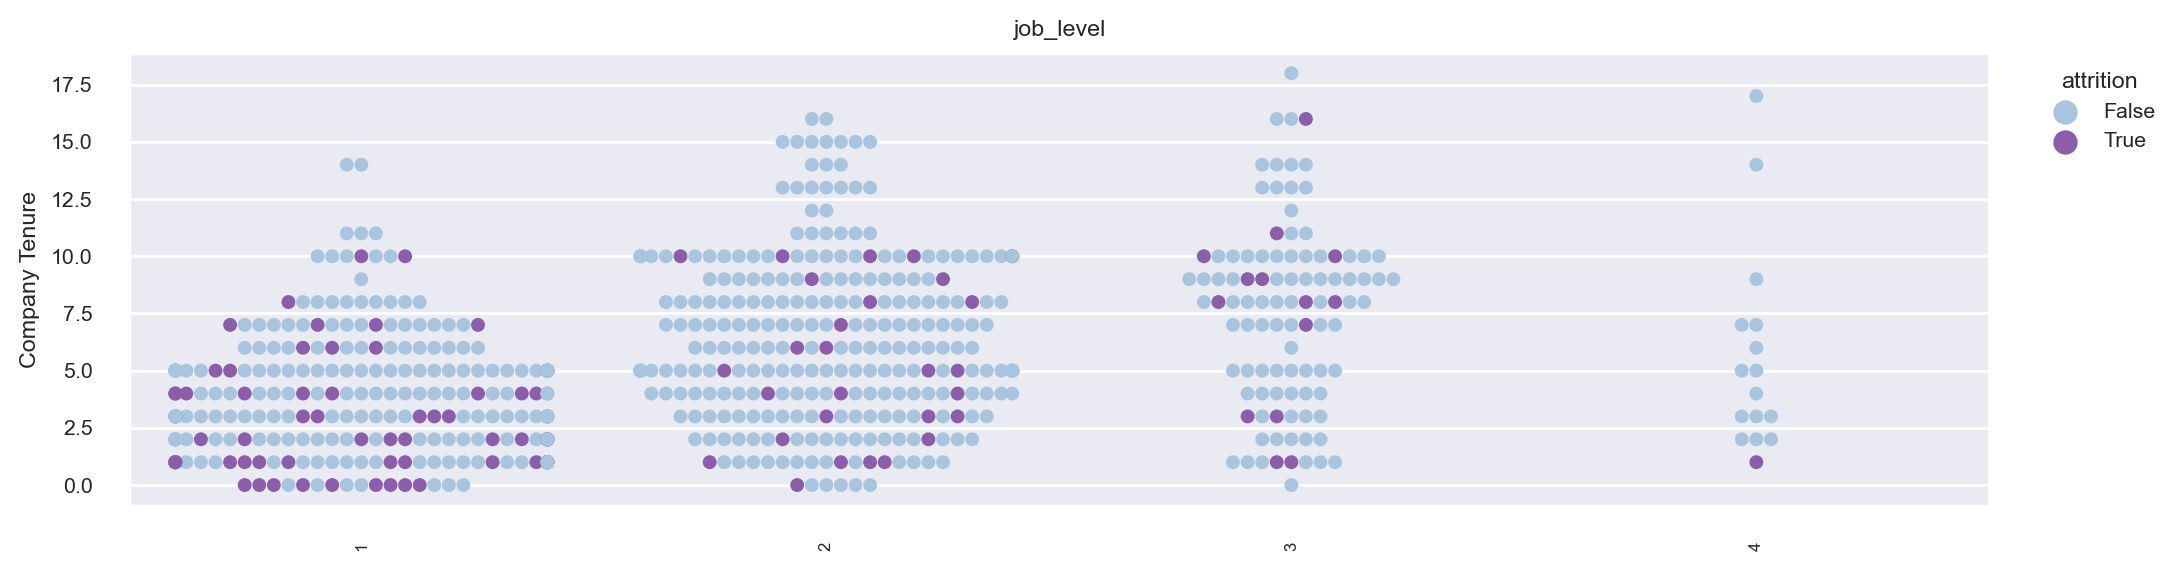

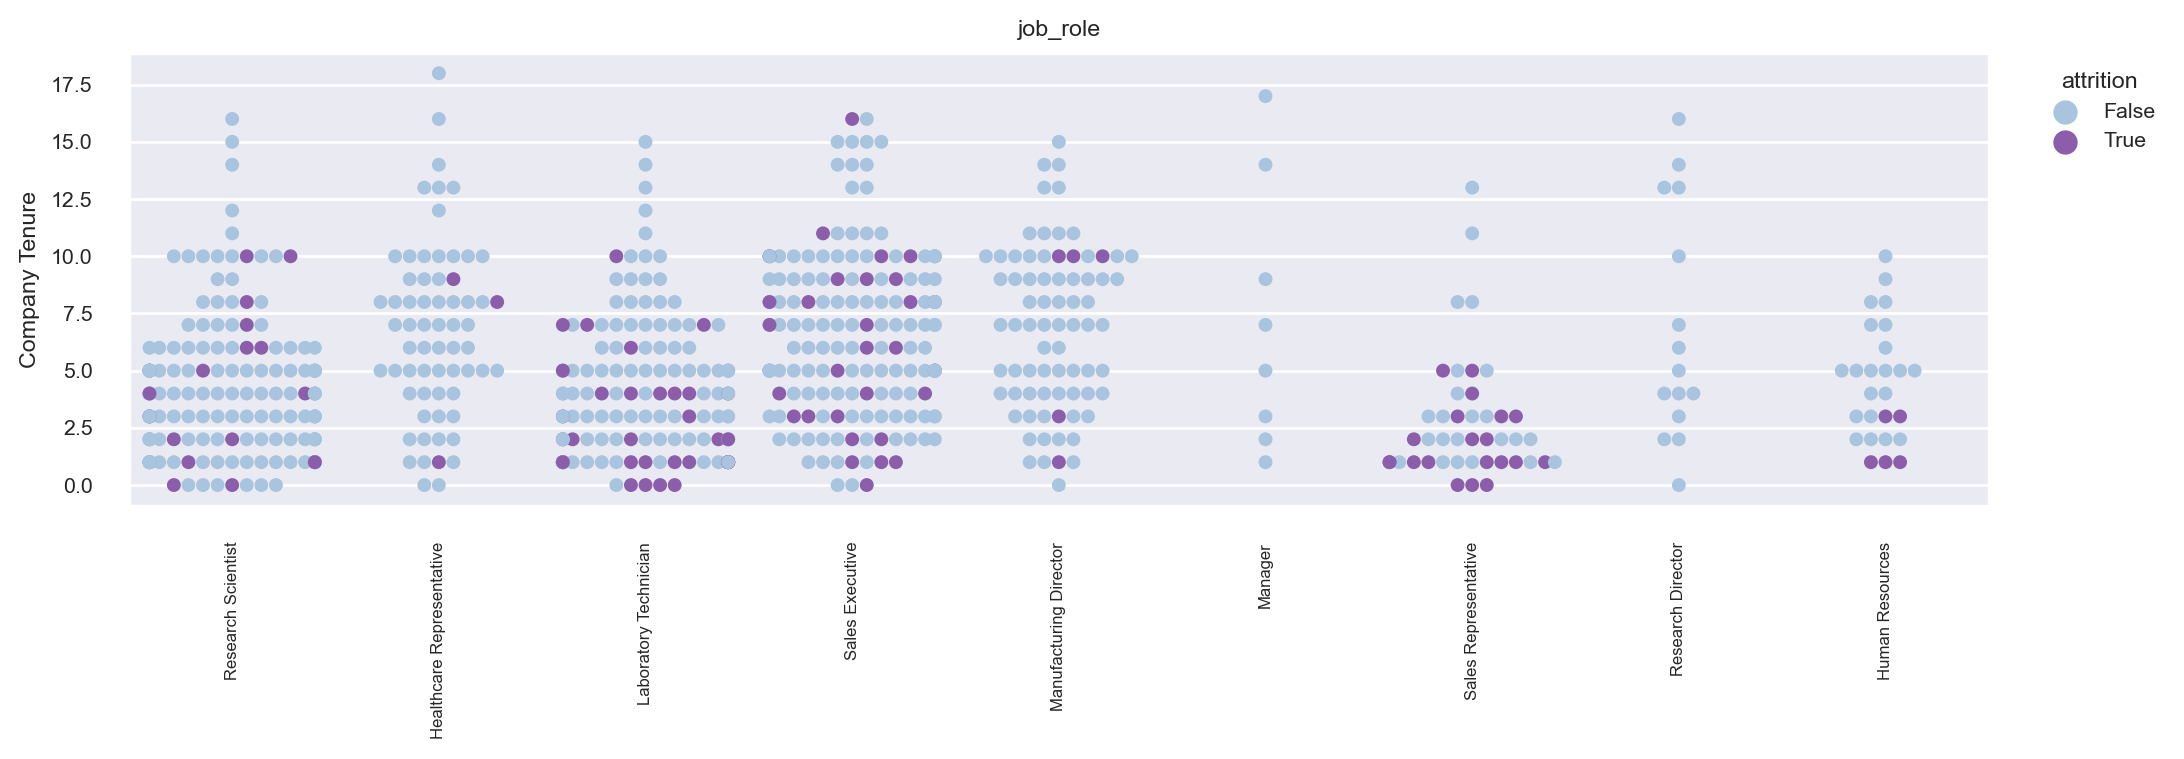

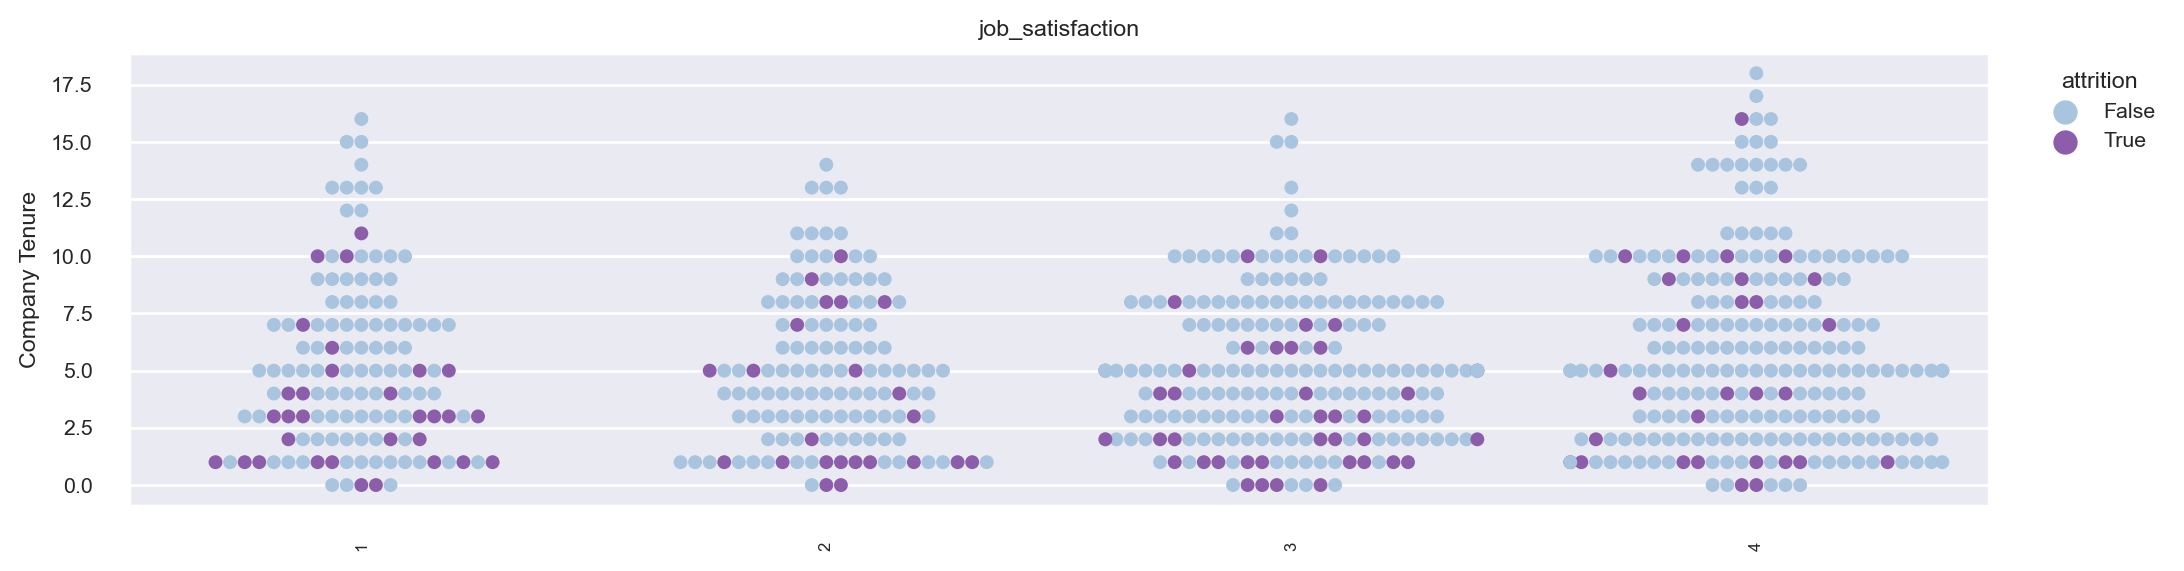

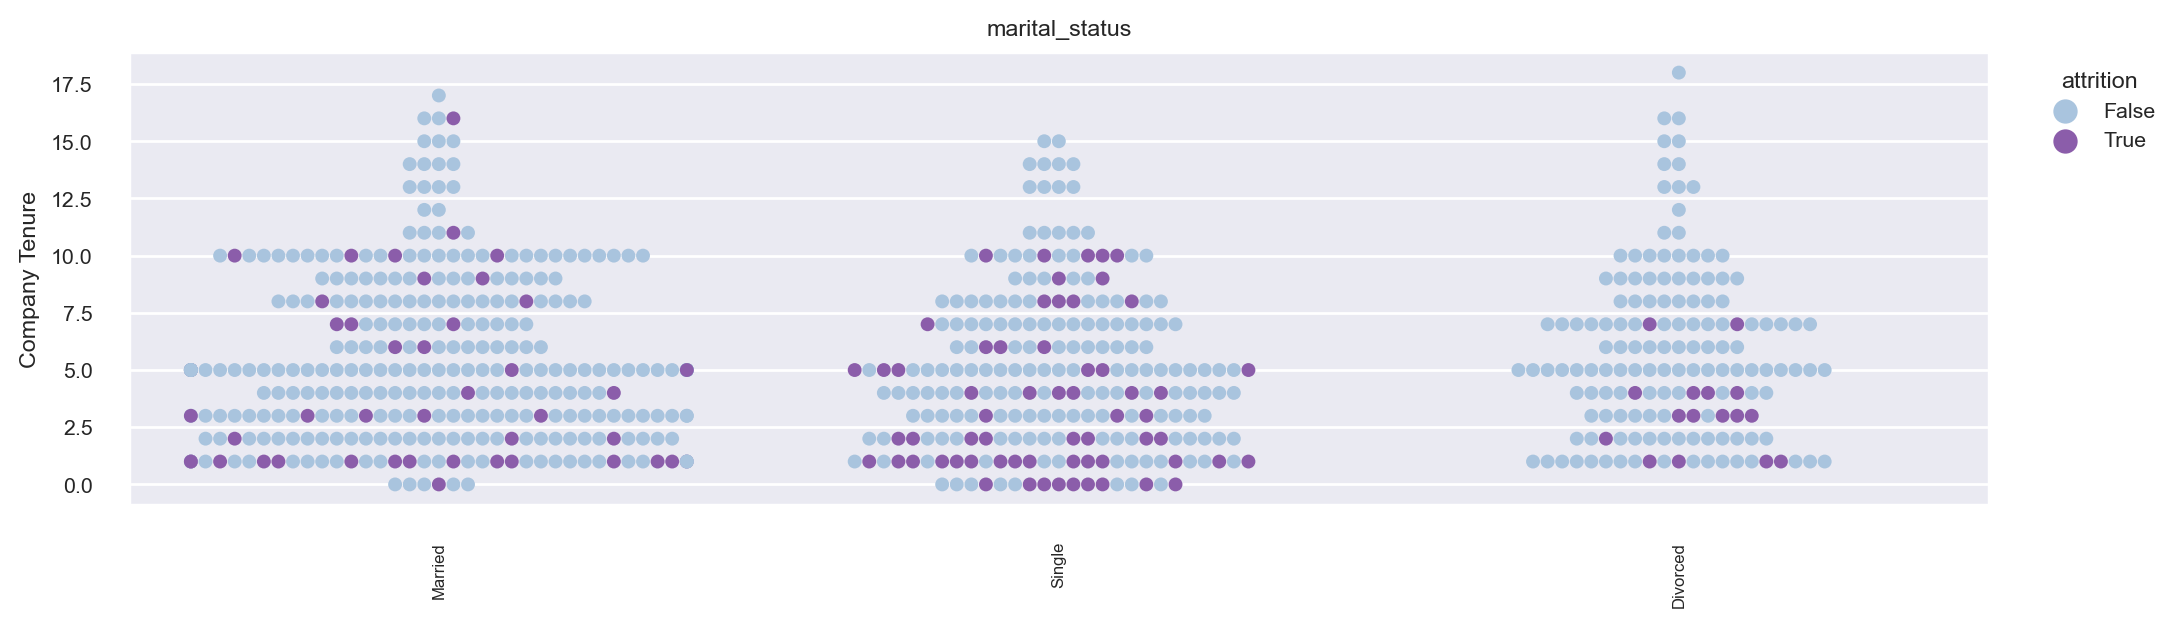

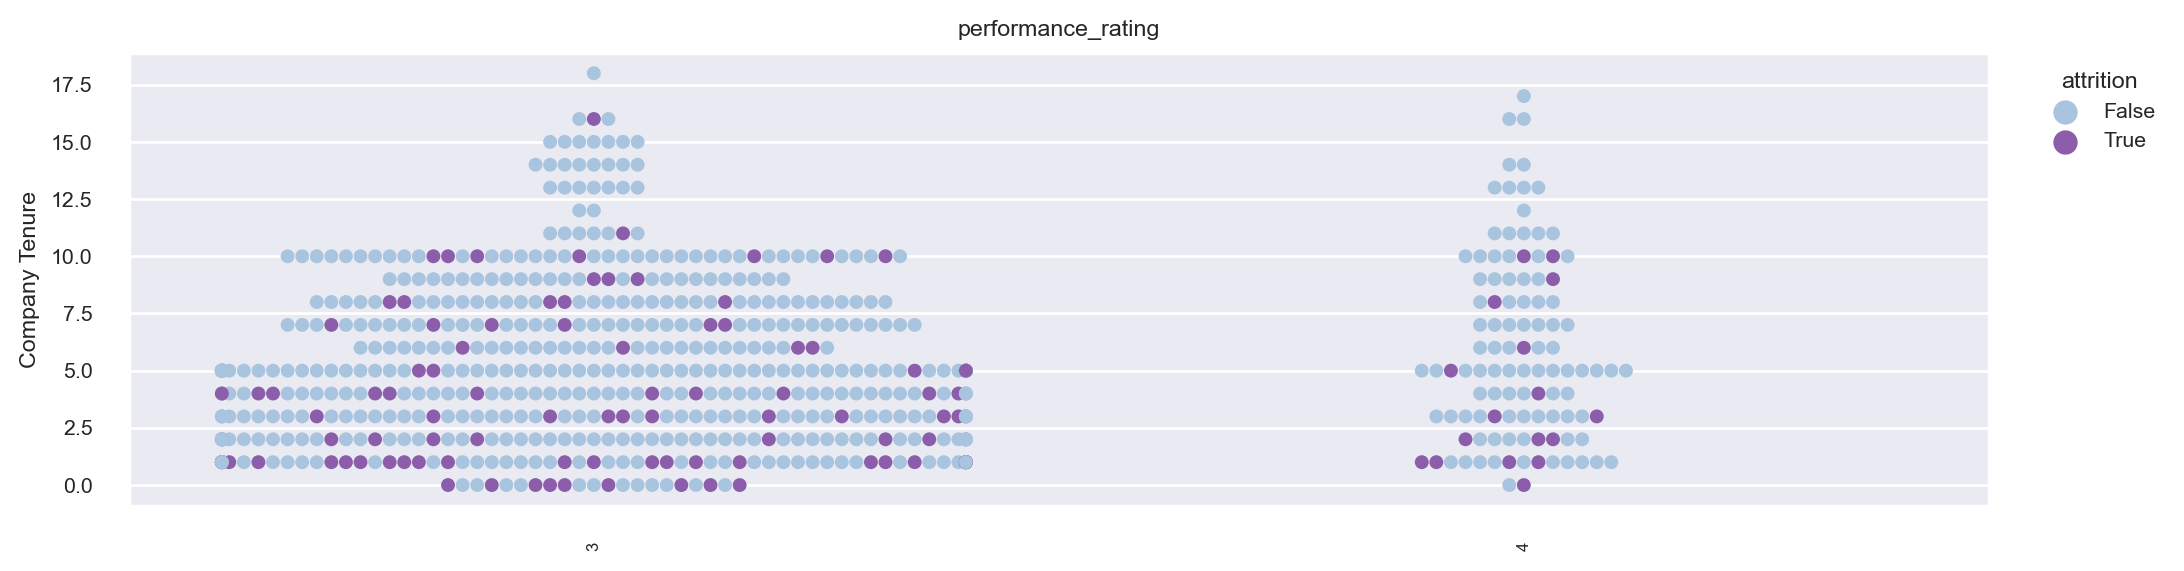

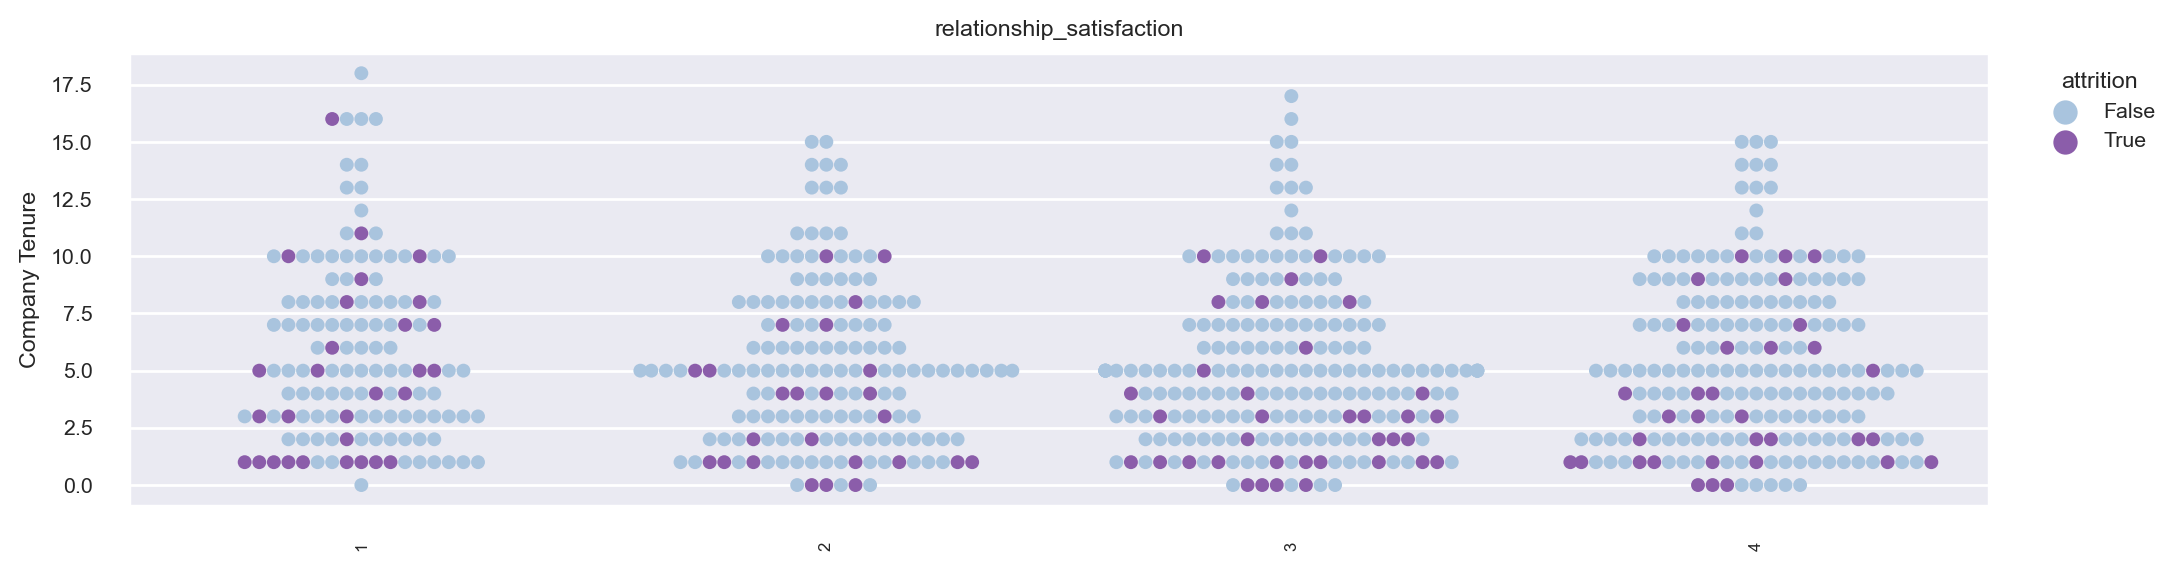

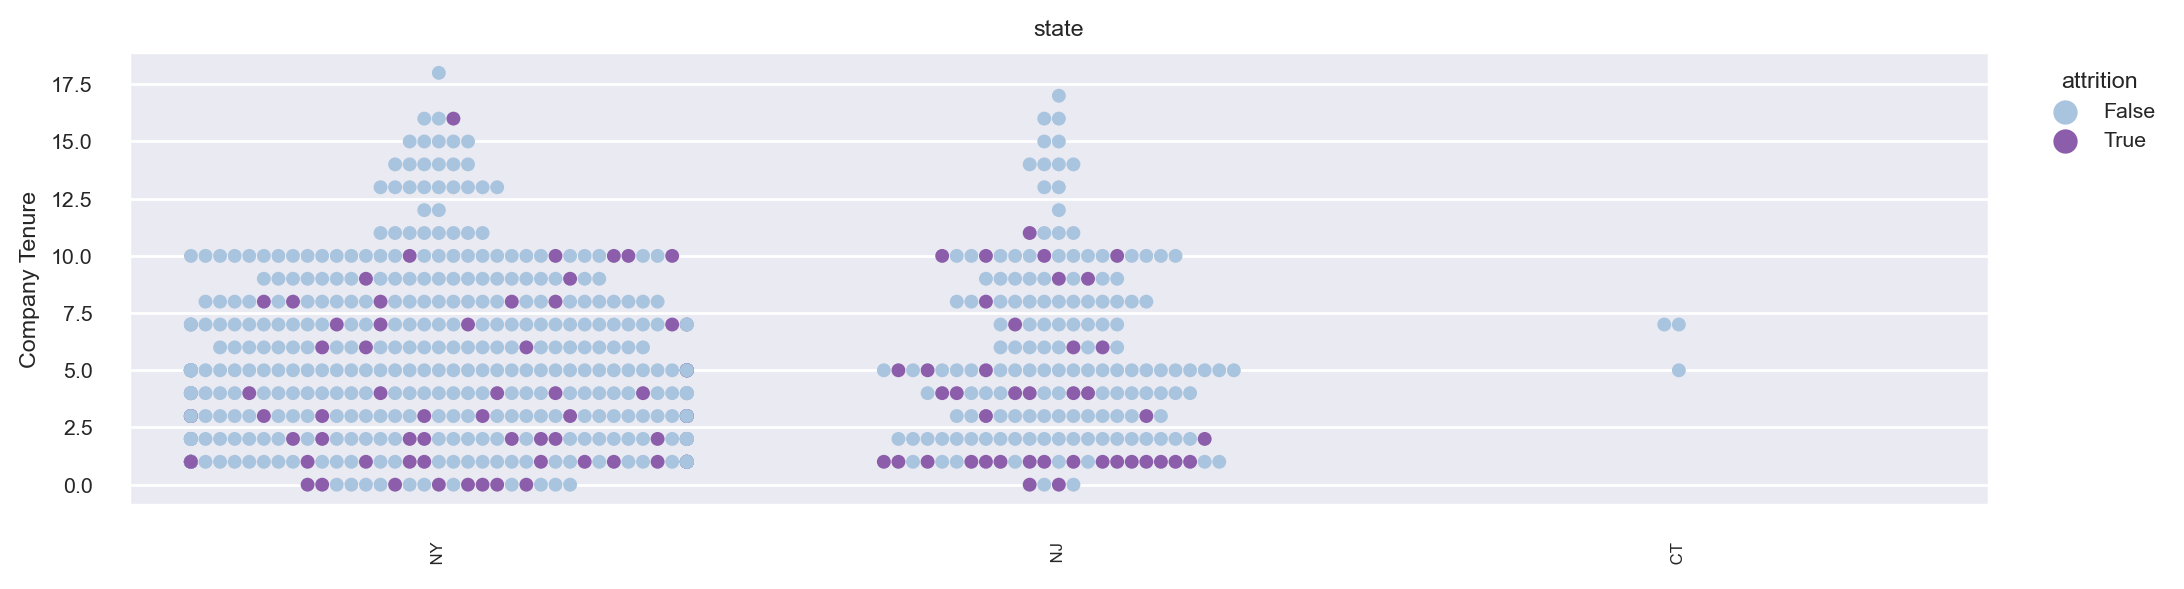

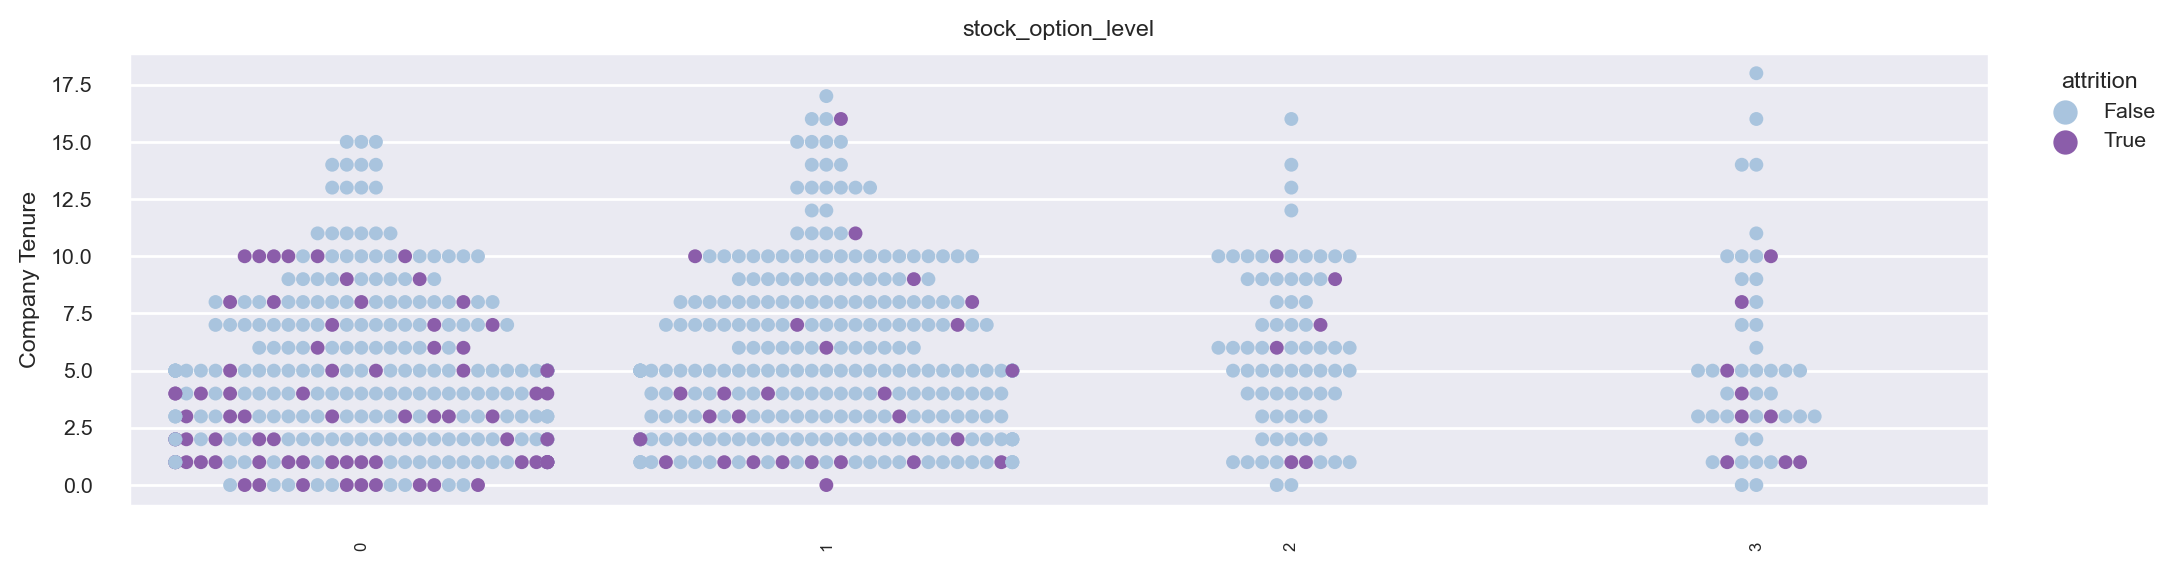

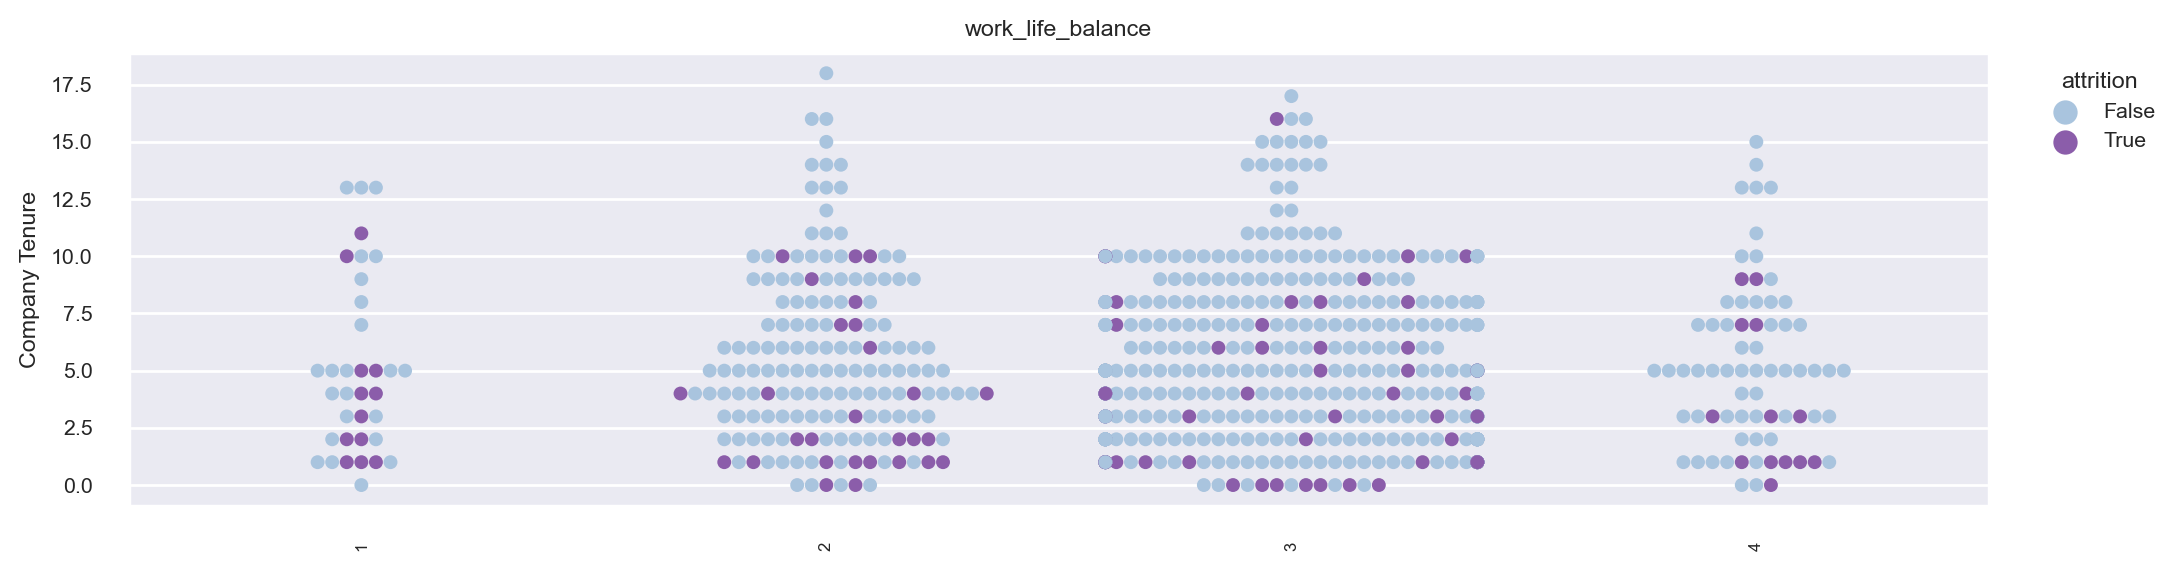

In [47]:
# sns.swarmplot

for col in disc_lst:
    plt.figure(figsize=(12, 3))
    sns.set(font_scale = .7)
    sns.swarmplot(x = col, y = "years_at_company", data = train, hue = "attrition", palette = "BuPu")

    plt.xlabel(None)
    plt.ylabel("Company Tenure")
    plt.xticks(fontsize = 6, rotation = 90)
    plt.title(col)

    plt.legend(
        bbox_to_anchor=(1.1, 1), 
        title = "attrition",
        loc = "upper right")
    plt.show()

In [48]:
# looping through discrete variables and conducting Chi-Squared test on target variable

alpha = 0.05
metrics = []

for col in disc_lst:
    # generating the ChiSquared Test and returning results
    observed = pd.crosstab(index = train[col], columns = train["attrition"], margins = True)

    chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

    if p_value < alpha:
        output = {
            "discrete_feature": col,
            "chi2": chi,
            "degs_of_freedom": degf,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'variable: {col}')
        print('Not statistically significant.')
        print('---------------------------------------')

chi2_results = pd.DataFrame(metrics)
chi2_results.round(5)

variable: county_name
Not statistically significant.
---------------------------------------
variable: department
Not statistically significant.
---------------------------------------
variable: education
Not statistically significant.
---------------------------------------
variable: education_field
Not statistically significant.
---------------------------------------
variable: environment_satisfaction
Not statistically significant.
---------------------------------------
variable: gender
Not statistically significant.
---------------------------------------
variable: job_involvement
Not statistically significant.
---------------------------------------
variable: job_satisfaction
Not statistically significant.
---------------------------------------
variable: performance_rating
Not statistically significant.
---------------------------------------
variable: relationship_satisfaction
Not statistically significant.
---------------------------------------
variable: state
Not statistical

discrete_feature  chi2  degs_of_freedom  p_value
0           job_level 28.40                8     0.00
1            job_role 50.72               18     0.00
2      marital_status 21.84                6     0.00
3  stock_option_level 31.94                8     0.00

----

**``Chi_Squared results summary:``**

After initial discrete/categorical hypotheses testing against the "attrition" target variable - we can conclude that the following features/variables hold a statistical relationship with the target:

- job level
- job role
- marital status
- stop option level

<u>questions/thoughts after analysis:</u>

features such as job level and job role on its surface may not appear to be similar, however I presume that there may be some relationship amongst "titles"/"roles" and the level. For instance, certain job levels may only be applicable to a particular role such as a Director or Senior Vice President. 

I observe that there are only 4 distinct job levels and 9 distinct job roles at this company. On a second comb through of the data, I will want to conduct summary statistics and statistical testing across these features to investigate if there is any relationship amongst the independent variables.


----

#### **``Feature Selection & Scaling``**

In [49]:
# selecting statistically significant variables/features from testing

X_train = X_train[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_validate = X_validate[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_test = X_test[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_train.shape

(688, 16)

----
**``Standard Scaler``**

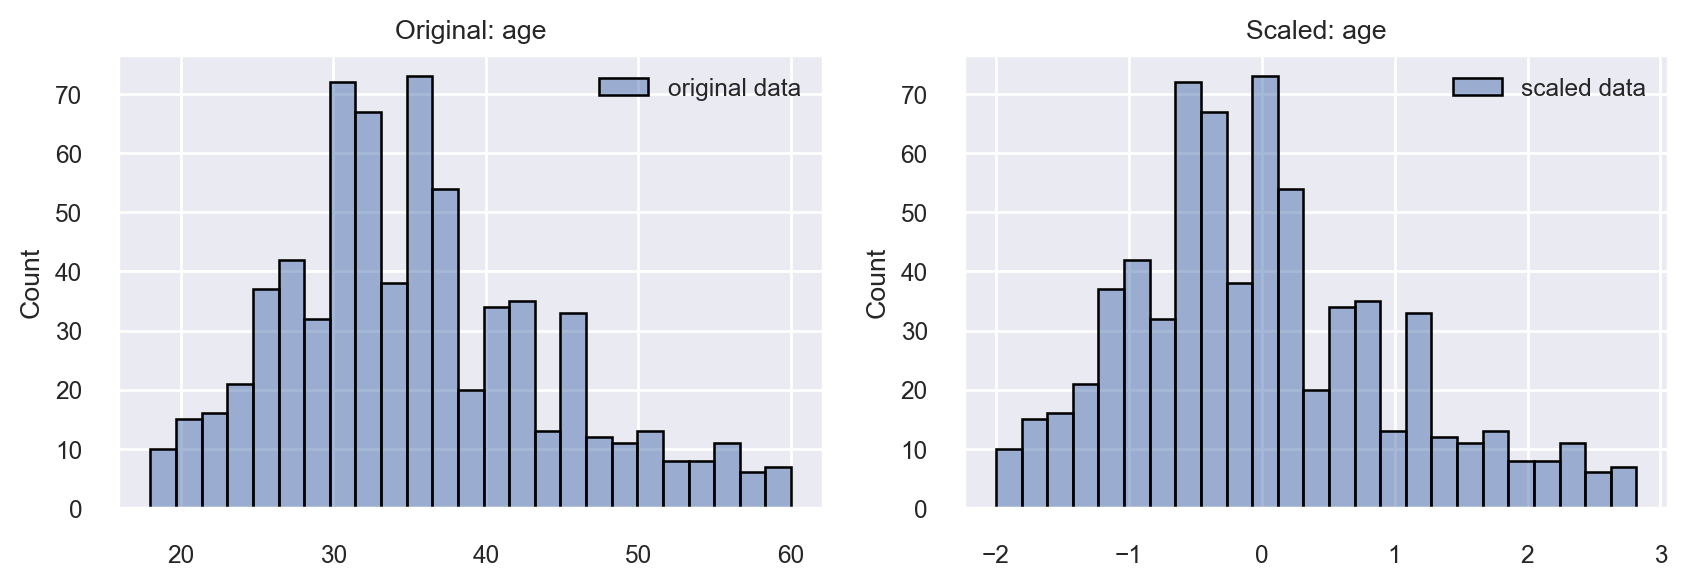

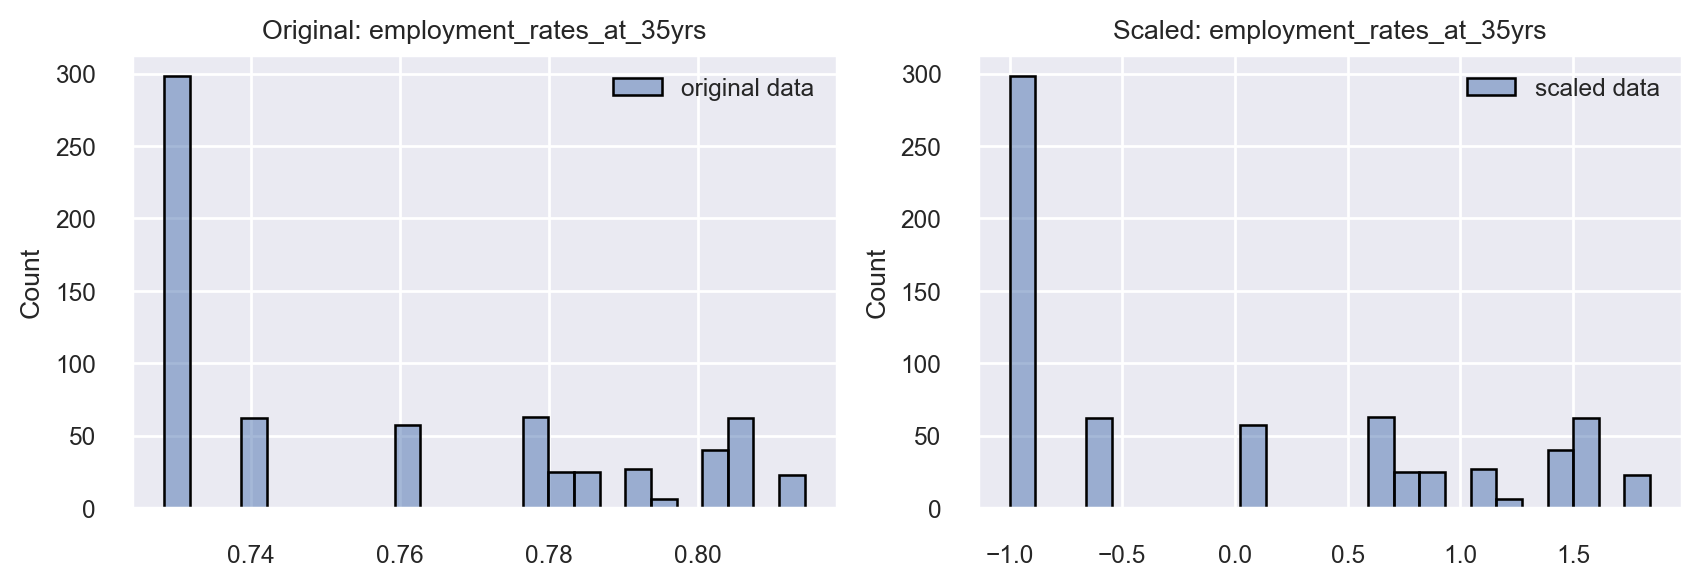

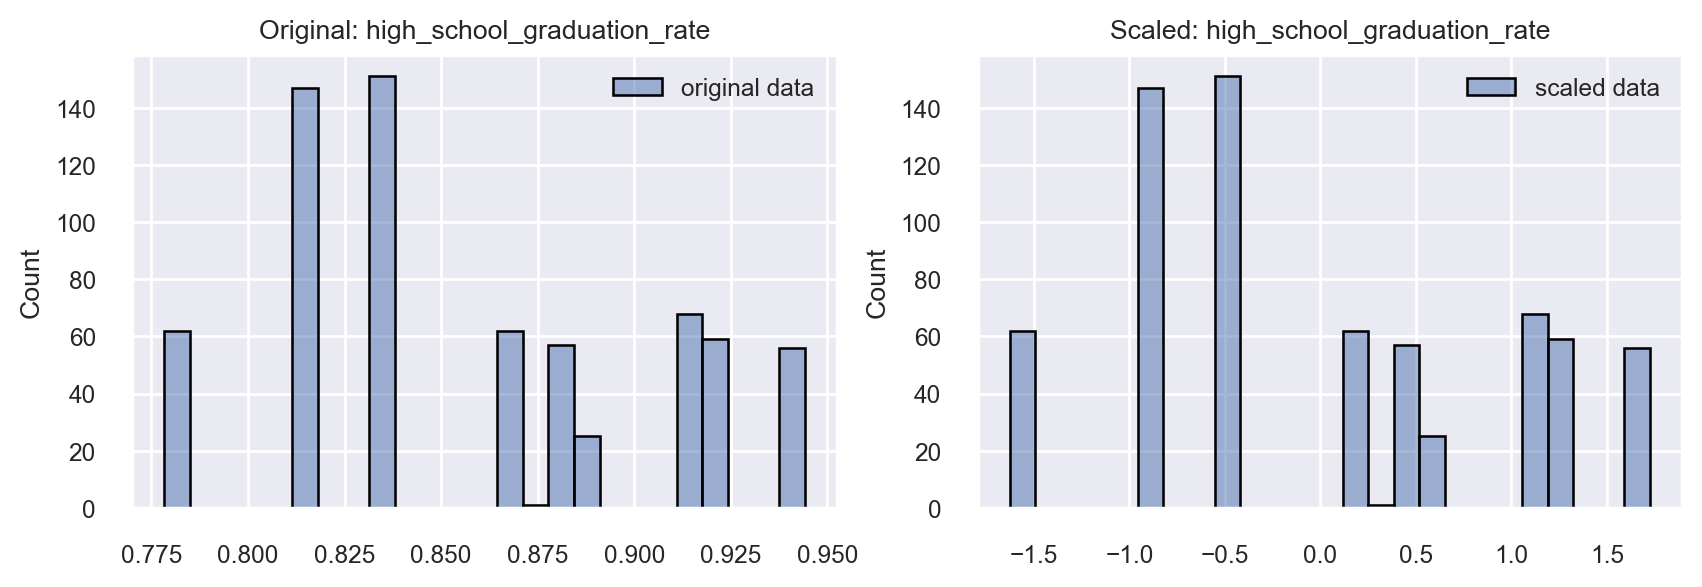

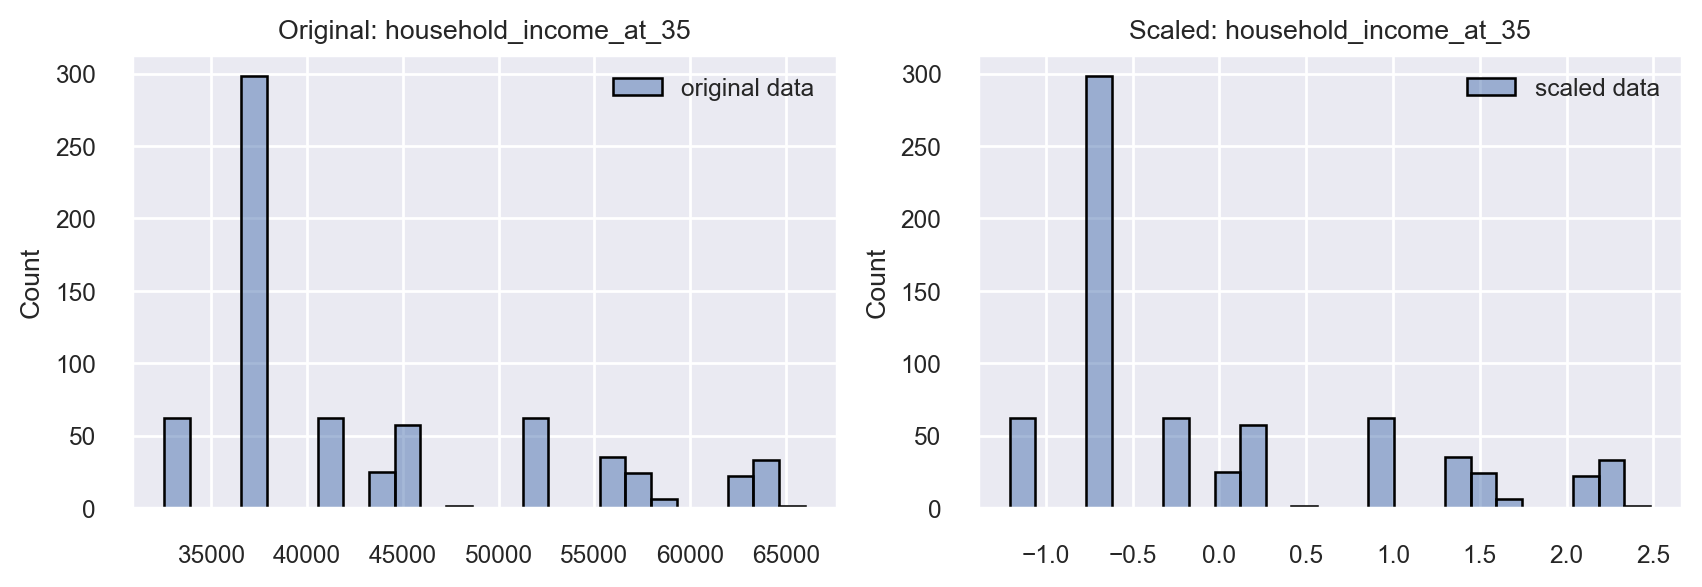

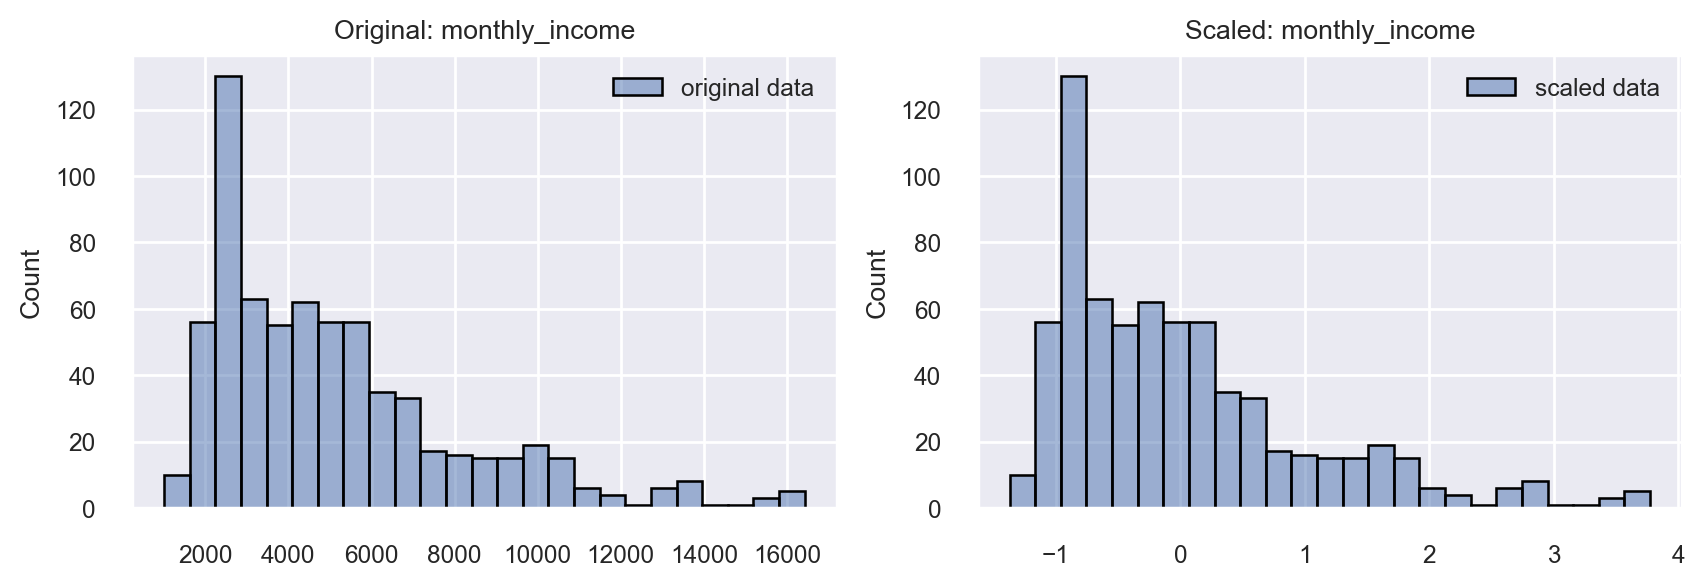

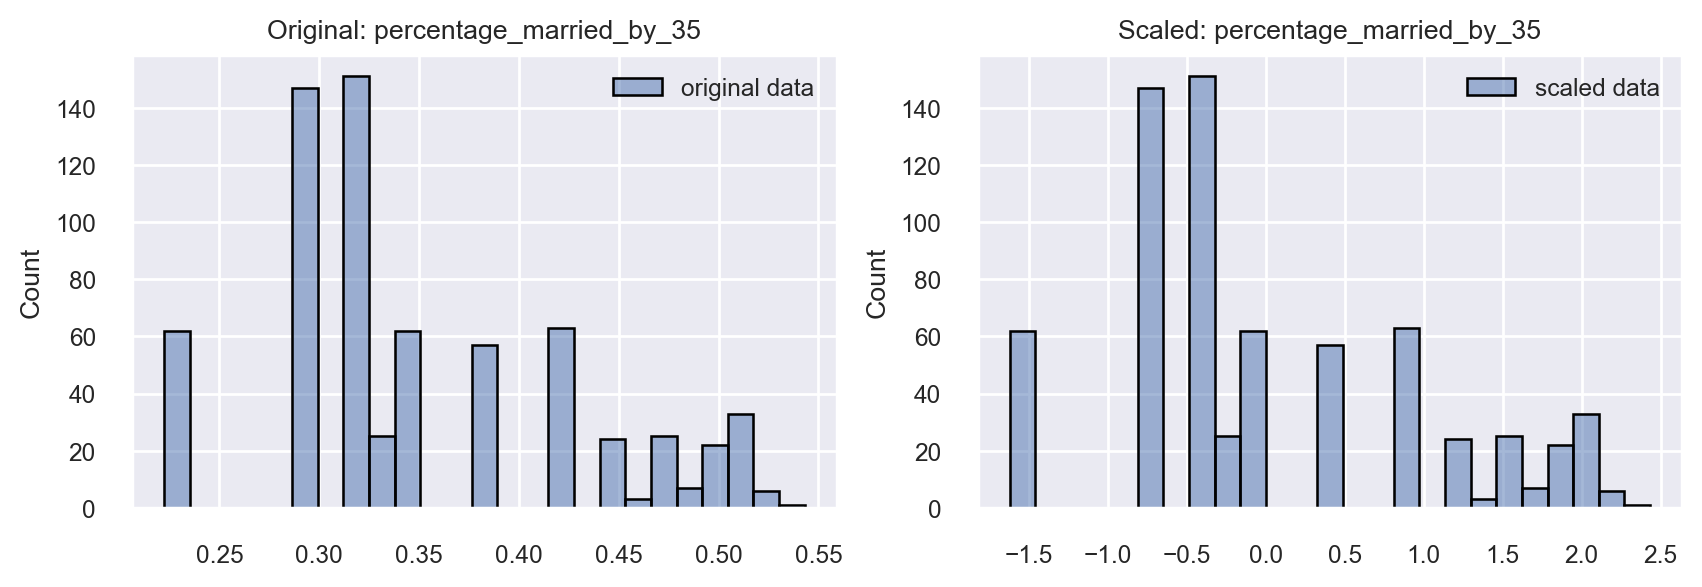

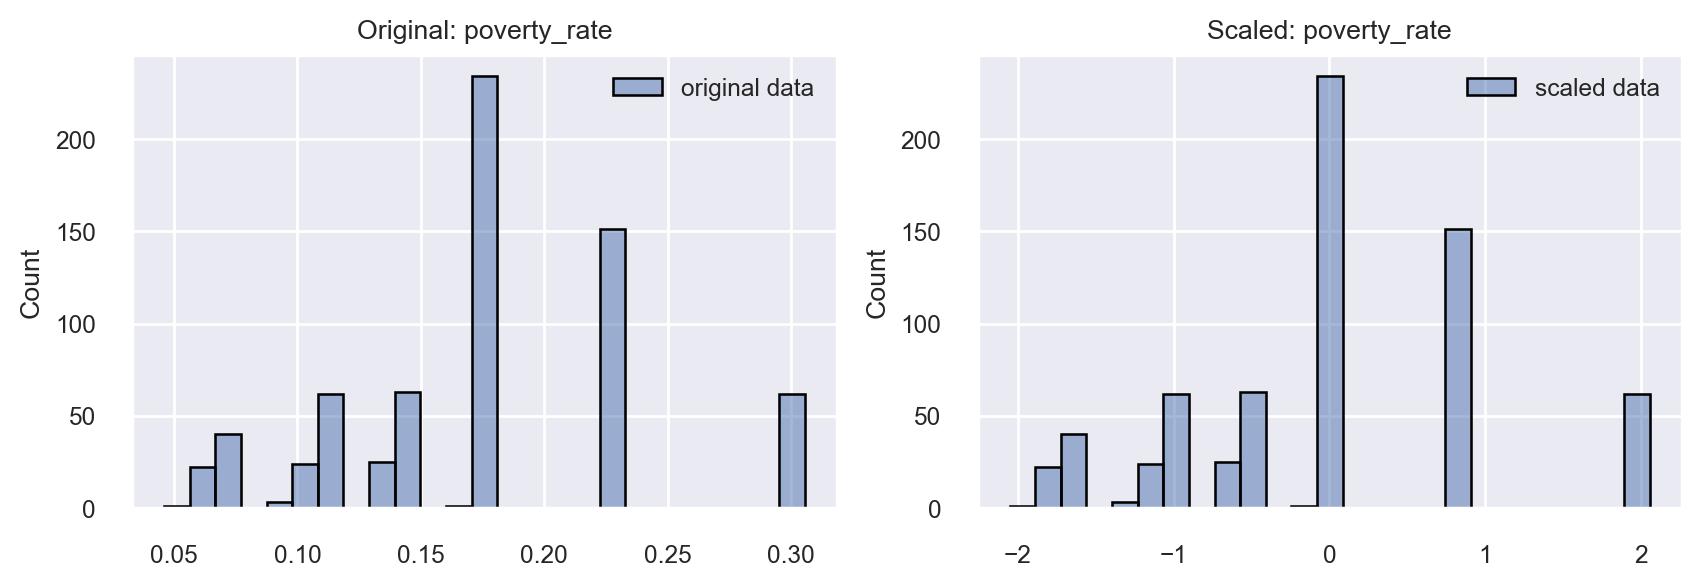

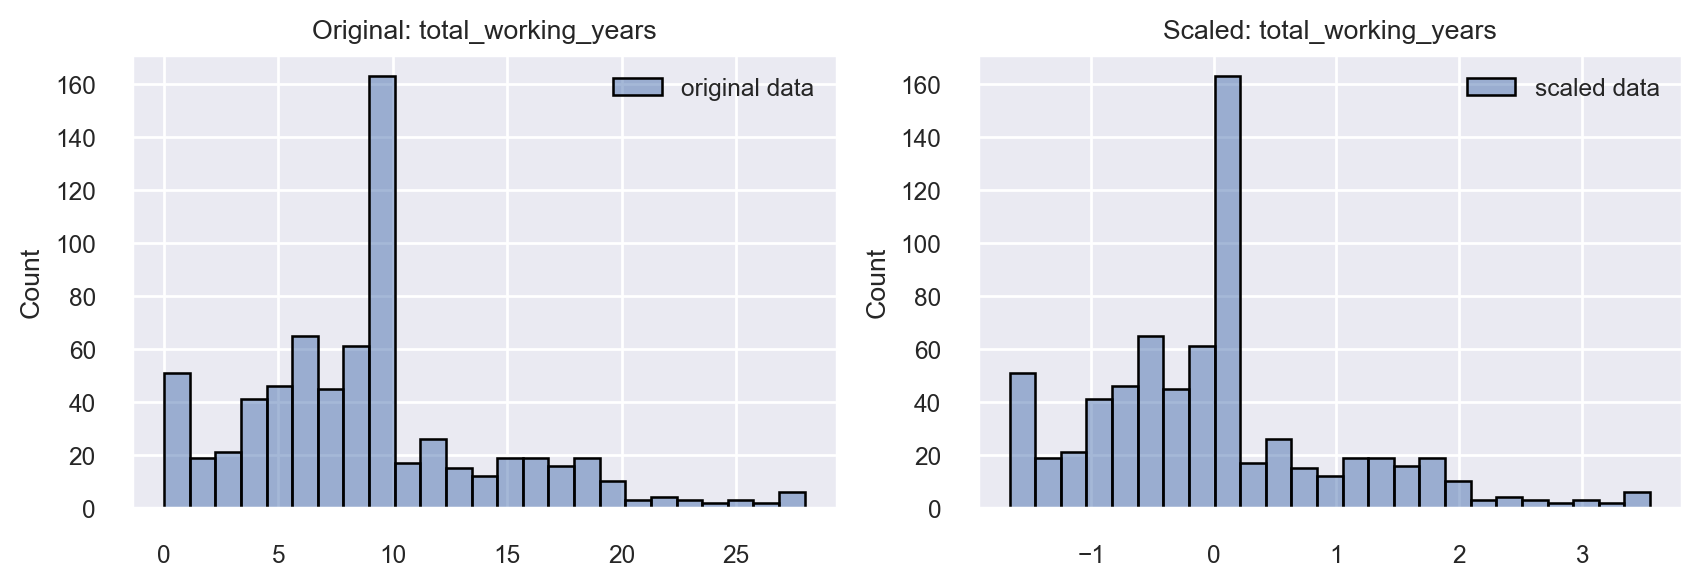

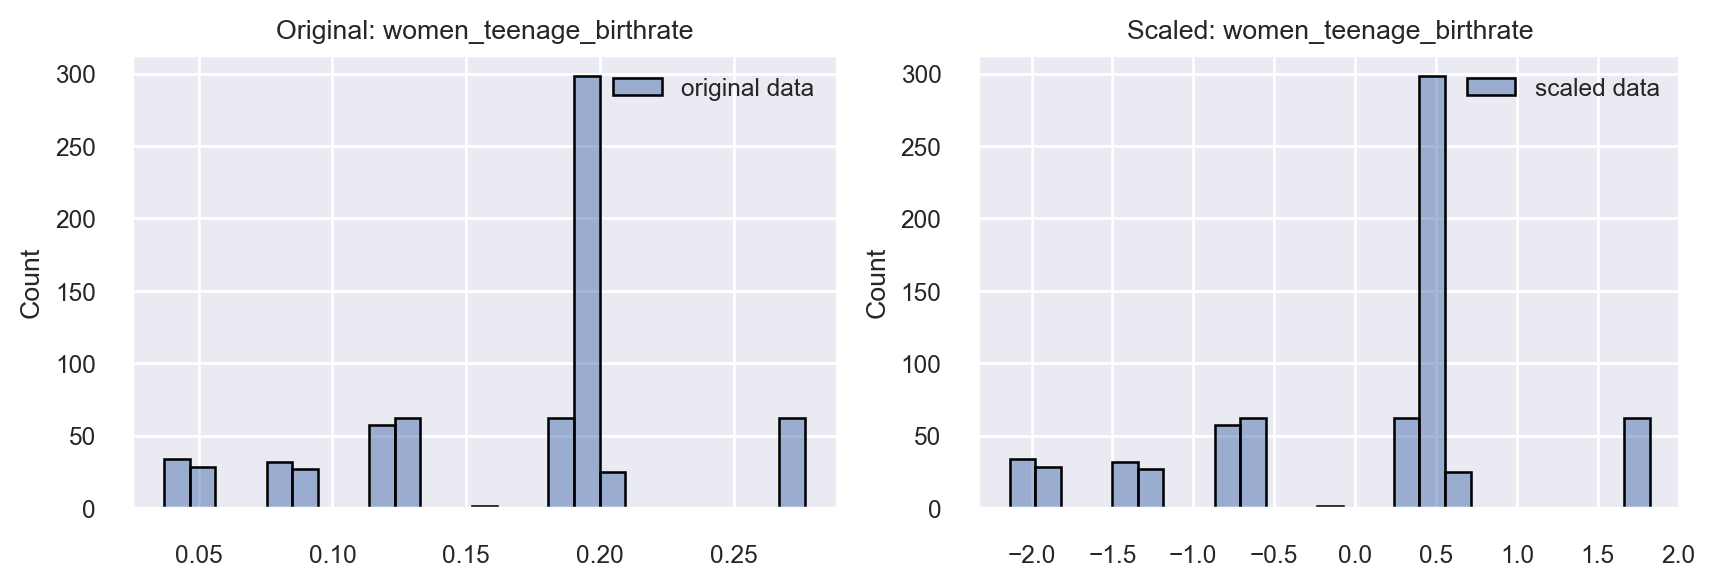

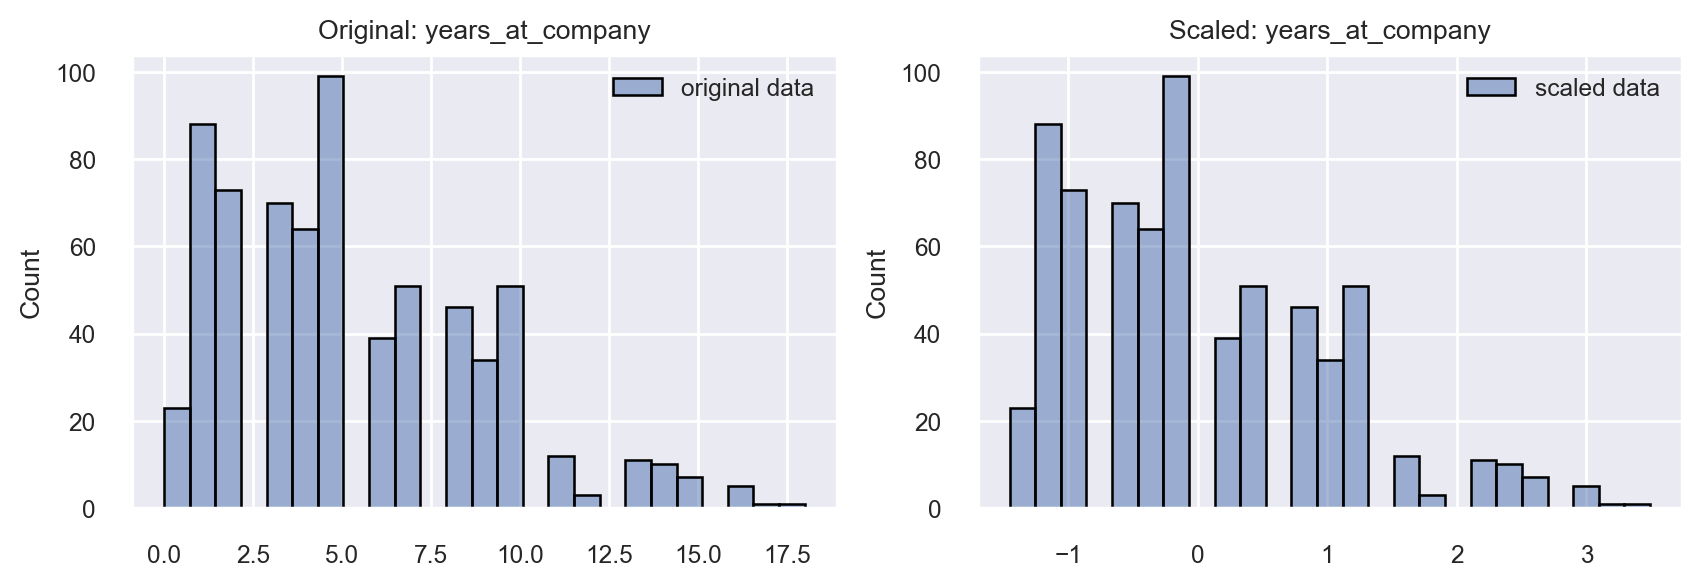

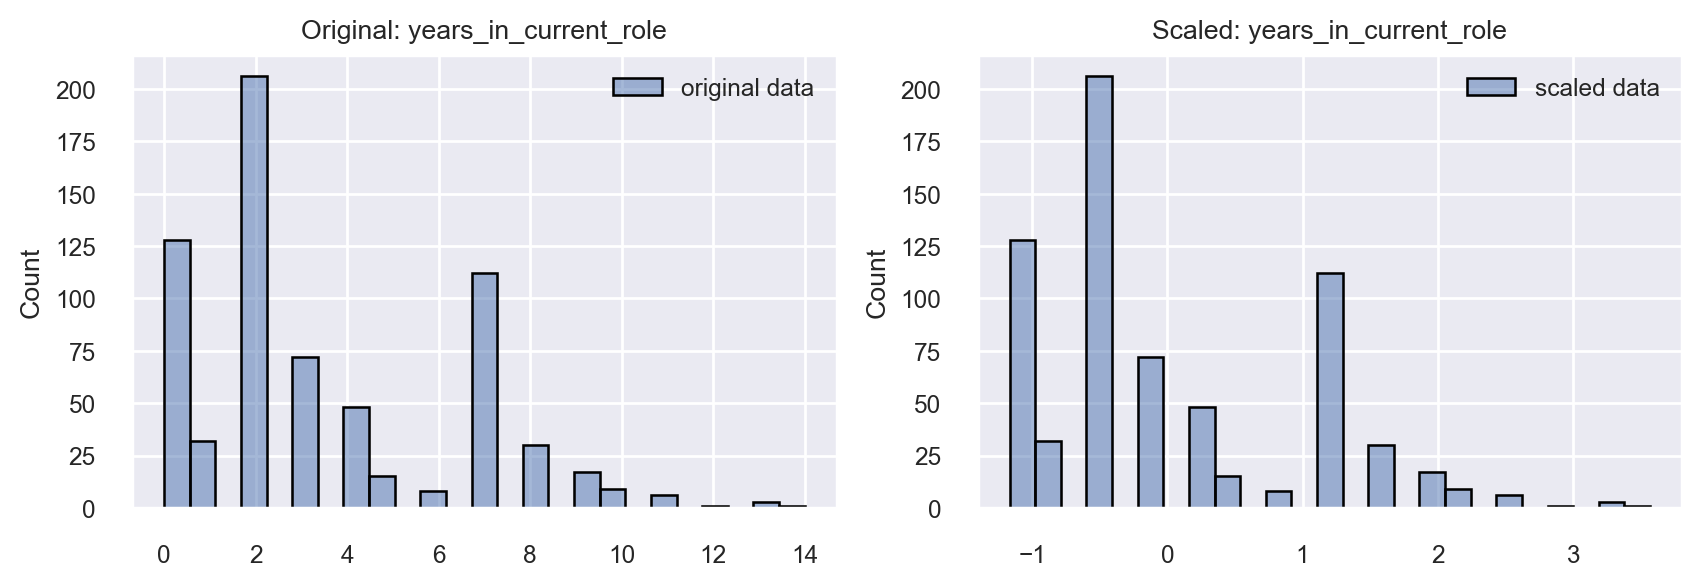

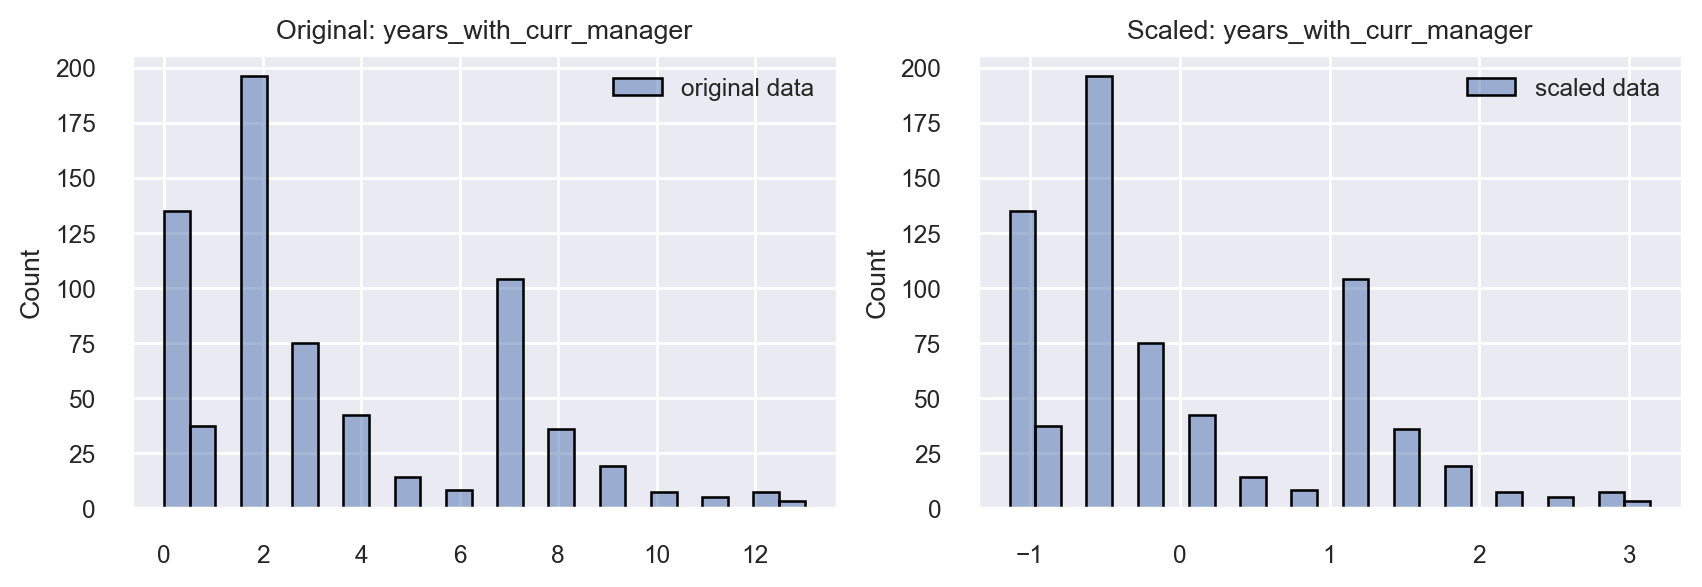

In [50]:
# since outliers were handled in data preparation, i will fit and evaluate a standard scaler and a min/max scaler

cont_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()

for col in cont_lst:
    plt.figure(figsize=(10, 3))
    sns.set(font_scale = .8)

    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    x_scaled = scaler.transform(X_train[[col]])


    plt.subplot(121)
    ax1 = sns.histplot(X_train[[col]], bins = 25, edgecolor = 'black', label = 'original data')

    # removing axes scientific notation 
    ax1.ticklabel_format(style = "plain") 
    plt.title(f'Original: {col}')
    plt.legend()

    plt.subplot(122)
    ax2 = sns.histplot(x_scaled, bins=25, edgecolor = 'black', label = "scaled data")

    # removing axes scientific notation 
    ax2.ticklabel_format(style = "plain") 
    plt.title(f'Scaled: {col}')
    plt.legend()

----
**``Min-Max Scaler``**

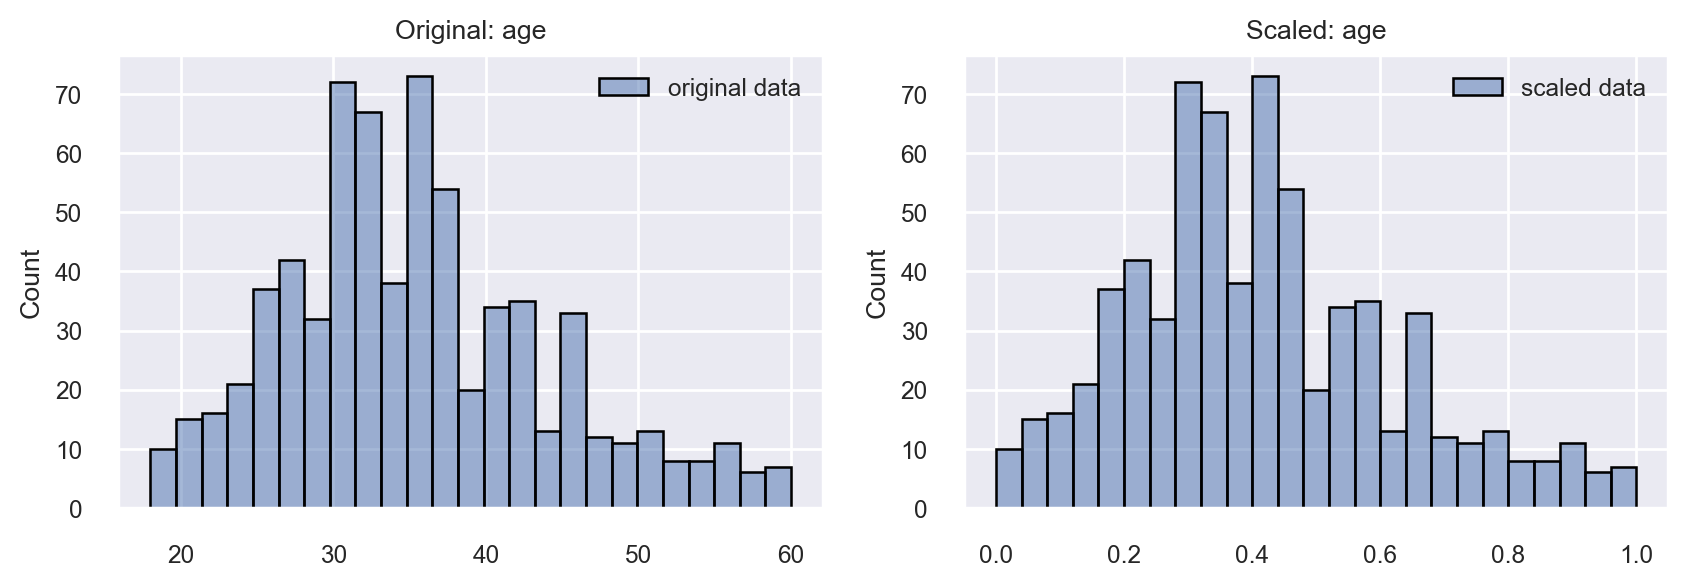

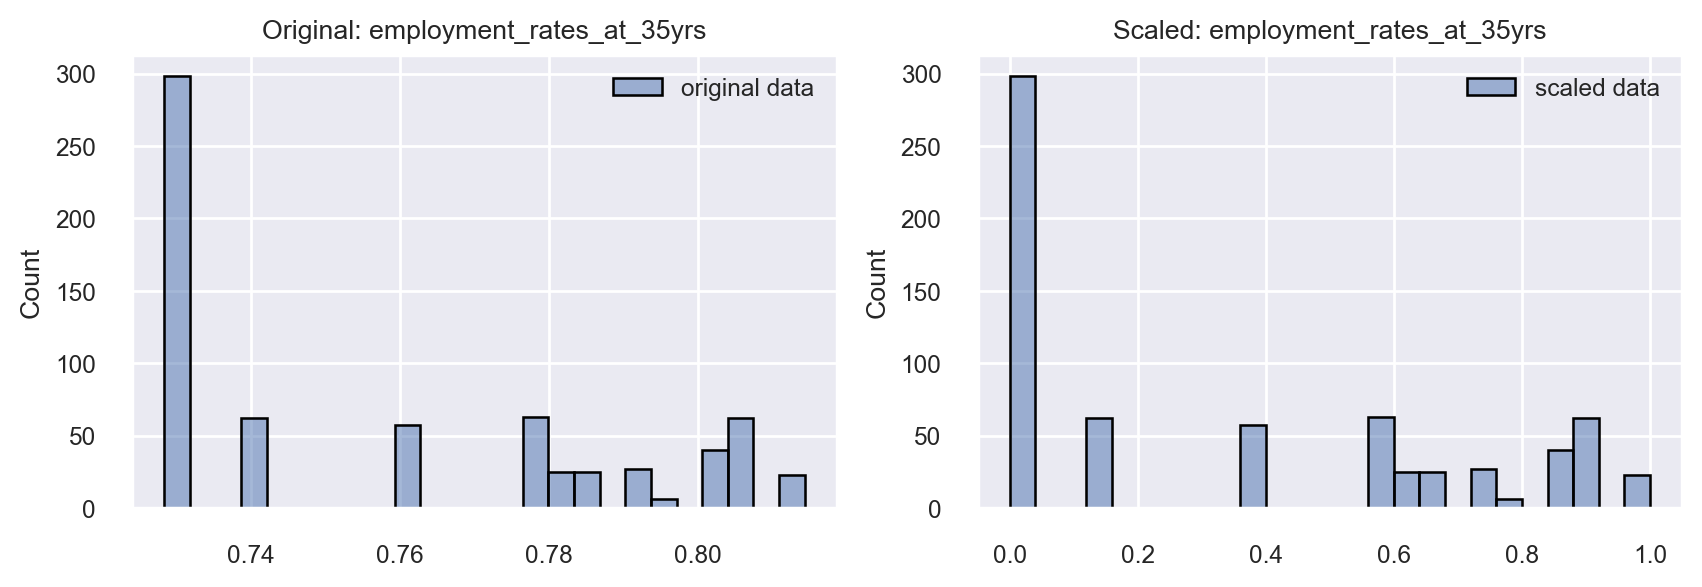

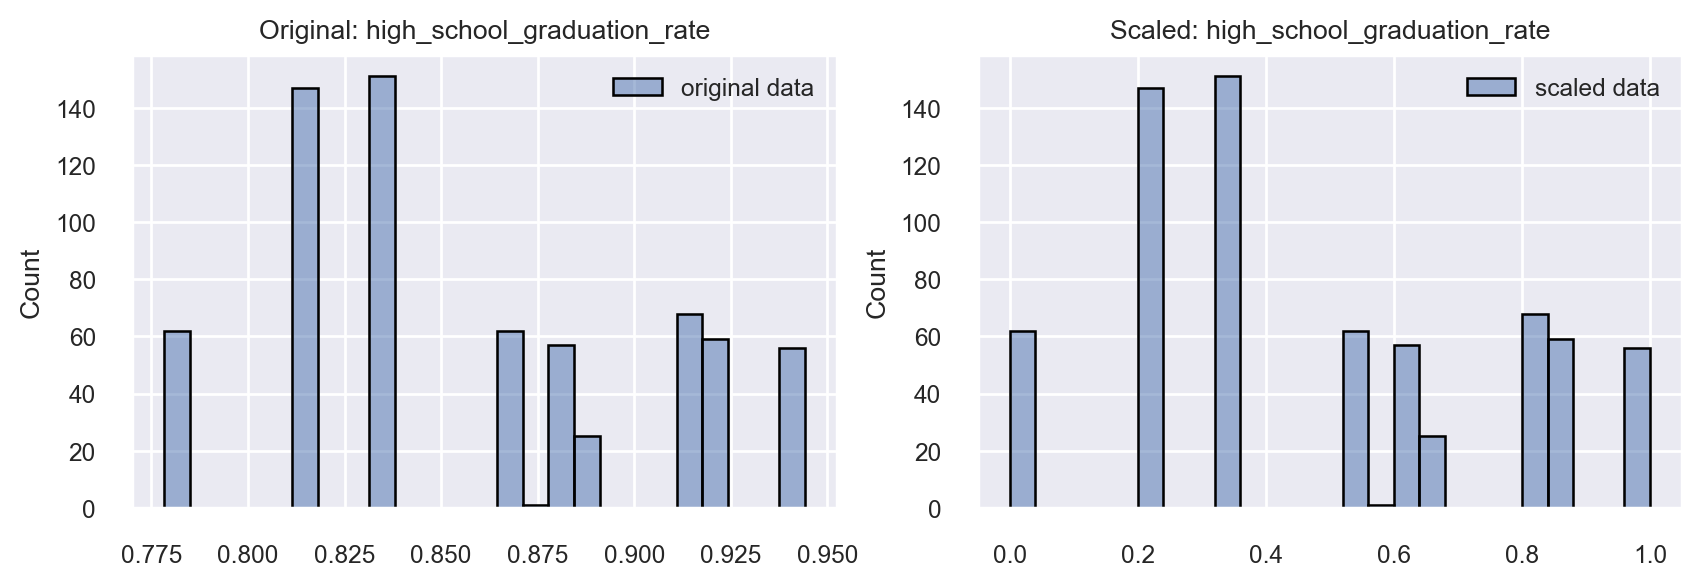

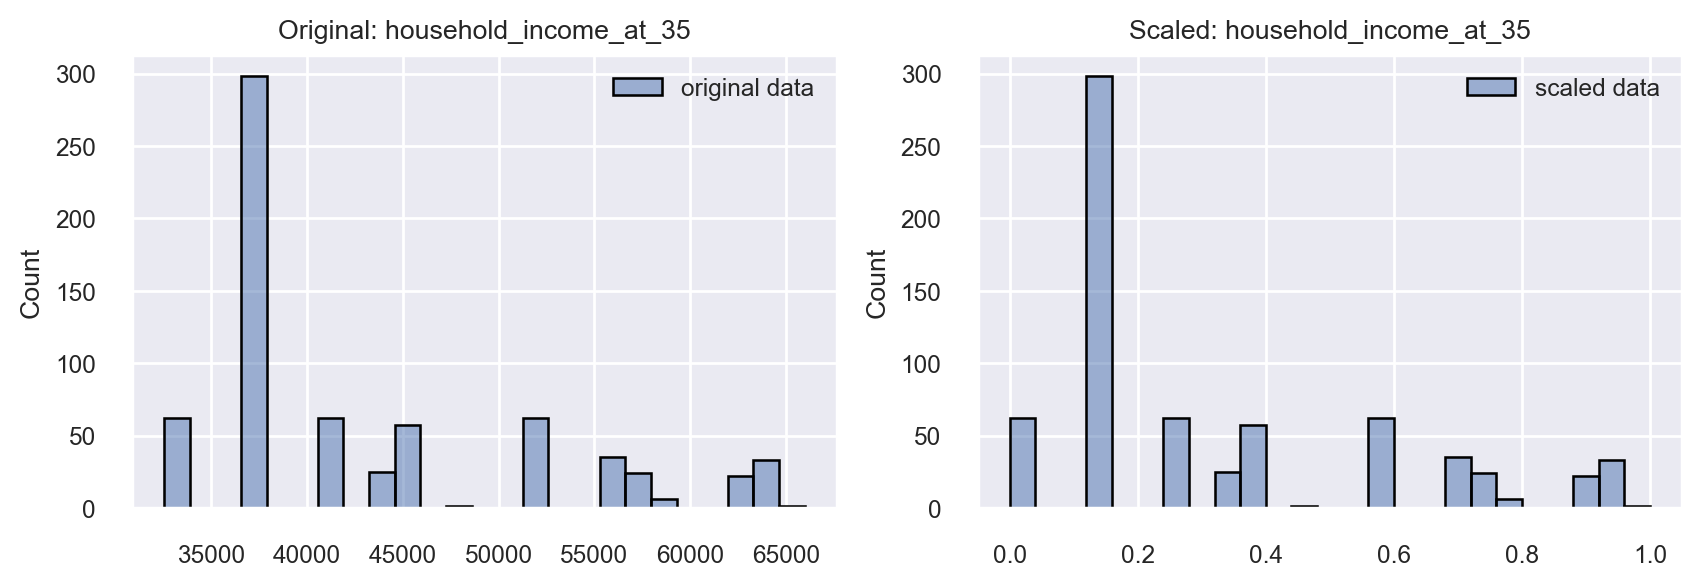

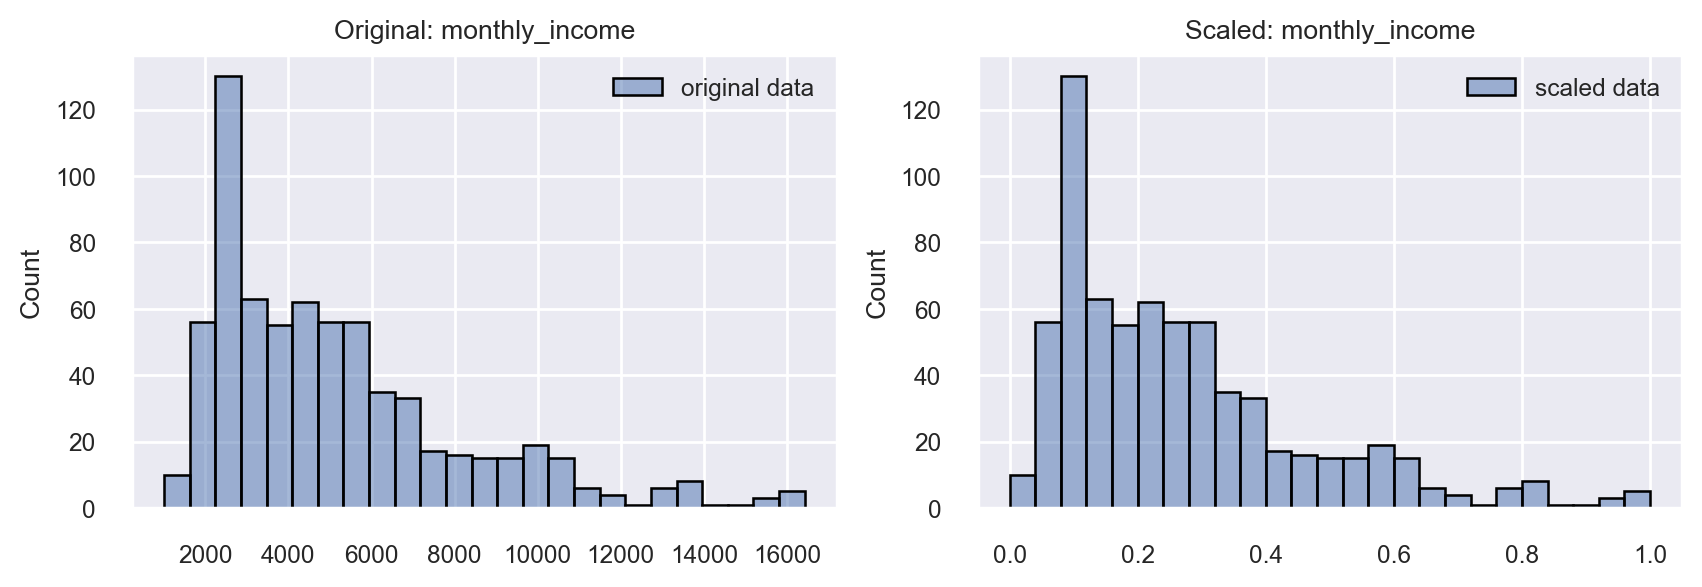

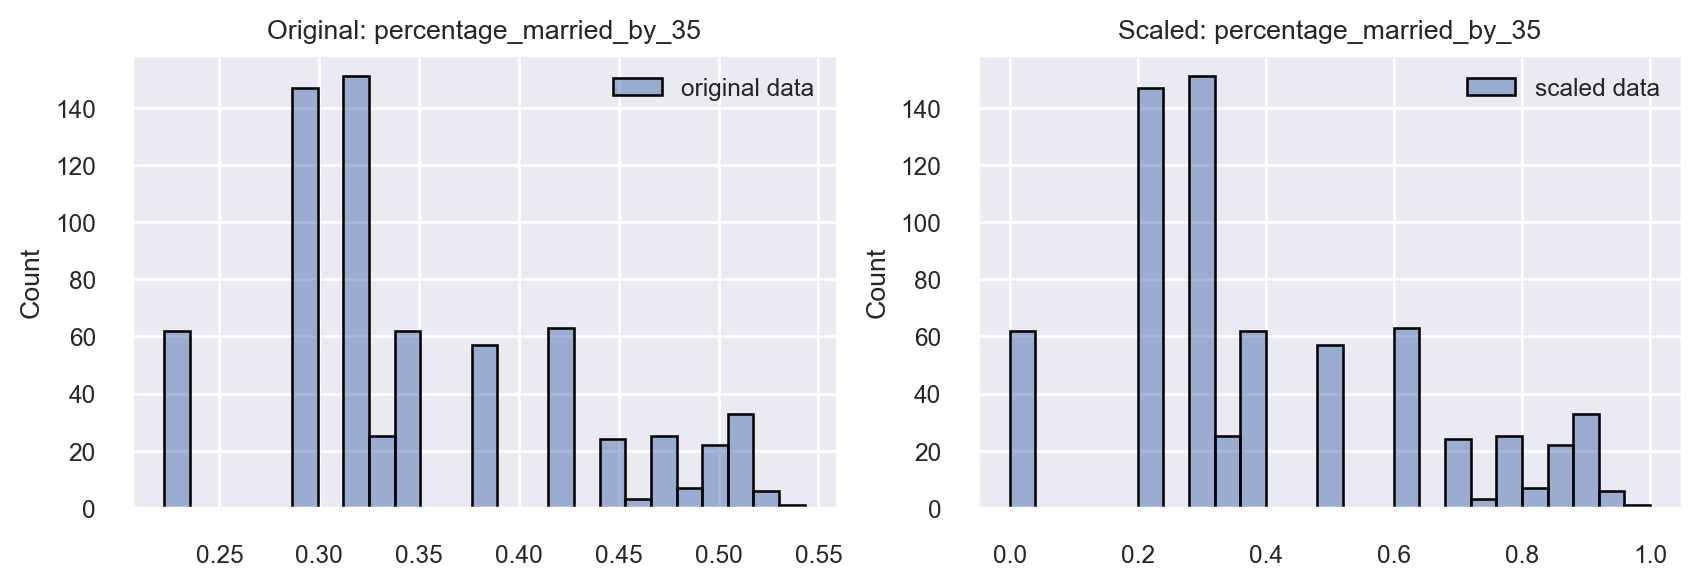

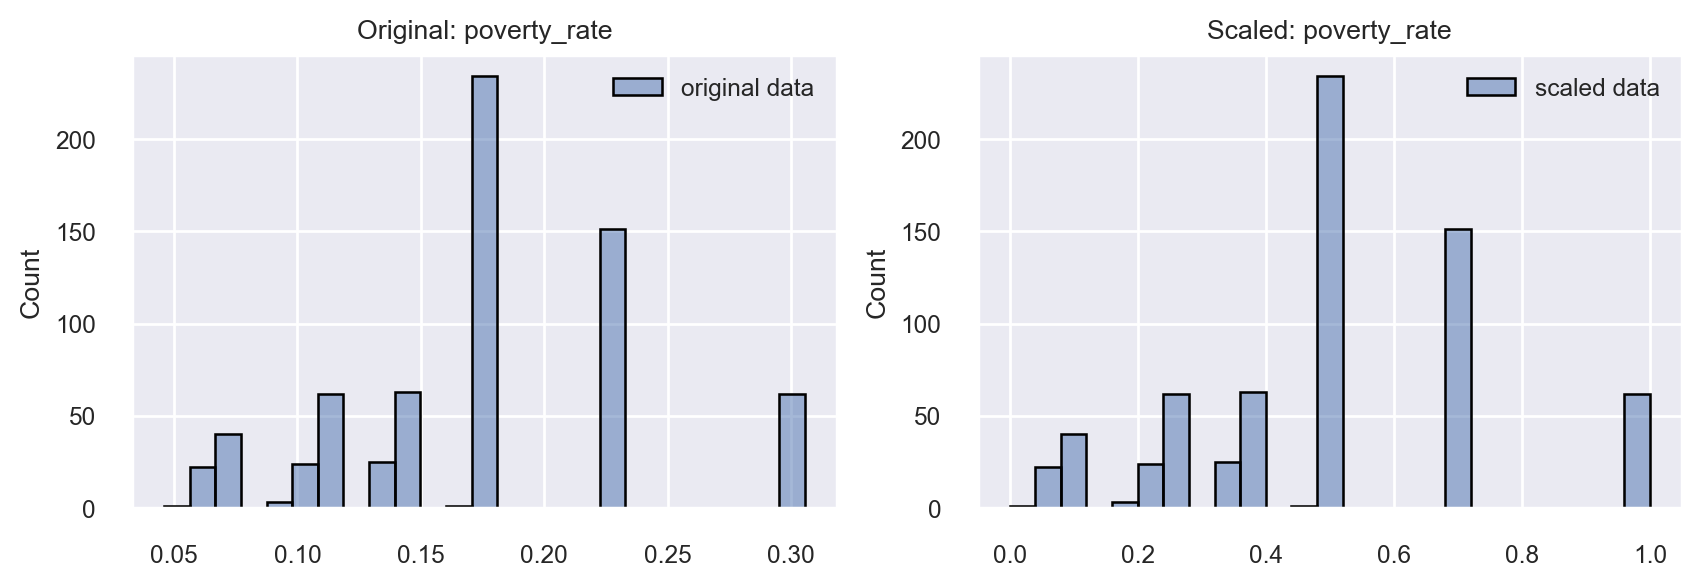

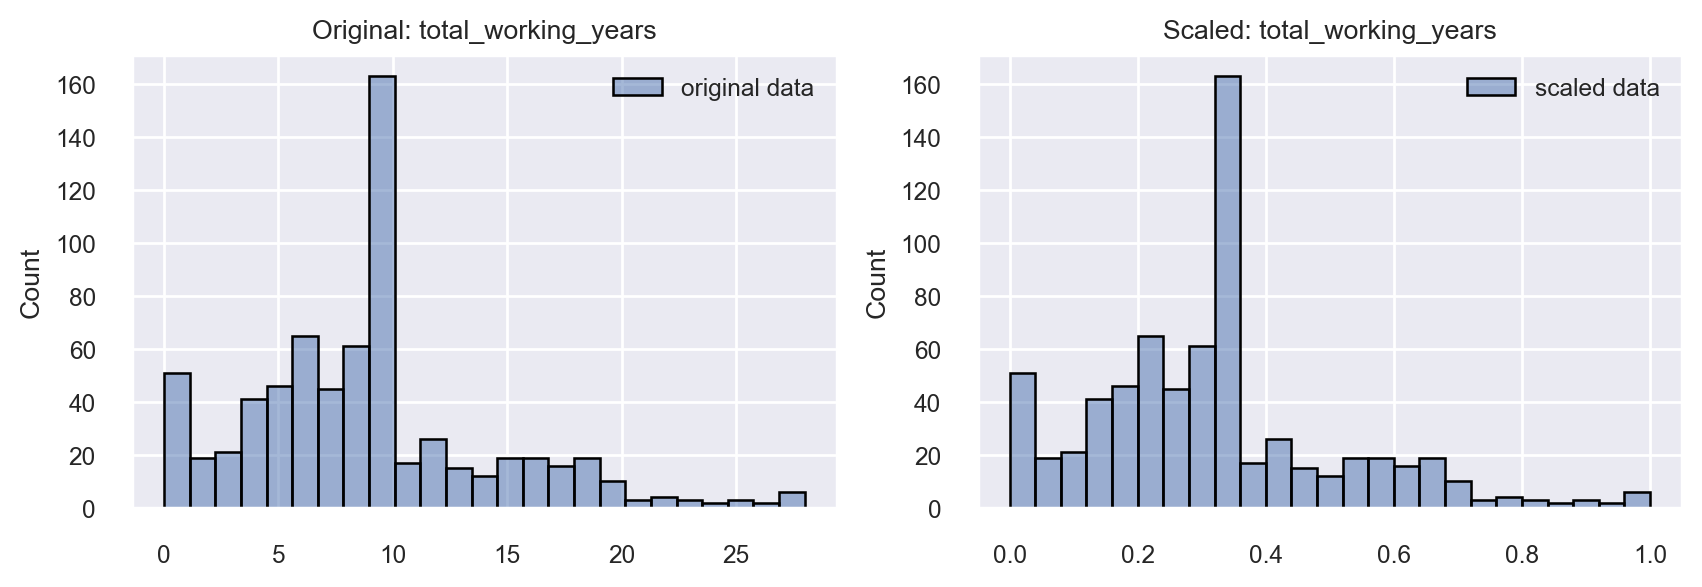

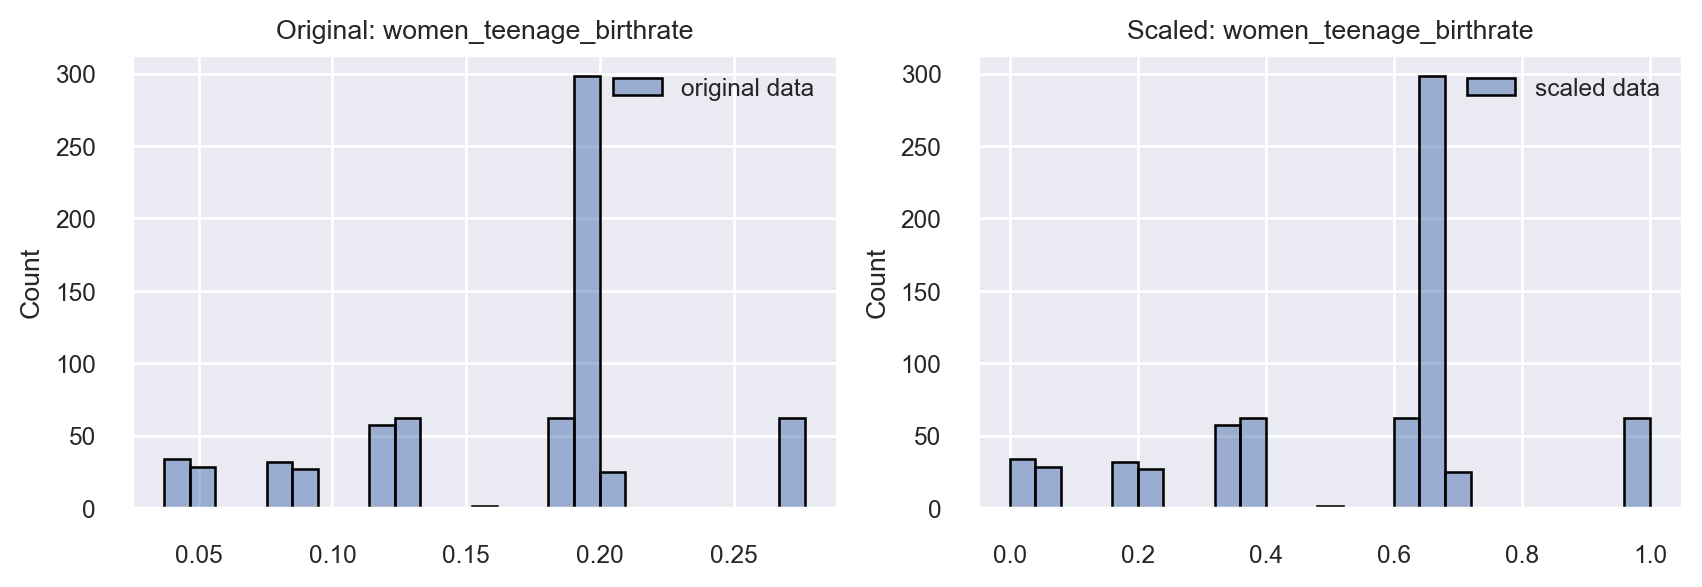

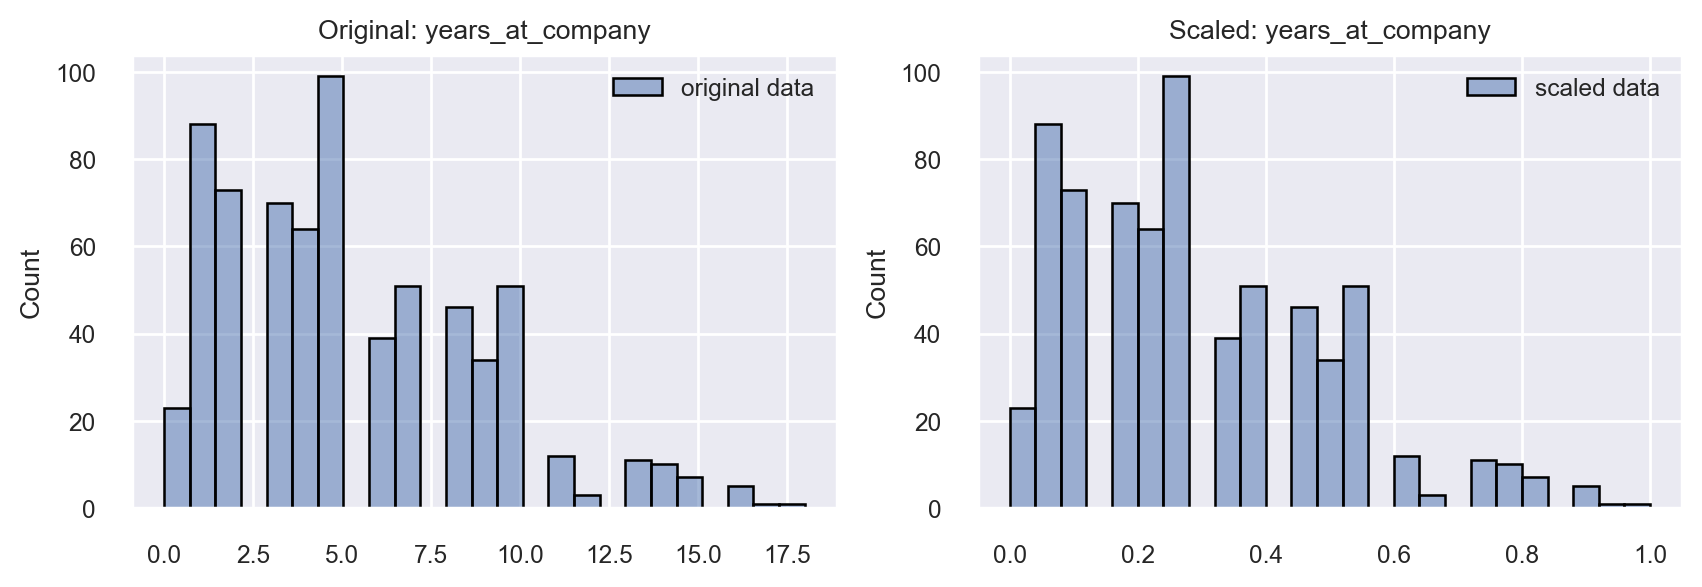

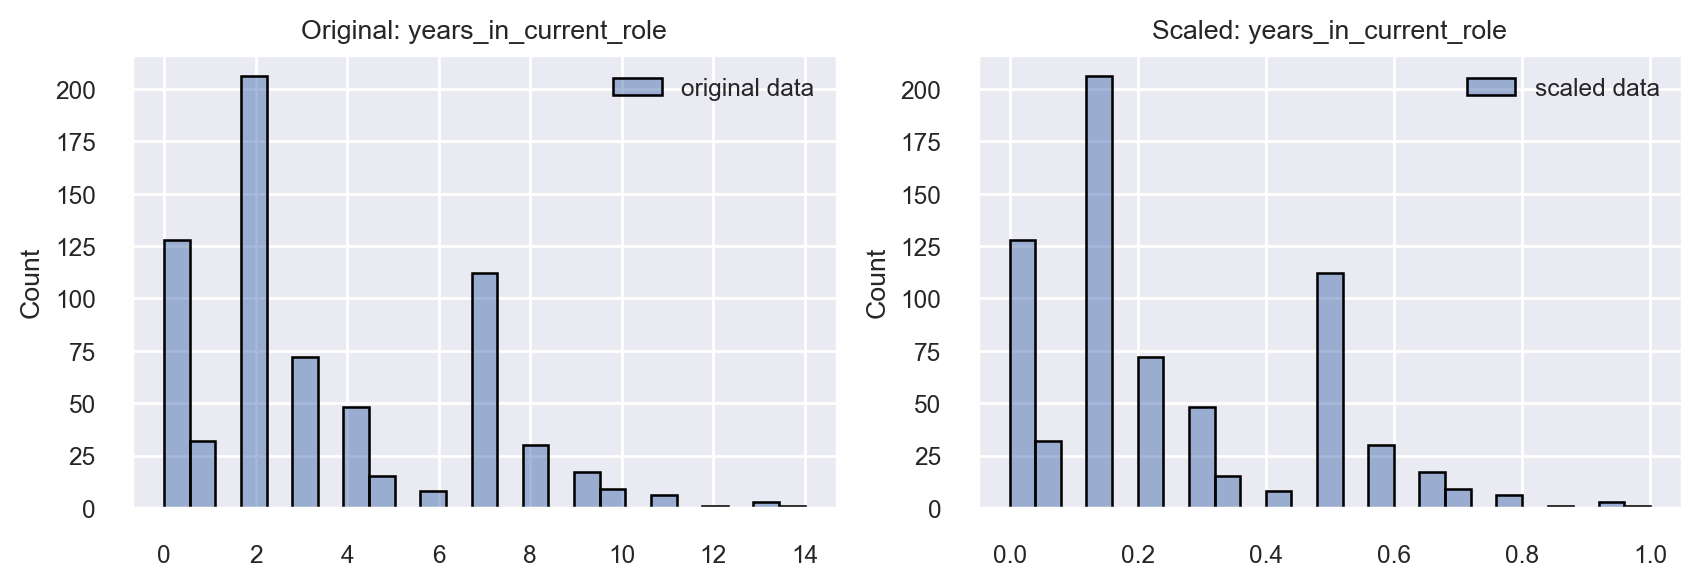

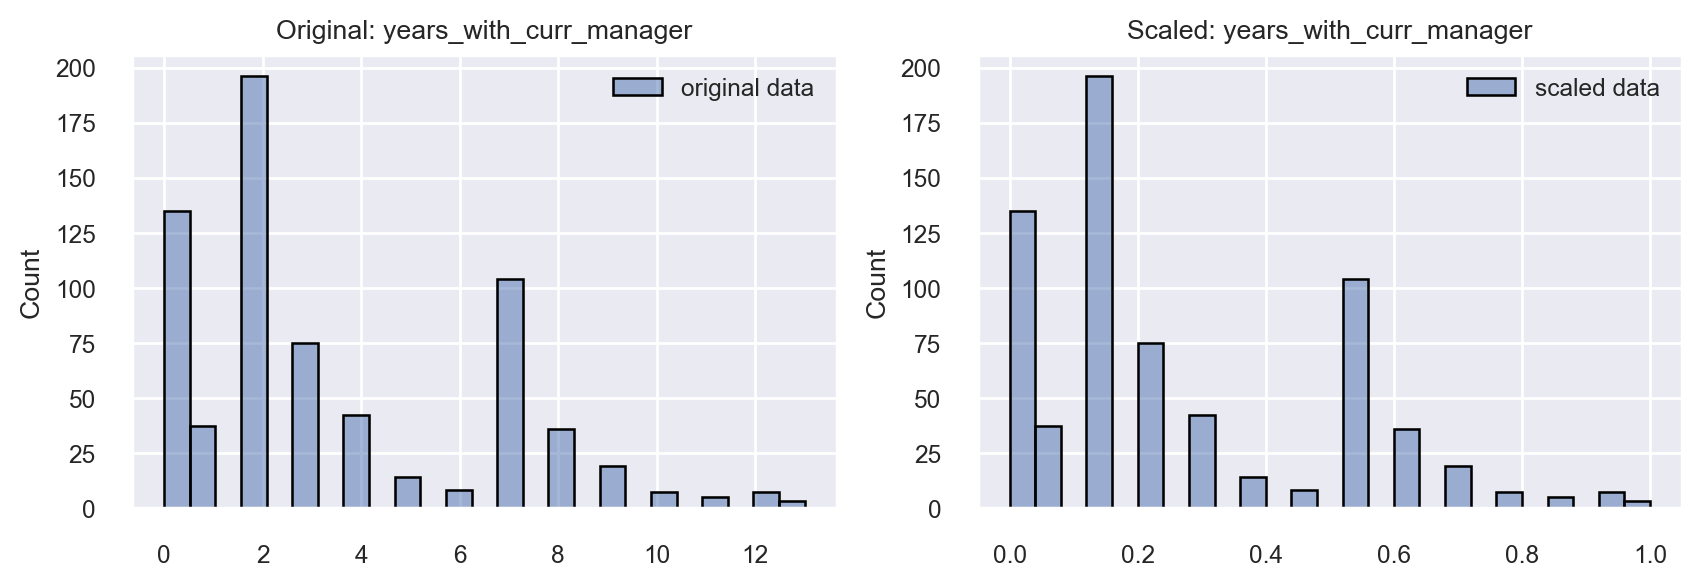

In [51]:
# Min/Max Scaler

cont_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()


for col in cont_lst:
    plt.figure(figsize=(10, 3))
    sns.set(font_scale = .8)

    scaler = MinMaxScaler()
    scaler.fit(X_train[[col]])
    x_scaled = scaler.transform(X_train[[col]])


    plt.subplot(121)
    ax1 = sns.histplot(X_train[[col]], bins = 25, edgecolor = 'black', label = 'original data')

    # removing axes scientific notation 
    ax1.ticklabel_format(style = "plain") 
    plt.title(f'Original: {col}')
    plt.legend()

    plt.subplot(122)
    ax2 = sns.histplot(x_scaled, bins=25, edgecolor = 'black', label = "scaled data")

    # removing axes scientific notation 
    ax2.ticklabel_format(style = "plain") 
    plt.title(f'Scaled: {col}')
    plt.legend()

``Summary: Since outlier management is not a key concern nor do I see outliers prevelant in either plots, I will choose to use sklearn's Standard Scaler to transform continuous variables.``

In [52]:
# scaling continuous features/data with sklearn "StandardScaler"
# creating function to do this

def scaled_data(df, scaled_cols):
    # creating a copy of the original zillow/dataframe
    df_scaled = df.copy()

    scaler = StandardScaler()

    scaler.fit(df_scaled[scaled_cols])

    df_scaled[scaled_cols] = scaler.transform(df_scaled[scaled_cols])

    # returning newly created dataframe with scaled data
    return df_scaled

In [53]:
# selecting features to scale

scale_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()
scale_lst

['age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'monthly_income',
 'percentage_married_by_35',
 'poverty_rate',
 'total_working_years',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager']

In [54]:
# viewing the head for comparison
X_train.head()

job_level                   job_role marital_status stock_option_level  \
161          1         Research Scientist        Married                  3   
1647         1         Research Scientist        Married                  0   
624          3  Healthcare Representative        Married                  0   
1279         1      Laboratory Technician         Single                  0   
469          2            Sales Executive        Married                  1   

      age  employment_rates_at_35yrs  high_school_graduation_rate  \
161    56                       0.79                         0.92   
1647   27                       0.78                         0.87   
624    46                       0.80                         0.94   
1279   21                       0.76                         0.88   
469    29                       0.73                         0.81   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                    57101            4963                      0.45   
1647                   41374            3517                      0.35   
624                    63424           10527                      0.51   
1279                   45330            2625                      0.38   
469                    37826            4649                      0.29   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161           0.10                    7                     0.09   
1647          0.18                    5                     0.19   
624           0.07                   28                     0.04   
1279          0.15                    2                     0.12   
469           0.17                    4                     0.19   

      years_at_company  years_in_current_role  years_with_curr_manager  
161                  5                      4                        3  
1647                 3                      2                        2  
624                  2                      2                        2  
1279                 2                      2                        2  
469                  4                      3                        2

In [55]:
# generating new X_train, and X_validate datasets w/scaled data

X_train = scaled_data(X_train, scale_lst)
X_validate = scaled_data(X_validate, scale_lst)

# preview the data
X_train.head() # checks out!

job_level                   job_role marital_status stock_option_level  \
161          1         Research Scientist        Married                  3   
1647         1         Research Scientist        Married                  0   
624          3  Healthcare Representative        Married                  0   
1279         1      Laboratory Technician         Single                  0   
469          2            Sales Executive        Married                  1   

       age  employment_rates_at_35yrs  high_school_graduation_rate  \
161   2.36                       1.13                         1.27   
1647 -0.97                       0.66                         0.21   
624   1.21                       1.45                         1.66   
1279 -1.65                       0.08                         0.47   
469  -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  years_in_current_role  years_with_curr_manager  
161              -0.08                   0.19                    -0.15  
1647             -0.63                  -0.49                    -0.48  
624              -0.90                  -0.49                    -0.48  
1279             -0.90                  -0.49                    -0.48  
469              -0.36                  -0.15                    -0.48

----
#### **``Assigning and Creating Dummy Variables for Discrete Features``**


In [56]:
X_train.select_dtypes(exclude = "number").columns.tolist()

['job_level', 'job_role', 'marital_status', 'stock_option_level']

In [57]:
'''function to create dummy variables for discrete variables/feature'''
def get_dummy_dataframes(train_df, val_df, test_df):

    # train dataset
    train_dummy = pd.get_dummies(
        data = train_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # validate dataset
    validate_dummy = pd.get_dummies(
        data = val_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # test dataset
    test_dummy = pd.get_dummies(
        data = test_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # returning dummy datasets
    return train_dummy, validate_dummy, test_dummy

In [58]:
# inspecting df before dummy transformation
X_train.shape

(688, 16)

In [59]:
# transforming dataframe to include dummy variables

train_dummy, validate_dummy, test_dummy = get_dummy_dataframes(X_train, X_validate, X_test)
print(f'shape: {train_dummy.shape}')
train_dummy.head()

shape: (688, 32)


age  employment_rates_at_35yrs  high_school_graduation_rate  \
161   2.36                       1.13                         1.27   
1647 -0.97                       0.66                         0.21   
624   1.21                       1.45                         1.66   
1279 -1.65                       0.08                         0.47   
469  -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  years_in_current_role  years_with_curr_manager  \
161              -0.08                   0.19                    -0.15   
1647             -0.63                  -0.49                    -0.48   
624              -0.90                  -0.49                    -0.48   
1279             -0.90                  -0.49                    -0.48   
469              -0.36                  -0.15                    -0.48   

      job_level_1  job_level_2  job_level_3  job_level_4  \
161          True        False        False        False   
1647         True        False        False        False   
624         False        False         True        False   
1279         True        False        False        False   
469         False         True        False        False   

      job_role_Healthcare Representative  job_role_Human Resources  \
161                                False                     False   
1647                               False                     False   
624                                 True                     False   
1279                               False                     False   
469                                False                     False   

      job_role_Laboratory Technician  job_role_Manager  \
161                            False             False   
1647                           False             False   
624                            False             False   
1279                            True             False   
469                            False             False   

      job_role_Manufacturing Director  job_role_Research Director  \
161                             False                       False   
1647                            False                       False   
624                             False                       False   
1279                            False                       False   
469                             False                       False   

      job_role_Research Scientist  job_role_Sales Executive  \
161                          True                     False   
1647                         True                     False   
624                         False                     False   
1279                        False                     False   
469                         False                      True   

      job_role_Sales Representative  marital_status_Divorced  \
161                           False                    False   
1647                          False                    False   
624                           False                    False   
1279                          False                    False   
469                           False       

----
#### **``Feature Selection``**

In [60]:
def recursive_feature_eliminate(X_train, y_train, number_of_top_features):

    # initialize the ML algorithm
    lm = LinearRegression()

    rfe = RFE(lm, n_features_to_select = number_of_top_features)

    # fit the data using RFE
    rfe.fit(X_train, y_train) 

    # get the mask of the columns selected
    feature_mask = rfe.support_

    # get list of the column names
    rfe_features = X_train.iloc[:,feature_mask].columns.tolist()

    # view list of columns and their ranking
    # get the ranks using "rfe.ranking" method
    variable_ranks = rfe.ranking_

    # get the variable names
    variable_names = X_train.columns.tolist()

    # combine ranks and names into a df for clean viewing
    rfe_ranks_df = pd.DataFrame({'Feature': variable_names, 'Ranking': variable_ranks})

    # sort the df by rank
    return rfe_ranks_df.sort_values('Ranking')


In [61]:
# SKLearn's Recursive Feature Elimination function
recursive_feature_eliminate(train_dummy, y_train, 10).reset_index(drop = True)

Feature  Ranking
0                 stock_option_level_1        1
1                 stock_option_level_0        1
2        job_role_Sales Representative        1
3             percentage_married_by_35        1
4                         poverty_rate        1
5             job_role_Sales Executive        1
6              women_teenage_birthrate        1
7           job_role_Research Director        1
8       job_role_Laboratory Technician        1
9                          job_level_2        1
10                stock_option_level_2        2
11                                 age        3
12                    years_at_company        4
13         job_role_Research Scientist        5
14                      monthly_income        6
15                         job_level_4        7
16                         job_level_3        8
17                    job_role_Manager        9
18           employment_rates_at_35yrs       10
19              household_income_at_35       11
20  job_role_Healthcare Representative       12
21     job_role_Manufacturing Director       13
22                 total_working_years       14
23                         job_level_1       15
24               years_in_current_role       16
25                stock_option_level_3       17
26               marital_status_Single       18
27             years_with_curr_manager       19
28            job_role_Human Resources       20
29              marital_status_Married       21
30         high_school_graduation_rate       22
31             marital_status_Divorced       23

In [111]:
# using sklearn's RFECV function to select best features to include w/Random Forest classifier

cross_validation = RFECV(
    estimator = RandomForestClassifier(random_state = 548),
    min_features_to_select = 5)

cross_validation = cross_validation.fit(train_dummy, y_train)

rf_features = train_dummy.columns[cross_validation.support_].tolist()
pd.DataFrame(rf_features).rename(columns = {0: "Features"}).sort_values("Features").reset_index(drop = True)

Features
0                                  age
1            employment_rates_at_35yrs
2          high_school_graduation_rate
3               household_income_at_35
4                          job_level_1
5                          job_level_2
6                          job_level_3
7   job_role_Healthcare Representative
8             job_role_Human Resources
9       job_role_Laboratory Technician
10     job_role_Manufacturing Director
11         job_role_Research Scientist
12            job_role_Sales Executive
13       job_role_Sales Representative
14             marital_status_Divorced
15              marital_status_Married
16               marital_status_Single
17                      monthly_income
18            percentage_married_by_35
19                        poverty_rate
20                stock_option_level_0
21                stock_option_level_1
22                stock_option_level_2
23                stock_option_level_3
24                 total_working_years
25             women_teenage_birthrate
26                    years_at_company
27               years_in_current_role
28             years_with_curr_manager

In [108]:
# applying RFECV w/Logistic Regression estimator

cross_validation = RFECV(
    estimator = LogisticRegression(
        C = 1, 
        class_weight = "balanced", 
        random_state = 548),
        min_features_to_select = 5)

cross_validation = cross_validation.fit(train_dummy, y_train)

lr_features = train_dummy.columns[cross_validation.support_].tolist()
pd.DataFrame(lr_features).rename(columns = {0: "Features"}).sort_values("Features").reset_index(drop = True)

Features
0                                  age
1            employment_rates_at_35yrs
2          high_school_graduation_rate
3               household_income_at_35
4                          job_level_1
5                          job_level_2
6                          job_level_3
7                          job_level_4
8   job_role_Healthcare Representative
9             job_role_Human Resources
10      job_role_Laboratory Technician
11                    job_role_Manager
12          job_role_Research Director
13         job_role_Research Scientist
14            job_role_Sales Executive
15       job_role_Sales Representative
16             marital_status_Divorced
17               marital_status_Single
18                      monthly_income
19            percentage_married_by_35
20                        poverty_rate
21                stock_option_level_0
22                stock_option_level_1
23                stock_option_level_2
24                 total_working_years
25             women_teenage_birthrate
26                    years_at_company
27             years_with_curr_manager

----
### **``Summary: Recursive Feature Elimination``**

I will leverage Sklearn's RFECV using a Random Forest estimator to select features used in Modeling. 

In [120]:
# let's apply the RFECV features to modeling training dataframe

train_model = train_dummy[rf_features]
validate_model = validate_dummy[rf_features]
test_model = test_dummy[rf_features]

train_model.head()

age  employment_rates_at_35yrs  high_school_graduation_rate  \
161   2.36                       1.13                         1.27   
1647 -0.97                       0.66                         0.21   
624   1.21                       1.45                         1.66   
1279 -1.65                       0.08                         0.47   
469  -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  years_in_current_role  years_with_curr_manager  \
161              -0.08                   0.19                    -0.15   
1647             -0.63                  -0.49                    -0.48   
624              -0.90                  -0.49                    -0.48   
1279             -0.90                  -0.49                    -0.48   
469              -0.36                  -0.15                    -0.48   

      job_level_1  job_level_2  job_level_3  \
161          True        False        False   
1647         True        False        False   
624         False        False         True   
1279         True        False        False   
469         False         True        False   

      job_role_Healthcare Representative  job_role_Human Resources  \
161                                False                     False   
1647                               False                     False   
624                                 True                     False   
1279                               False                     False   
469                                False                     False   

      job_role_Laboratory Technician  job_role_Manufacturing Director  \
161                            False                            False   
1647                           False                            False   
624                            False                            False   
1279                            True                            False   
469                            False                            False   

      job_role_Research Scientist  job_role_Sales Executive  \
161                          True                     False   
1647                         True                     False   
624                         False                     False   
1279                        False                     False   
469                         False                      True   

      job_role_Sales Representative  marital_status_Divorced  \
161                           False                    False   
1647                          False                    False   
624                           False                    False   
1279                          False                    False   
469                           False                    False   

      marital_status_Married  marital_status_Single  stock_option_level_0  \
161                     True                  False                 False   
1647                    True                  False                  True   
624                     True                  False                  True   
1279                   False                   True                  Tru

In [121]:
# looping through Random Forest depth & sample leaf

leaf_counter = 0

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=548)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(train_model, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(train_model)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 1
Random Forest with minimum sample leaves of: 1
           False   True  accuracy  macro avg  weighted avg
precision   0.82   0.00      0.82       0.41          0.68
recall      1.00   0.00      0.82       0.50          0.82
f1-score    0.90   0.00      0.82       0.45          0.74
support   566.00 122.00      0.82     688.00        688.00

Random Forest with max_depth of: 2
Random Forest with minimum sample leaves of: 2
           False   True  accuracy  macro avg  weighted avg
precision   0.83   0.80      0.83       0.81          0.82
recall      1.00   0.03      0.83       0.52          0.83
f1-score    0.90   0.06      0.83       0.48          0.76
support   566.00 122.00      0.83     688.00        688.00

Random Forest with max_depth of: 3
Random Forest with minimum sample leaves of: 3
           False   True  accuracy  macro avg  weighted avg
precision   0.84   0.79      0.84       0.81          0.83
recall      0.99   0.12      0.84       0.56

In [122]:
# looping through Decision Tree Classifier and working backwards from number of leaves

leaf_counter = 0

for i in range(10, 0, -1):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=548)
    leaf_counter += 1

    # Fit the model (on train and only train)
    tree = tree.fit(train_model, y_train)

    # Use the model
    # We'll evaluate the model's petreeormance on train, first
    y_predictions = tree.predict(train_model)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Decision Tree with max_depth of: {i}")
    print(f"Decision Tree with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Decision Tree with max_depth of: 10
Decision Tree with minimum sample leaves of: 1
           False   True  accuracy  macro avg  weighted avg
precision   0.97   0.94      0.96       0.95          0.96
recall      0.99   0.84      0.96       0.92          0.96
f1-score    0.98   0.89      0.96       0.93          0.96
support   566.00 122.00      0.96     688.00        688.00

Decision Tree with max_depth of: 9
Decision Tree with minimum sample leaves of: 2
           False   True  accuracy  macro avg  weighted avg
precision   0.92   0.95      0.92       0.93          0.92
recall      0.99   0.58      0.92       0.79          0.92
f1-score    0.95   0.72      0.92       0.84          0.91
support   566.00 122.00      0.92     688.00        688.00

Decision Tree with max_depth of: 8
Decision Tree with minimum sample leaves of: 3
           False   True  accuracy  macro avg  weighted avg
precision   0.92   0.81      0.90       0.86          0.90
recall      0.97   0.58      0.90       0.7

In [126]:
# evaluating the Decision Tree model with
# max depth: 8
# number of sample leaves: 3

# creating the Decision Tree Model
tree1 = DecisionTreeClassifier(
    max_depth = 8, 
    min_samples_leaf = 3,
    random_state = 548)

# fitting the Decision Tree model
tree1 = tree1.fit(train_model, y_train)

decision_tree_acc = tree1.score(train_model, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(decision_tree_acc))
print(f'Absolute % Difference (Baseline vs. Decision Tree Model): % {round(0.82 - decision_tree_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.90
Absolute % Difference (Baseline vs. Decision Tree Model): % -8.0


In [155]:
# making prediction on train dataset and returning confusion matrix against actual observations

y_predictions = tree1.predict(train_model)

pd.crosstab(y_predictions, y_train).rename_axis( "Predicted", axis = 0)

attrition  False  True
Predicted             
False        549    51
True          17    71

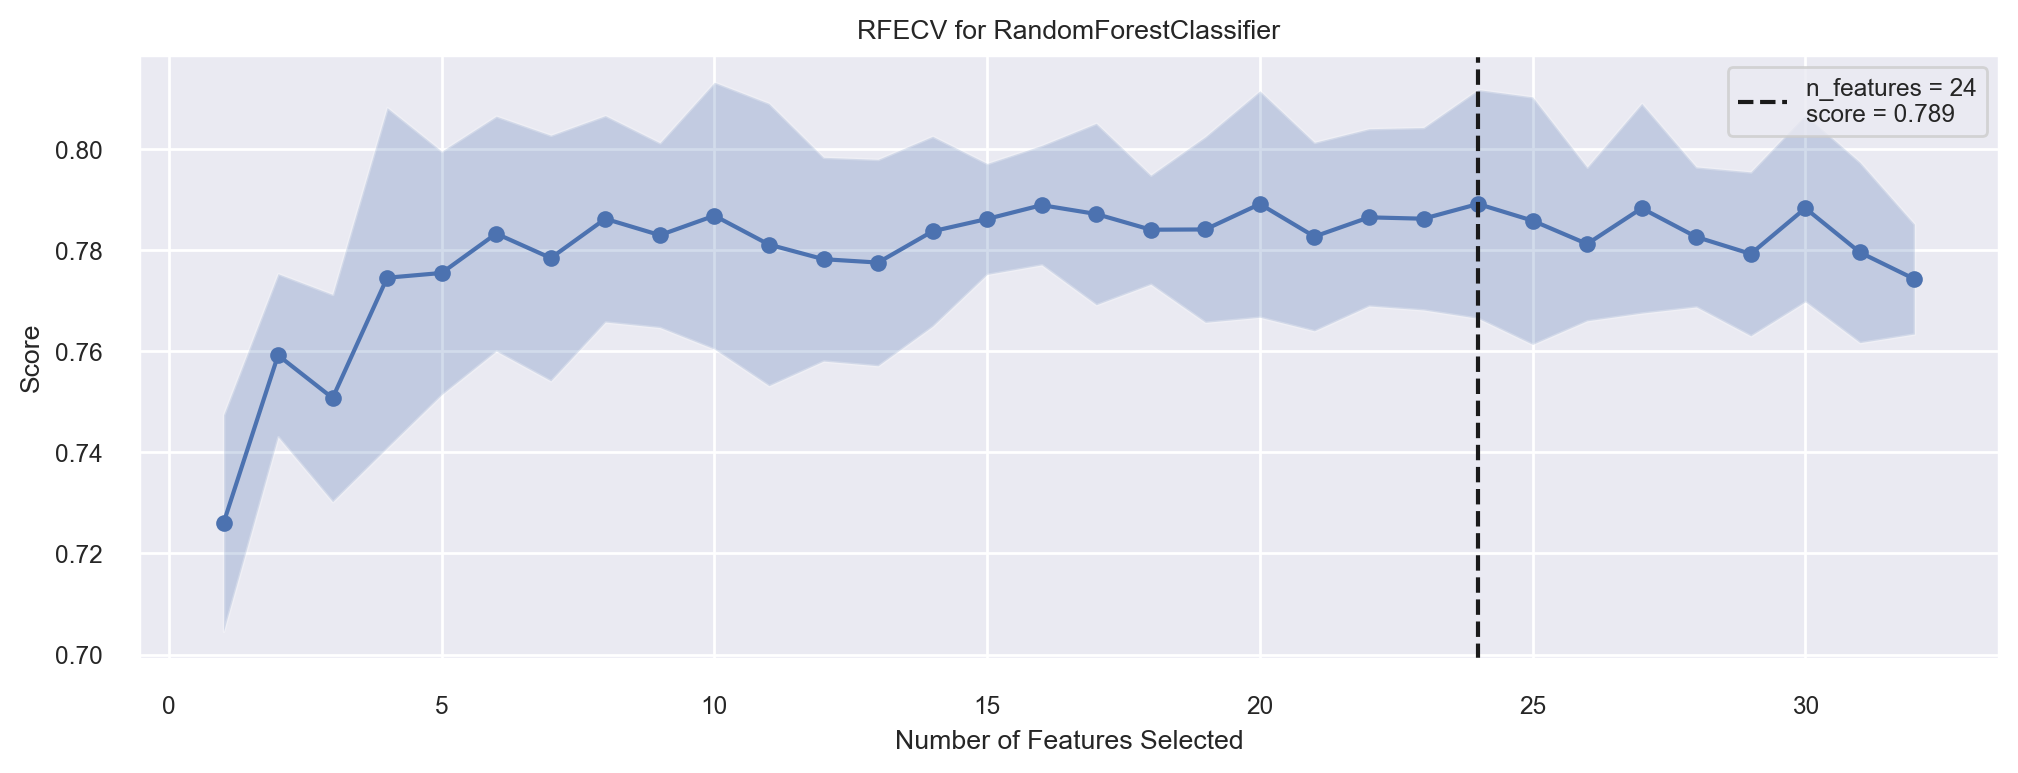

<Figure size 1600x1100 with 0 Axes>

In [63]:
# plotting recursive feature elimination - cross validations & F1 score using yellowbrick rfecv

plt.figure(figsize=(12,4))

cv = StratifiedKFold(5)
visualizer = rfecv(
    RandomForestClassifier(random_state = 548), 
    X = train_model, 
    y = y_train, 
    cv = cv, 
    scoring='f1_weighted')

plt.savefig('rfecv_rfclassifier.png')

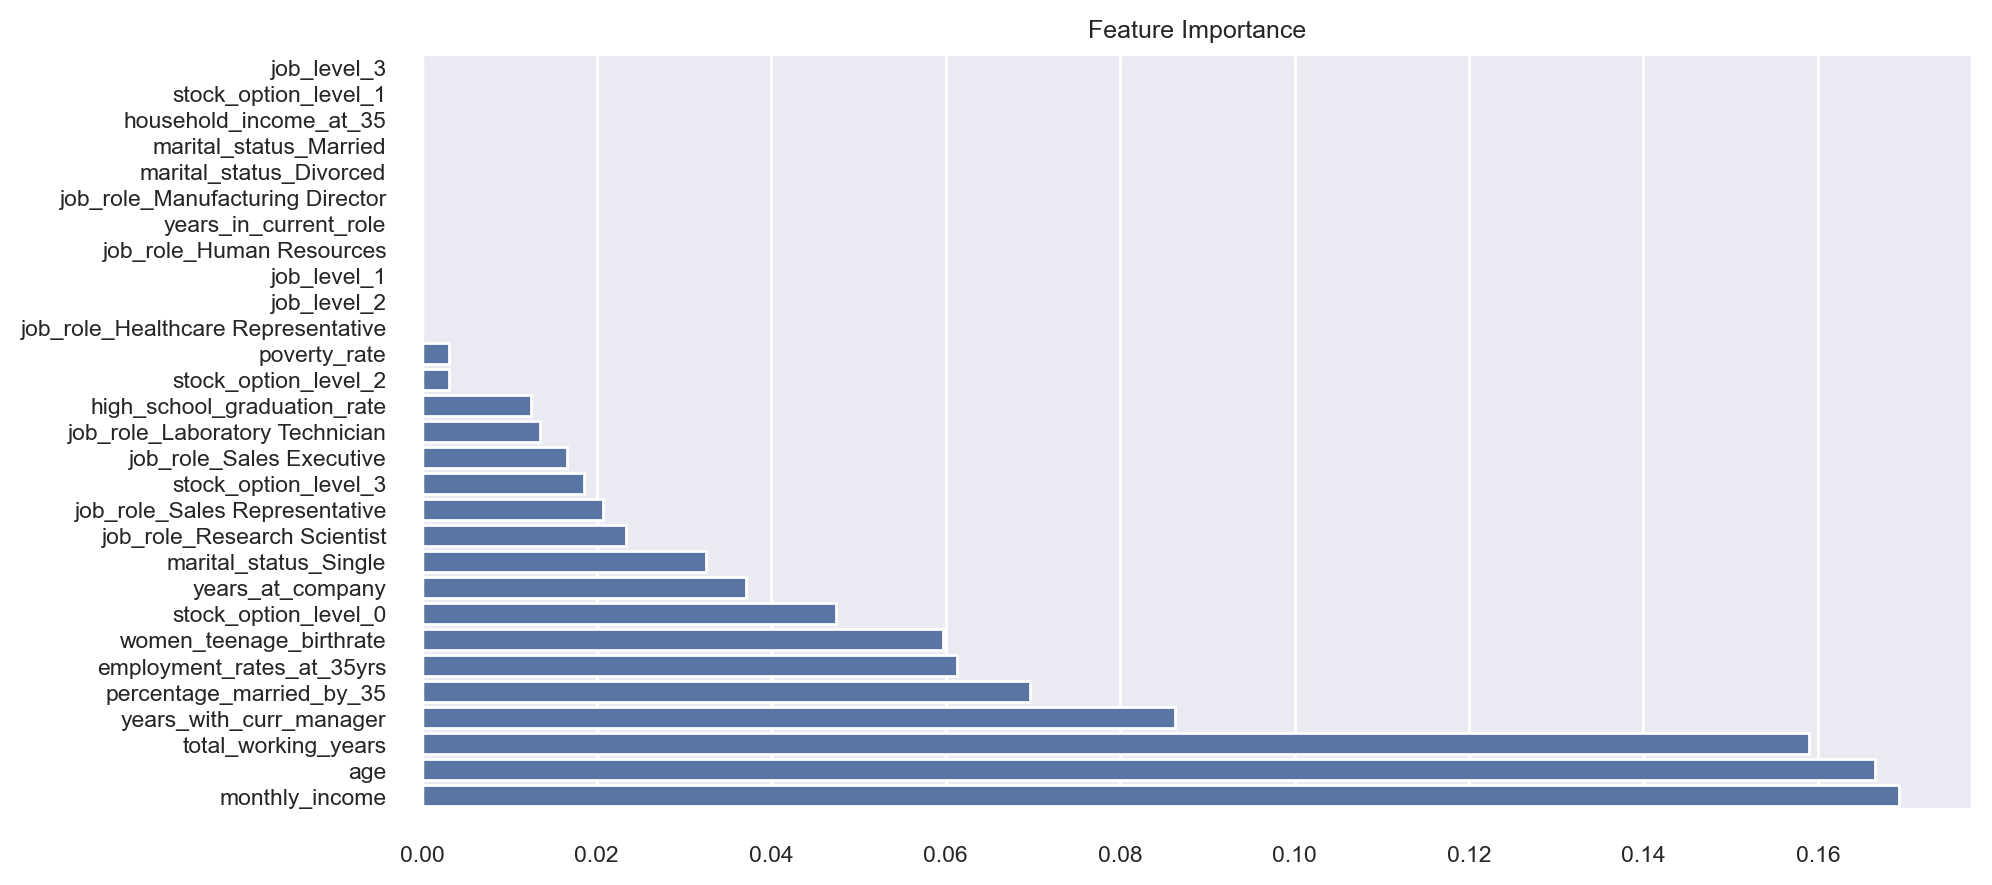

In [135]:
# calculating and plotting feature importance using Decision tree1 Classifer / non-recursive elimination

plt.figure(figsize = (10, 5))
sns.set(style = "darkgrid", font_scale = .75)

# organizing/ordering feature importance by value
sorted_idx = tree1.feature_importances_.argsort()

sns.barplot(tree1.feature_importances_[sorted_idx], train_model.columns[sorted_idx], orient = "h", color = "b")

plt.title("Feature Importance")

plt.savefig("feature_importance_tree1regressor.png")
plt.show()

In [149]:
# showing decision tree importance by feature

pd.DataFrame(
    tree1.feature_importances_, 
    index = train_model.columns).\
    rename(columns = {0: "feature_importance"}).\
    sort_index(ascending=True).\
    sort_values(by = 'feature_importance', ascending = False)

feature_importance
monthly_income                                    0.17
age                                               0.17
total_working_years                               0.16
years_with_curr_manager                           0.09
percentage_married_by_35                          0.07
employment_rates_at_35yrs                         0.06
women_teenage_birthrate                           0.06
stock_option_level_0                              0.05
years_at_company                                  0.04
marital_status_Single                             0.03
job_role_Research Scientist                       0.02
job_role_Sales Representative                     0.02
stock_option_level_3                              0.02
job_role_Sales Executive                          0.02
job_role_Laboratory Technician                    0.01
high_school_graduation_rate                       0.01
stock_option_level_2                              0.00
poverty_rate                                      0.00
years_in_current_role                             0.00
stock_option_level_1                              0.00
job_level_1                                       0.00
household_income_at_35                            0.00
job_level_2                                       0.00
marital_status_Married                            0.00
job_role_Manufacturing Director                   0.00
job_role_Human Resources                          0.00
job_role_Healthcare Representative                0.00
job_level_3                                       0.00
marital_status_Divorced                           0.00

In [150]:
'''Feature for plotting decision tree classifier - feature importance'''
def plot_feature_importance(X_train, y_train):
    plt.figure(figsize = (10, 5))
    sns.set(style = "darkgrid", font_scale = .75)

    tree = DecisionTreeClassifier(random_state = 548)
    tree = tree.fit(X_train, y_train)

    sorted_idx = tree.feature_importances_.argsort()

    sns.barplot(
        tree.feature_importances_[sorted_idx], 
        X_train.columns[sorted_idx], 
        orient = "h", 
        palette = "crest")

    plt.title("Feature Importance")

    plt.show()

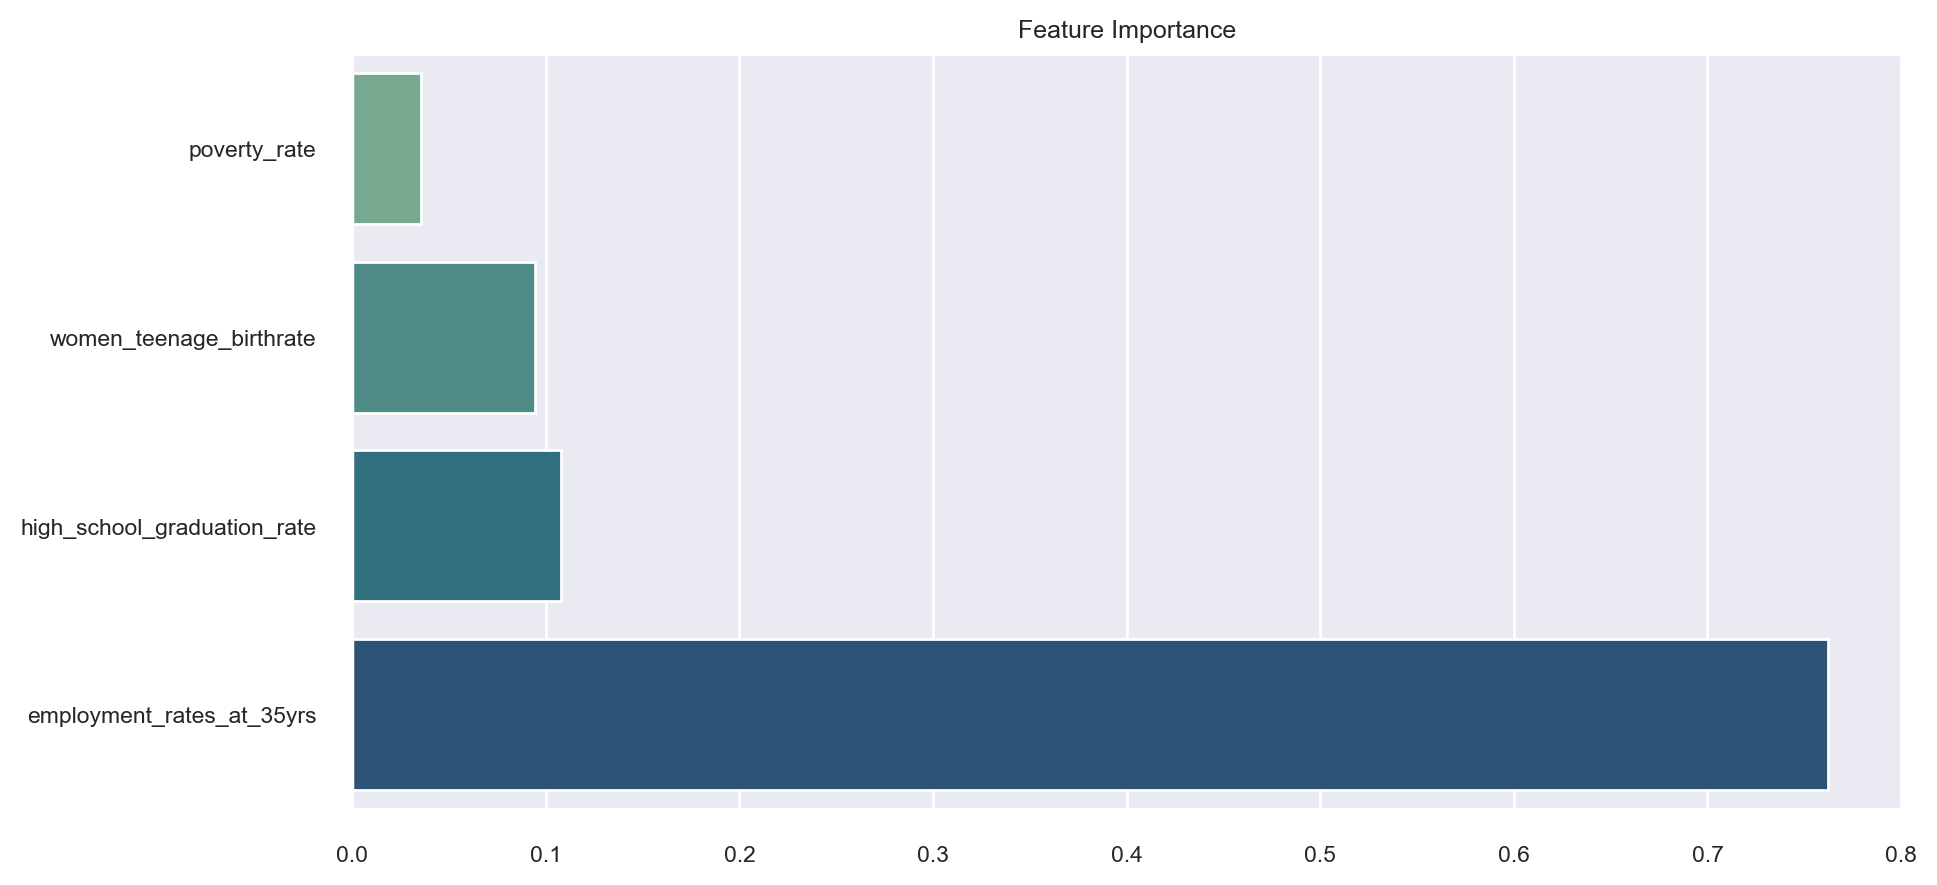

In [151]:
# let's also plot feature importance for just opportunity atlas features

equity_lst = [col for col in train_dummy.columns if 'rate' in col]
equity_df = train_dummy[equity_lst]

equity_df.head()
plot_feature_importance(equity_df, y_train)

----
### **``Modeling``**

<u>key Models to focus on:</u>

- XGboost
- Polynomial/Logistic Regression 
- Decision Tree
- Naive Bayes
- KNN

In [160]:
# model num 1: xgboost

metrics = []

# creating the model
boost = XGBClassifier()

# fitting the model (on train and only train)
boost = boost.fit(train_model, y_train)

# applying the model and evaluating its performance on the training dataset
in_sample_accuracy = boost.score(train_model, y_train)

# next, we'll evaluate the model on "out-of-sample" data (validate)
out_of_sample_accuracy = boost.score(validate_model, y_validate)

output = {
    "model": "XGboost", \
    "train_accuracy": in_sample_accuracy, \
    "validate_accuracy": out_of_sample_accuracy
}

metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)


model  train_accuracy  validate_accuracy  percent_change_diff
0  XGboost            1.00               0.80                 0.24

In [183]:
# model num 2A: Logistic Regression

metrics = []

for i in np.linspace(0.1, 1.0, 10):

    # creating the model
    lr = LogisticRegression(
        C = i)

    # fitting the model (on train and only train)
    lr = lr.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = lr.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = lr.score(validate_model, y_validate)

    output = {
        "model": "lr_model", \
        "C_parameter": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  C_parameter  train_accuracy  validate_accuracy  \
0  lr_model         0.10            0.84               0.84   
1  lr_model         0.20            0.84               0.84   
2  lr_model         0.30            0.84               0.83   
3  lr_model         0.40            0.85               0.83   
4  lr_model         0.50            0.85               0.83   
5  lr_model         0.60            0.84               0.83   
6  lr_model         0.70            0.84               0.83   
7  lr_model         0.80            0.84               0.83   
8  lr_model         0.90            0.84               0.84   
9  lr_model         1.00            0.84               0.84   

   percent_change_diff  
0                 0.00  
1                 0.00  
2                 0.01  
3                 0.02  
4                 0.01  
5                 0.01  
6                 0.01  
7                 0.01  
8                 0.00  
9                 0.00

In [193]:
# creating an opportunity atlas df from validate 

val_equity = validate_dummy[equity_lst]
val_equity.head()

employment_rates_at_35yrs  high_school_graduation_rate  poverty_rate  \
1022                       0.59                         0.15          0.05   
248                        0.64                         0.57          0.03   
1546                       1.80                         1.36         -1.28   
1582                       1.06                         1.22         -1.15   
1292                       0.59                         0.15          0.05   

      women_teenage_birthrate  
1022                     0.41  
248                      0.64  
1546                    -1.30  
1582                    -1.22  
1292                     0.41

In [194]:
# model num 2B: Logistic Regression / Opportunity Atlas Data

metrics = []

for i in np.linspace(0.1, 1.0, 10):

    # creating the model
    lr = LogisticRegression(
        C = i)

    # fitting the model (on train and only train)
    lr = lr.fit(equity_df, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = lr.score(equity_df, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = lr.score(val_equity, y_validate)

    output = {
        "model": "lr_model", \
        "C_parameter": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  C_parameter  train_accuracy  validate_accuracy  \
0  lr_model         0.10            0.82               0.82   
1  lr_model         0.20            0.82               0.82   
2  lr_model         0.30            0.82               0.82   
3  lr_model         0.40            0.82               0.82   
4  lr_model         0.50            0.82               0.82   
5  lr_model         0.60            0.82               0.82   
6  lr_model         0.70            0.82               0.82   
7  lr_model         0.80            0.82               0.82   
8  lr_model         0.90            0.82               0.82   
9  lr_model         1.00            0.82               0.82   

   percent_change_diff  
0                -0.00  
1                -0.00  
2                -0.00  
3                -0.00  
4                -0.00  
5                -0.00  
6                -0.00  
7                -0.00  
8                -0.00  
9                -0.00

In [ ]:
# model num 3A: Decision Tree

metrics = []
leaf_counter = 0

for i in range(1, 21):
    # creating the model
    tree = DecisionTreeClassifier(
        min_samples_leaf = (leaf_counter + 1), 
        max_depth = i)

    # increasing leaf counter by 1
    leaf_counter += 1

    # fitting the model
    tree = tree.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = tree.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(validate_model, y_validate)

    output = {
        "model": "decision_tree", \
        "max_depth": i, \
        "min_sample_leaves": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  max_depth  min_sample_leaves  train_accuracy  \
0   decision_tree          1                  1            0.83   
1   decision_tree          2                  2            0.84   
2   decision_tree          3                  3            0.84   
3   decision_tree          4                  4            0.86   
4   decision_tree          5                  5            0.87   
5   decision_tree          6                  6            0.88   
6   decision_tree          7                  7            0.87   
7   decision_tree          8                  8            0.86   
8   decision_tree          9                  9            0.86   
9   decision_tree         10                 10            0.86   
10  decision_tree         11                 11            0.86   
11  decision_tree         12                 12            0.85   
12  decision_tree         13                 13            0.85   
13  decision_tree         14                 14            0.85   
14  decision_tree         15                 15            0.85   
15  decision_tree         16                 16            0.84   
16  decision_tree         17                 17            0.84   
17  decision_tree         18                 18            0.84   
18  decision_tree         19                 19            0.84   
19  decision_tree         20                 20            0.84   

    validate_accuracy  percent_change_diff  
0                0.81                 0.02  
1                0.81                 0.03  
2                0.79                 0.06  
3                0.82                 0.05  
4                0.79                 0.09  
5                0.80                 0.10  
6                0.81                 0.07  
7                0.81                 0.07  
8                0.79                 0.10  
9                0.82                 0.04  
10               0.82                 0.04  
11               0.83                 0.03  
12               0.84                 0.01  
13               0.84                 0.01  
14               0.84                 0.01  
15               0.83                 0.02  
16               0.83                 0.02  
17               0.81                 0.04  
18               0.81                 0.04  
19               0.81                 0.04

In [191]:
# model num 3B: Decision Tree

metrics = []
leaf_counter = 21

for i in range(1, 21):
    # creating the model
    tree = DecisionTreeClassifier(
        min_samples_leaf = (leaf_counter - 1), 
        max_depth = i)

    # decreasing leaf counter by 1
    leaf_counter -= 1

    # fitting the model
    tree = tree.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = tree.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(validate_model, y_validate)

    output = {
        "model": "decision_tree", \
        "max_depth": i, \
        "min_sample_leaves": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  max_depth  min_sample_leaves  train_accuracy  \
0   decision_tree          1                 20            0.83   
1   decision_tree          2                 19            0.84   
2   decision_tree          3                 18            0.84   
3   decision_tree          4                 17            0.84   
4   decision_tree          5                 16            0.84   
5   decision_tree          6                 15            0.85   
6   decision_tree          7                 14            0.85   
7   decision_tree          8                 13            0.85   
8   decision_tree          9                 12            0.85   
9   decision_tree         10                 11            0.86   
10  decision_tree         11                 10            0.86   
11  decision_tree         12                  9            0.86   
12  decision_tree         13                  8            0.87   
13  decision_tree         14                  7            0.88   
14  decision_tree         15                  6            0.90   
15  decision_tree         16                  5            0.91   
16  decision_tree         17                  4            0.91   
17  decision_tree         18                  3            0.93   
18  decision_tree         19                  2            0.95   
19  decision_tree         20                  1            1.00   

    validate_accuracy  percent_change_diff  
0                0.81                 0.02  
1                0.83                 0.01  
2                0.81                 0.04  
3                0.83                 0.02  
4                0.83                 0.02  
5                0.84                 0.01  
6                0.84                 0.01  
7                0.84                 0.01  
8                0.83                 0.03  
9                0.82                 0.04  
10               0.82                 0.04  
11               0.79                 0.10  
12               0.80                 0.09  
13               0.80                 0.10  
14               0.78                 0.16  
15               0.75                 0.20  
16               0.76                 0.19  
17               0.73                 0.27  
18               0.79                 0.20  
19               0.75                 0.34

In [203]:
# model number 4: Gaussian Bayes

metrics = []

for i in range(1, 6):
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    cv_method = RepeatedStratifiedKFold(
        n_splits = i,  
        n_repeats = 3, 
        random_state = 548)

    # creating the Gaussian model
    gsb = GaussianNB()

    # creating the hypertuned-model
    gs_NB = GridSearchCV(
                    estimator = gsb, 
                     param_grid = params_NB, 
                     cv = cv_method,
                     verbose = 1 , 
                     scoring = 'accuracy')

    # transforming training/validate data
    Data_Transformed_1 = PowerTransformer().fit_transform(train_model)
    Data_Transformed_2 = PowerTransformer().transform(validate_model)

    # fitting the model
    gs_NB = gs_NB.fit(Data_Transformed_1, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = gs_NB.score(Data_Transformed_1, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = gs_NB.score(Data_Transformed_2, y_validate)

    output = {
        "model": "gaussian_bayes", \
        "K-folds": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

NotFittedError: This PowerTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [202]:
# model number 4: Gaussian Bayes

metrics = []

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

cv_method = RepeatedStratifiedKFold(
    n_splits = 5,  
    n_repeats = 3, 
    random_state = 548)

# creating the Gaussian model
gsb = GaussianNB()

# creating the hypertuned-model
gs_NB = GridSearchCV(
                estimator = gsb, 
                    param_grid = params_NB, 
                    cv = cv_method,
                    verbose = 1 , 
                    scoring = 'accuracy')

# transforming training/validate data
Data_Transformed_1 = PowerTransformer().fit_transform(train_model)
# Data_Transformed_2 = PowerTransformer().transform(validate_model)

# fitting the model
gs_NB = gs_NB.fit(Data_Transformed_1, y_train)

# applying the model and evaluating its performance on the training dataset
in_sample_accuracy = tree.score(Data_Transformed_1, y_train)

# next, we'll evaluate the model on "out-of-sample" data (validate)
# out_of_sample_accuracy = tree.score(Data_Transformed_2, y_validate)

output = {
    "model": "gaussian_bayes", \
    "train_accuracy": in_sample_accuracy \
    # "validate_accuracy": out_of_sample_accuracy
}

metrics.append(output)

df = pd.DataFrame(metrics)
df.round(4)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


model  train_accuracy
0  gaussian_bayes            0.84